## Final Project Submission

Please fill out:
* Student name: Sam Oliver
* Student pace: self paced
* Scheduled project review date/time:
* Instructor name: Abhineet Kulkarni
* Blog post URL: https://samoliverds.blogspot.com/2021/12/the-utility-of-using-r-squared-as.html


## Business Problem

The stakeholder is a real estate agency that wants to establish its group in the King's County area. Their aim is to find which characteristics create value in homes. The agency will then invest in homes with these characteristics.

## Import Data and Clean the Data

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

# imports for statsmodels
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.eval_measures import meanabs

plt.style.use('seaborn')

In [2]:
# import the dataset
df = pd.read_csv('data/kc_house_data.csv')
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0          5650     1.0        NaN  NONE  ...      7 Average       1180   
1          7242     2.0         NO  NONE  ...      7 Average       2170   
2         10000     1.0         NO  NONE  ...  6 Low Average        770   
3          5000     1.0         NO  NONE  ...      7 Average       1050   
4          8080     1.0         NO  NONE  ...         8 Good       1680   
...         ...     ...        ...   ...  ...            ...        ...   
21592      1131     3.0         NO  NONE  ...         8 Good       1530   
21593      5813     2.0         NO  NONE  ...         8 Good       2310   
21594      1350     2.0         NO  NONE  ...      7 Average       1020   
21595      2388     2.0        NaN  NONE  ...         8 Good       1600   
21596      1076     2.0         NO  NONE  ...      7 Average       1020   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0                0.0     1955           0.0    98178  47.5112 -122.257   
1              400.0     1951        1991.0    98125  47.7210 -122.319   
2                0.0     1933           NaN    98028  47.7379 -122.233   
3              910.0     1965           0.0    98136  47.5208 -122.393   
4                0.0     1987           0.0    98074  47.6168 -122.045   
...              ...      ...           ...      ...      ...      ...   
21592            0.0     2009           0.0    98103  47.6993 -122.346   
21593            0.0     2014           0.0    98146  47.5107 -122.362   
21594            0.0     2009           0.0    98144  47.5944 -122.299   
21595            0.0     2004           0.0    98027  47.5345 -122.069   
21596            0.0     2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [3]:
# look at columns to see what can be dropped immediately
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Columns to drop:
* id: non-descriptive
* date: non-descriptive because all of the homes were sold from 2014-2015

In [4]:
# drop identified columns
df = df.drop(['id', 'date'], axis=1)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# check for null data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  object 
 7   view           21534 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

Columns containing null objects: yr_renovated, waterfront, view
* I will assume that null values in yr_renovated have not been renovated and will set missing values to 0
* I will assume that null values in waterfront are not waterfront properties and will set these missing values to 0.
* I will assume that null values in view are properties that do not have views and will set these null objects to 0

In [6]:
# set NA values in yr_renovated, waterfront, and view to 0
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  object 
 7   view           21597 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [7]:
# handle values of waterfront, grade, etc... object columns
obj_cols = ['waterfront', 'view', 'condition', 'grade', 'sqft_basement']
for c in obj_cols:
    print(df[c].unique())

[0 'NO' 'YES']
['NONE' 0 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']
['Average' 'Very Good' 'Good' 'Poor' 'Fair']
['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']
['0.0' '400.0' '910.0' '1530.0' '?' '730.0' '1700.0' '300.0' '970.0'
 '760.0' '720.0' '700.0' '820.0' '780.0' '790.0' '330.0' '1620.0' '360.0'
 '588.0' '1510.0' '410.0' '990.0' '600.0' '560.0' '550.0' '1000.0'
 '1600.0' '500.0' '1040.0' '880.0' '1010.0' '240.0' '265.0' '290.0'
 '800.0' '540.0' '710.0' '840.0' '380.0' '770.0' '480.0' '570.0' '1490.0'
 '620.0' '1250.0' '1270.0' '120.0' '650.0' '180.0' '1130.0' '450.0'
 '1640.0' '1460.0' '1020.0' '1030.0' '750.0' '640.0' '1070.0' '490.0'
 '1310.0' '630.0' '2000.0' '390.0' '430.0' '850.0' '210.0' '1430.0'
 '1950.0' '440.0' '220.0' '1160.0' '860.0' '580.0' '2060.0' '1820.0'
 '1180.0' '200.0' '1150.0' '1200.0' '680.0' '530.0' '1450.0' '1170.0'
 '1080.0' '960.0' '280.0' '870.0' '1100.0' '460.0' '1400.0' '660

In [8]:
# handle values in object columns

# waterfront
df.loc[df['waterfront'] == 'NO', 'waterfront'] = 0
df.loc[df['waterfront'] == 'YES', 'waterfront'] = 1

# view
df.loc[df['view'] == 'NONE', 'view'] = 0
df.loc[df['view'] == 'FAIR', 'view'] = 1     # fair will be 1
df.loc[df['view'] == 'AVERAGE', 'view'] = 2      # average will be 2
df.loc[df['view'] == 'GOOD', 'view'] = 3    # good is 3
df.loc[df['view'] == 'EXCELLENT', 'view'] = 4     # excellent is 4

# condition
df.loc[df['condition'] == 'Poor', 'condition'] = 0
df.loc[df['condition'] == 'Fair', 'condition'] = 1     # fair will be 1
df.loc[df['condition'] == 'Average', 'condition'] = 2      # average will be 2
df.loc[df['condition'] == 'Good', 'condition'] = 3    # good is 3
df.loc[df['condition'] == 'Very Good', 'condition'] = 4     # very good is 4

# grade
df.loc[df['grade'] == '3 Poor', 'grade'] = 0
df.loc[df['grade'] == '4 Low', 'grade'] = 1     
df.loc[df['grade'] == '5 Fair', 'grade'] = 2      
df.loc[df['grade'] == '6 Low Average', 'grade'] = 3    
df.loc[df['grade'] == '7 Average', 'grade'] = 4     
df.loc[df['grade'] == '8 Good', 'grade'] = 5
df.loc[df['grade'] == '9 Better', 'grade'] = 6    
df.loc[df['grade'] == '10 Very Good', 'grade'] = 7      
df.loc[df['grade'] == '11 Excellent', 'grade'] = 8    
df.loc[df['grade'] == '12 Luxury', 'grade'] = 9     
df.loc[df['grade'] == '13 Mansion', 'grade'] = 10     

# sqft_basement - convert from string to float
df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = '0'     # handle ? as 0

# convert altered values to integer
for c in obj_cols:
    # prevent issues of casting int to the string '0.0'
    if c == 'sqft_basement':
        df = df.astype({c: float})
        df = df.astype({c: int})
    else:
        df = df.astype({c: int})

# check
for c in obj_cols:
    print(df[c].unique())

[0 1]
[0 3 4 2 1]
[2 4 3 0 1]
[ 4  3  5  8  6  2  7  9  1  0 10]
[   0  400  910 1530  730 1700  300  970  760  720  700  820  780  790
  330 1620  360  588 1510  410  990  600  560  550 1000 1600  500 1040
  880 1010  240  265  290  800  540  710  840  380  770  480  570 1490
  620 1250 1270  120  650  180 1130  450 1640 1460 1020 1030  750  640
 1070  490 1310  630 2000  390  430  850  210 1430 1950  440  220 1160
  860  580 2060 1820 1180  200 1150 1200  680  530 1450 1170 1080  960
  280  870 1100  460 1400  660 1220  900  420 1580 1380  475  690  270
  350  935 1370  980 1470  160  950   50  740 1780 1900  340  470  370
  140 1760  130  520  890 1110  150 1720  810  190 1290  670 1800 1120
 1810   60 1050  940  310  930 1390  610 1830 1300  510 1330 1590  920
 1320 1420 1240 1960 1560 2020 1190 2110 1280  250 2390 1230  170  830
 1260 1410 1340  590 1500 1140  260  100  320 1480 1060 1284 1670 1350
 2570 1090  110 2500   90 1940 1550 2350 2490 1481 1360 1135 1520 1850
 1660 2130 2

In [9]:
# check Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int32  
 7   view           21597 non-null  int32  
 8   condition      21597 non-null  int32  
 9   grade          21597 non-null  int32  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int32  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

## Initial Exploration of Data

### Histogram of each variable

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      

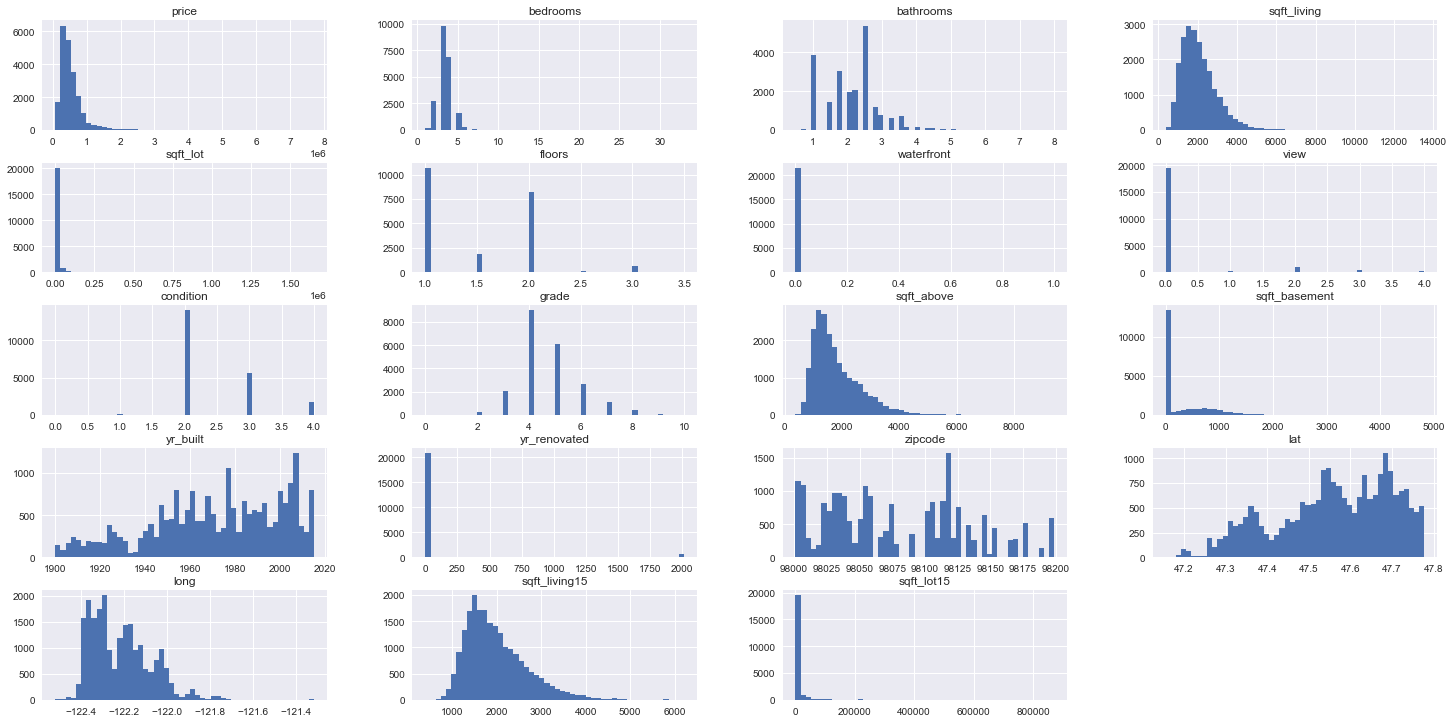

In [10]:
# plot histograms of all the columns in the set.
df.hist(bins=50, figsize=(25, 12.5))

Observations: 
* price, sqft_living, sqft_above, and sqft_living look approximately log-normally distributed.
* Most homes have 1-5 bedrooms
* long and lat look approximately to follow a trimodal distribution
* most homes do not have a view nor are waterfront properties
* most homes have a condition of 2 and many have a condition of 3
* grade is roughly normally distributed.
* most homes do not have a basement

### Scatterplot of each variable and price

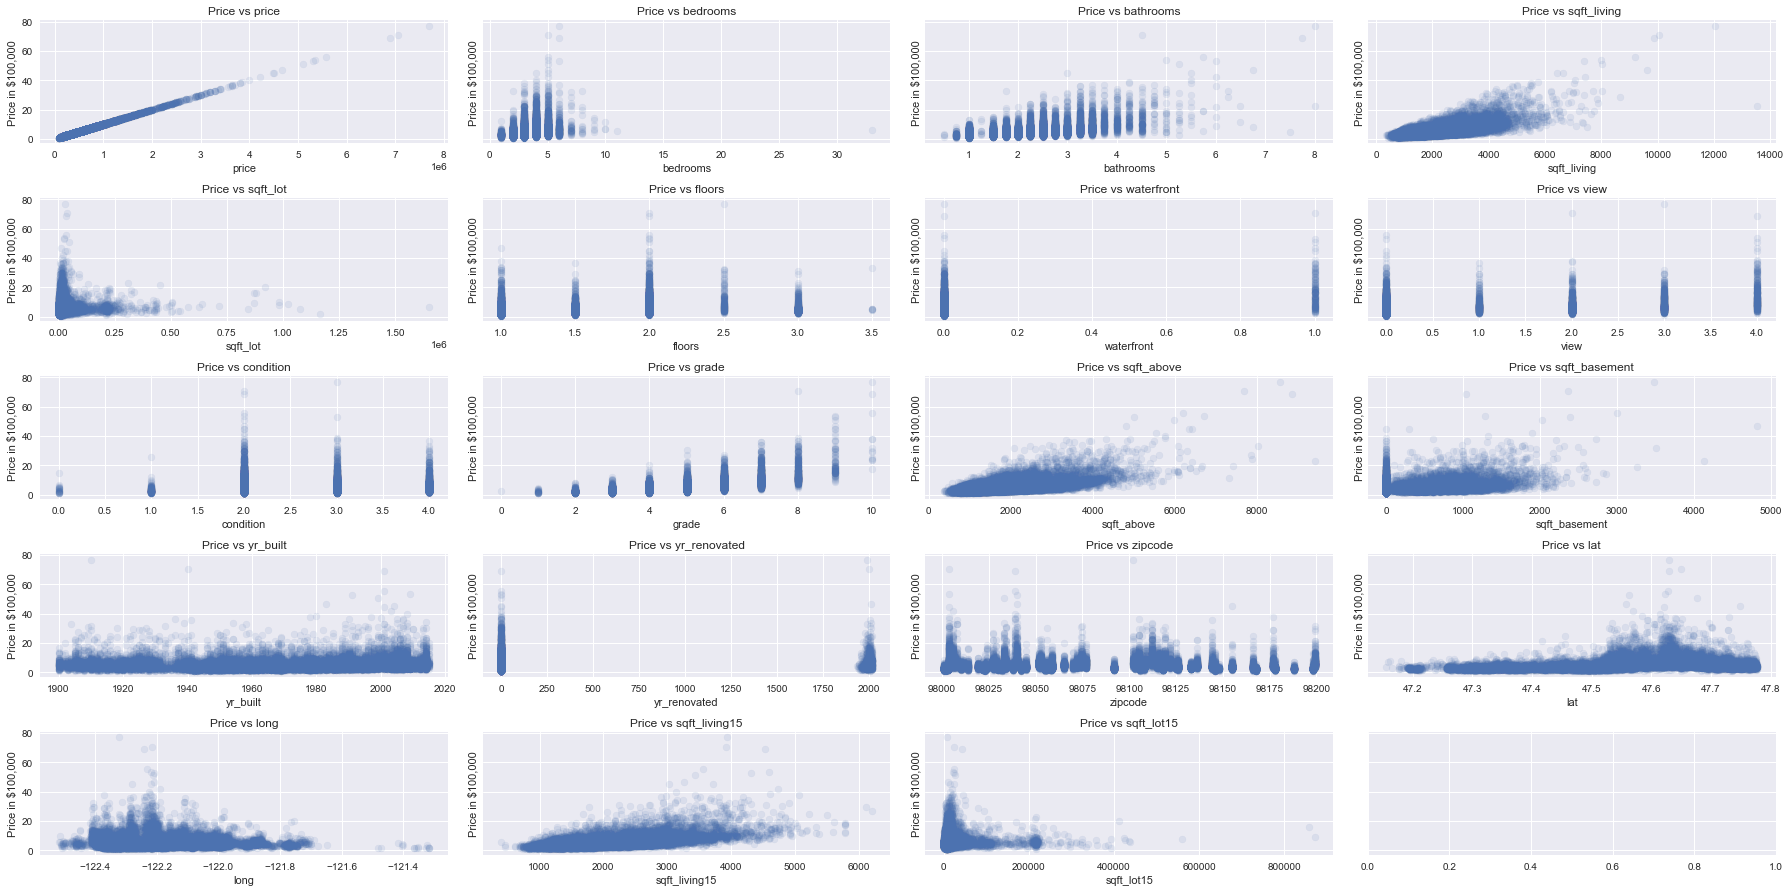

In [11]:
# visualize scatterplots of histograms with price as y variable
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(25, 12.5), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price in $100,000')

fig.tight_layout()

Observations:
* sqft_living and price are fairly linearly related.
* grade and price are somewhat linearly related
* sqft_above and sqft_living15 are somewhat linearly related to price.

### Correlation heatmap

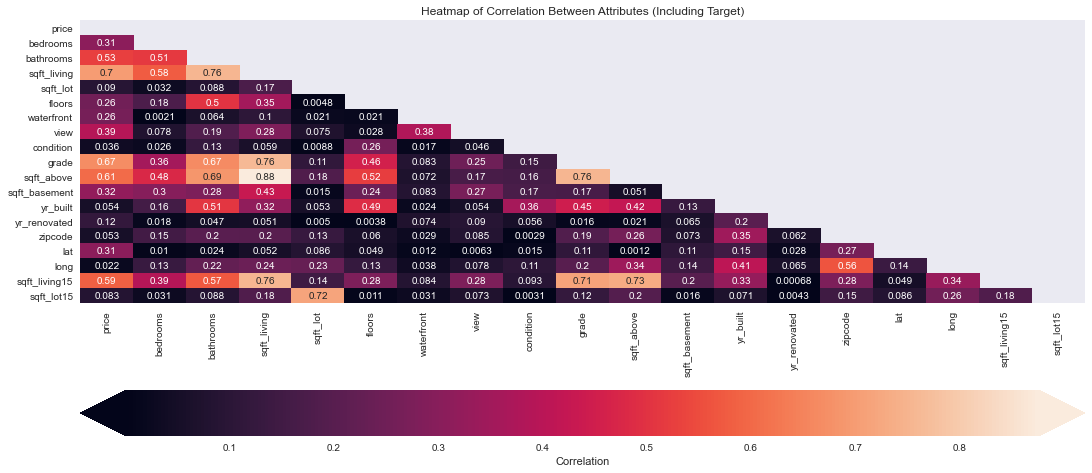

In [12]:
# adapted from dsc-linear-regression-lab
# author: hoffm386
# link: https://github.com/learn-co-curriculum/dsc-linear-regression-lab/tree/solution
heatmap_data = df
corr = np.abs(heatmap_data.corr())

# Set up figure and axes
fig, ax = plt.subplots(figsize=(18, 8))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2,
              "extend": "both"}
)

ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Observations:
* sqft_living, grade, and sqft_above are all correlated above 0.6 with price
* predictor variable correlation pairs above 0.6: (grade, sqft_living15), (sqft_above, sqft_living15), (grade, sqft_above), (sqft_lot, sqft_lot15), (sqft_living, sqft_living15), (sqft_living, sqft_above), (sqft_living, grade), (bathrooms, sqft_above), (bathrooms, grade), (bathrooms, sqft_living)

### Investigate linear regression assumptions for each numerical variable.

In [13]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Regression Diagnostics for Price~price


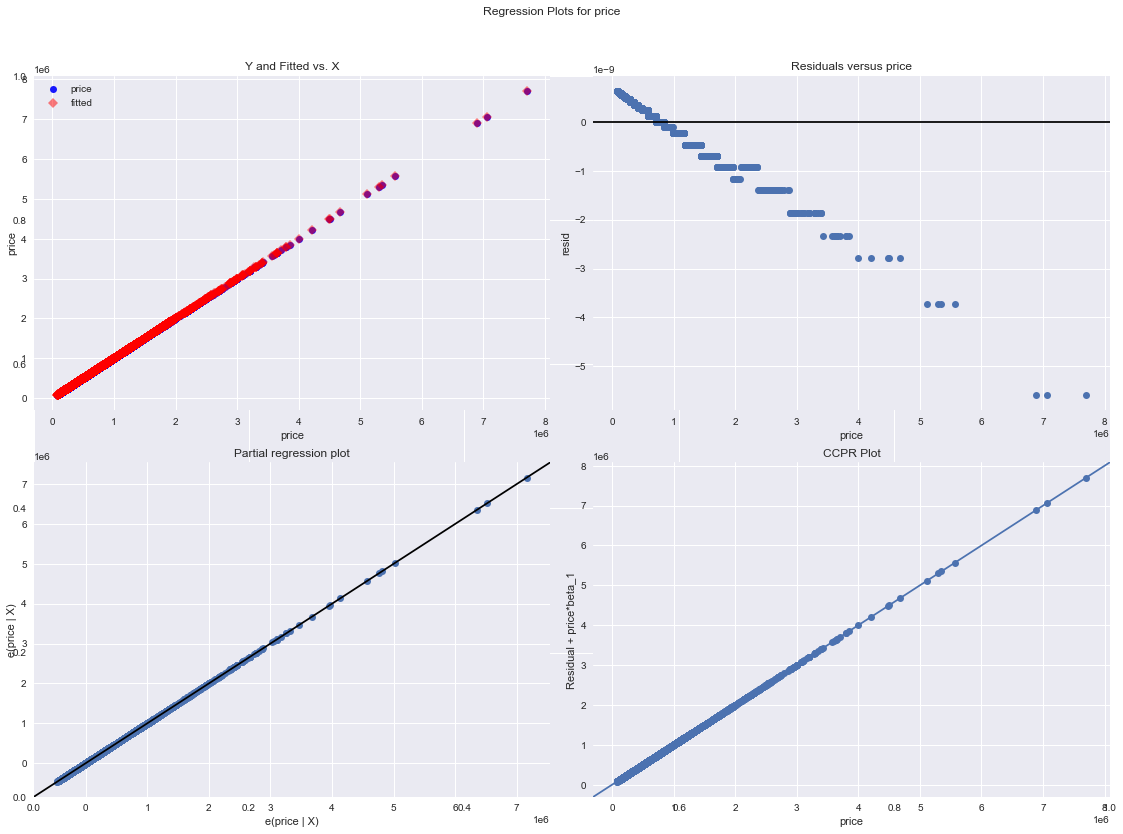

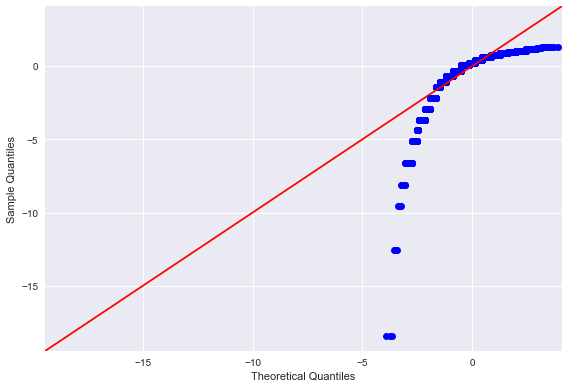

Regression Diagnostics for Price~bedrooms


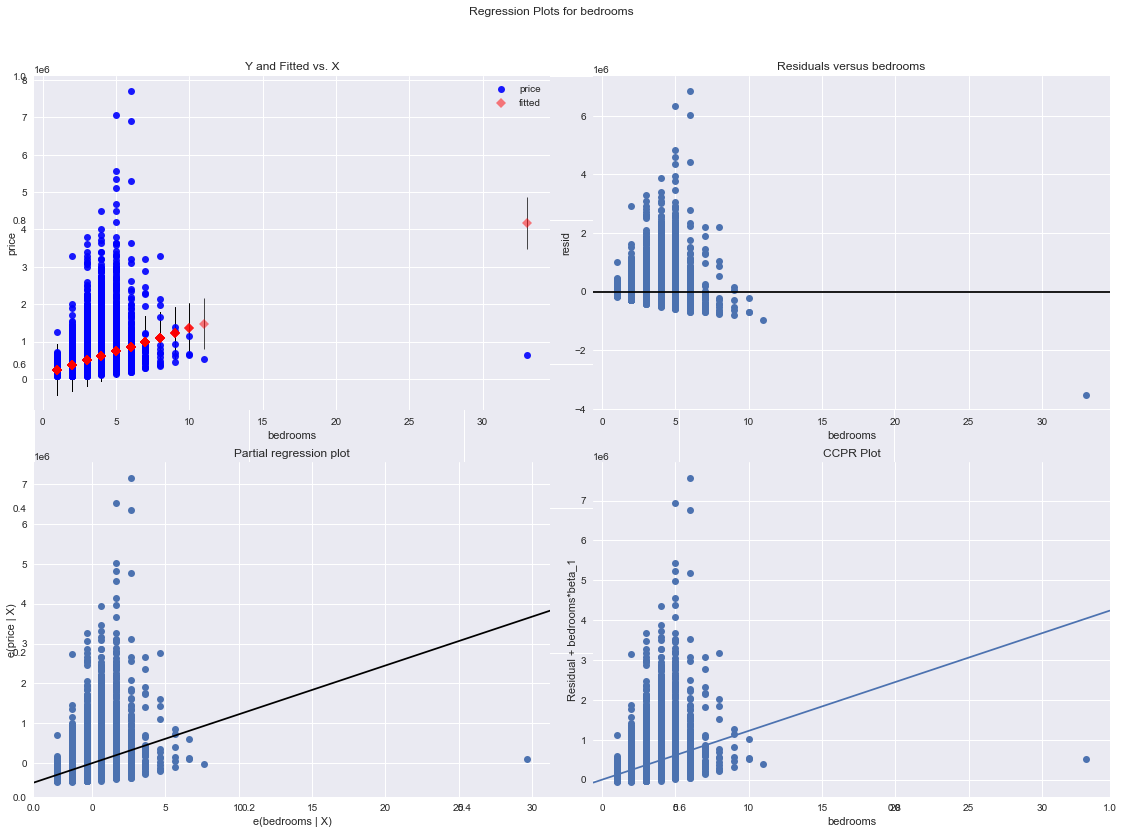

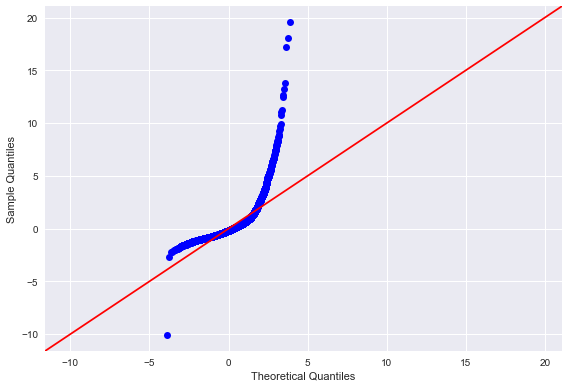

Regression Diagnostics for Price~bathrooms


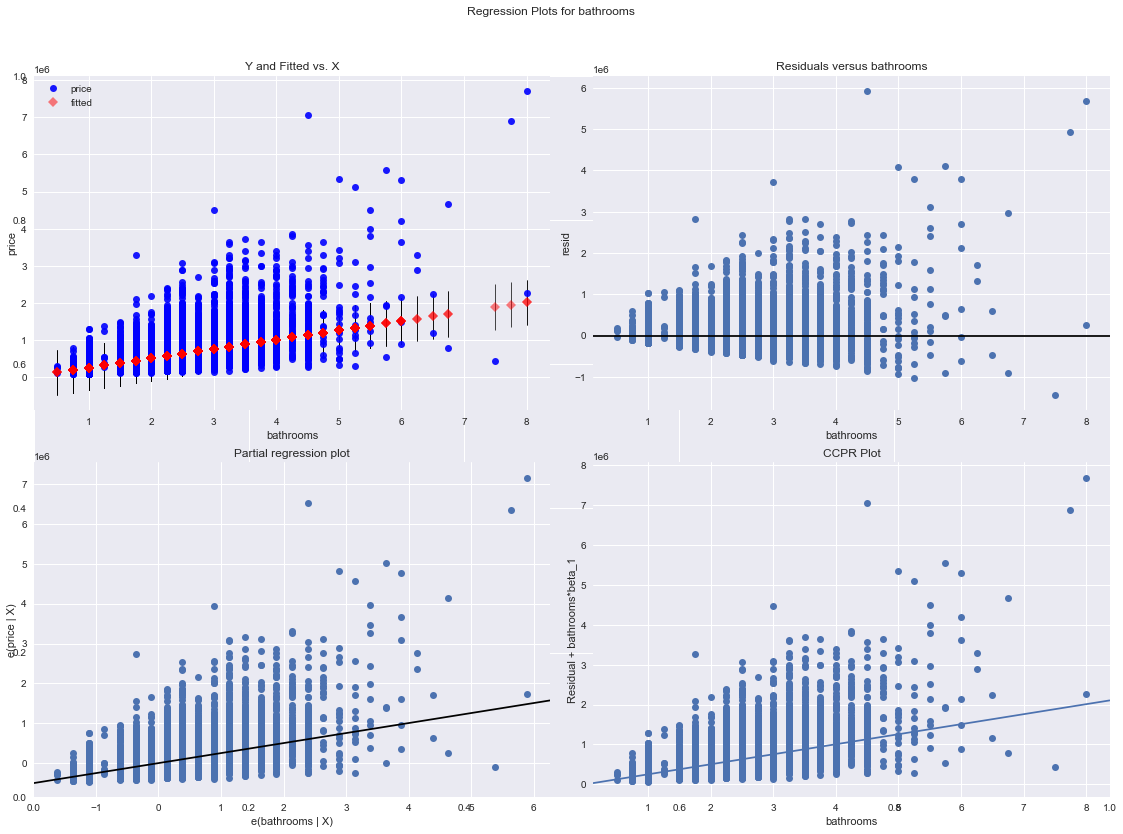

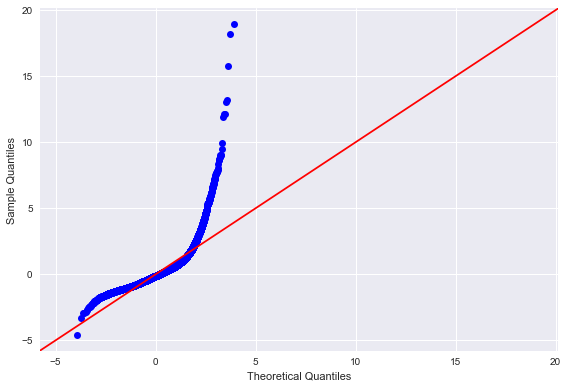

Regression Diagnostics for Price~sqft_living


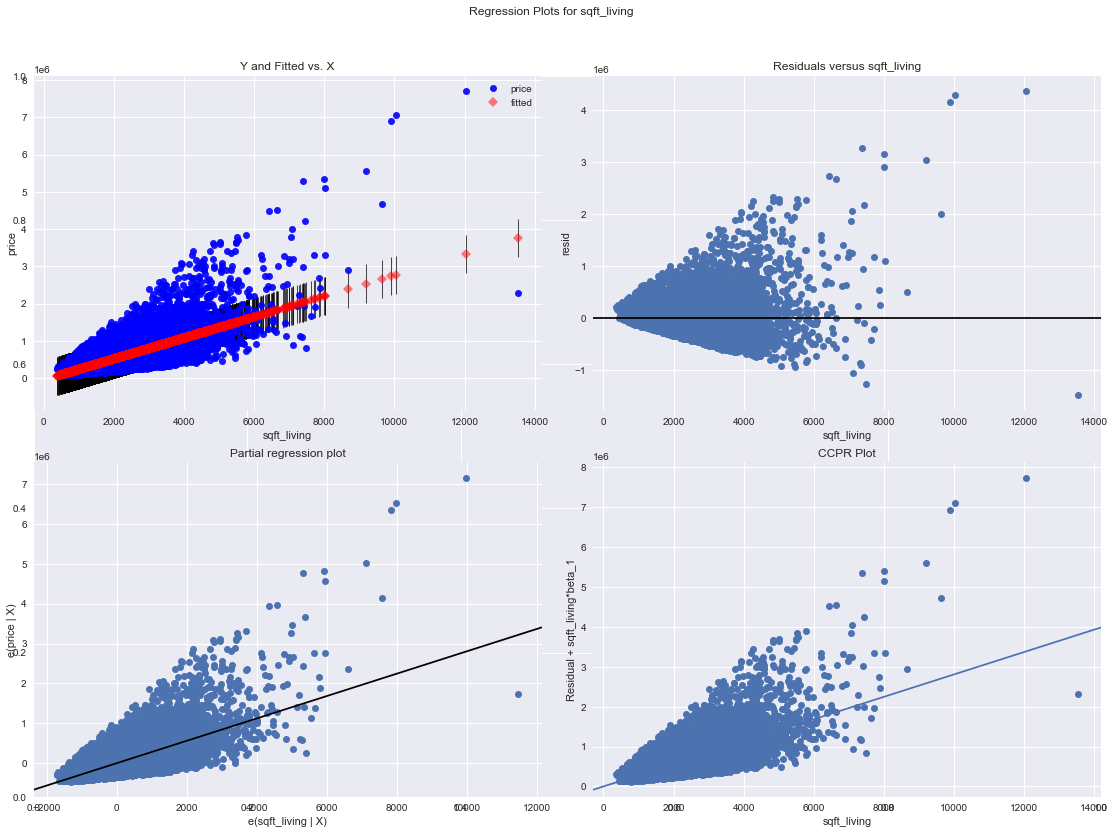

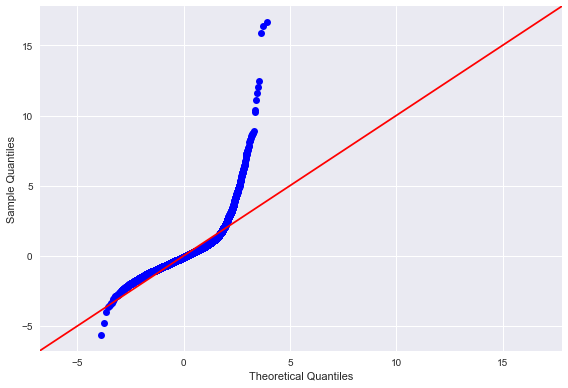

Regression Diagnostics for Price~sqft_lot


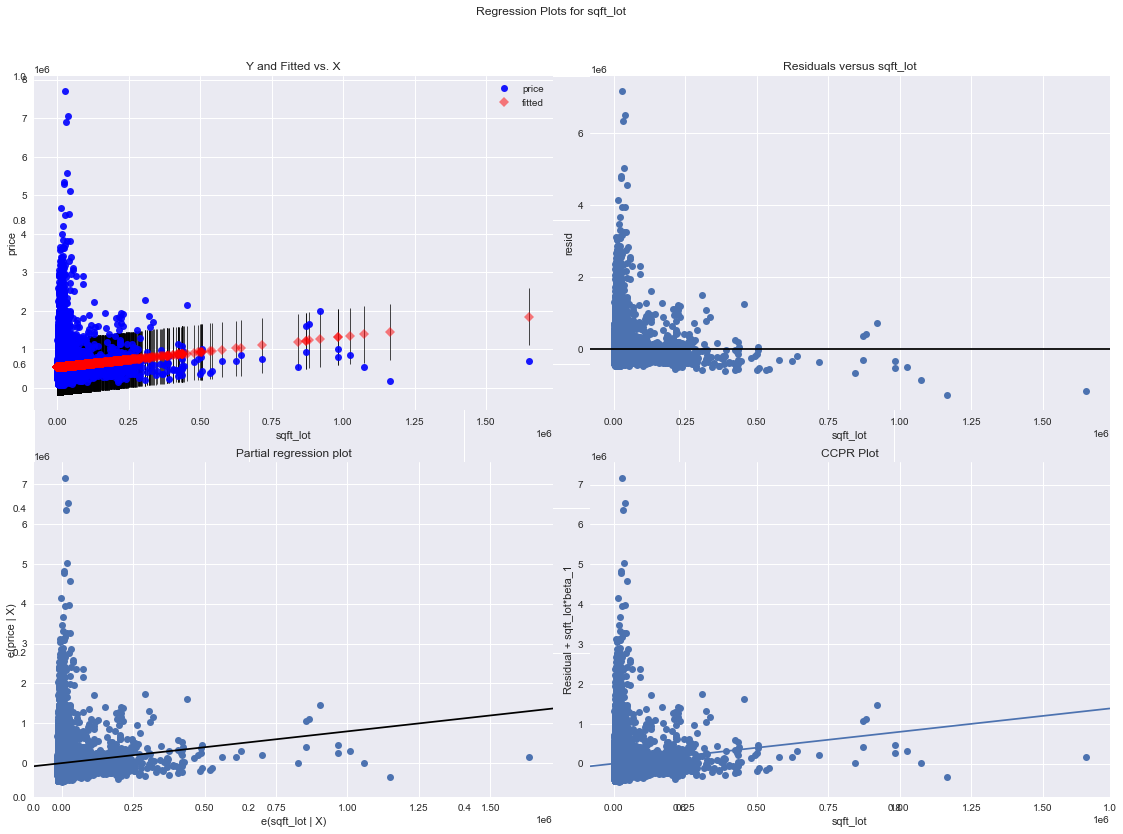

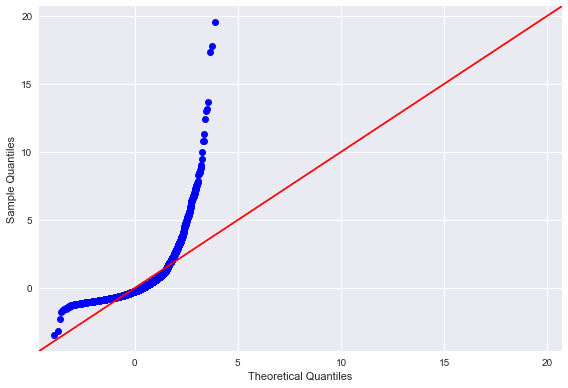

Regression Diagnostics for Price~floors


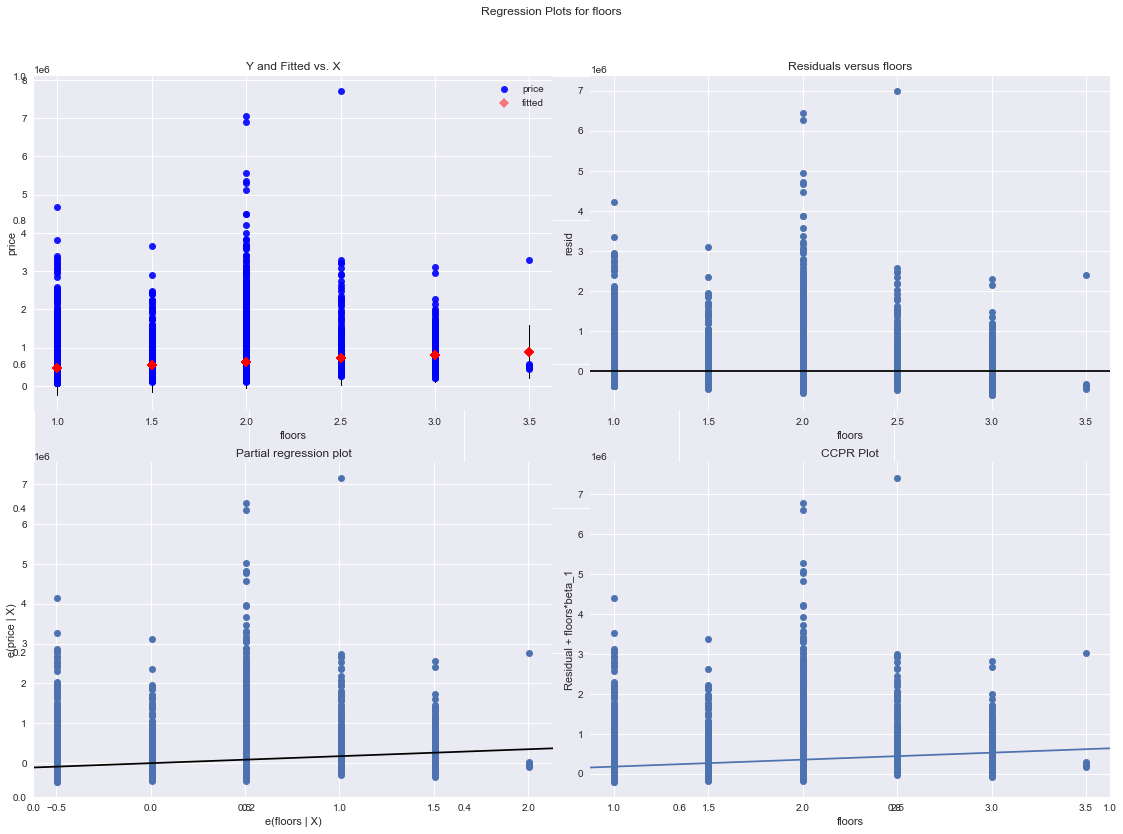

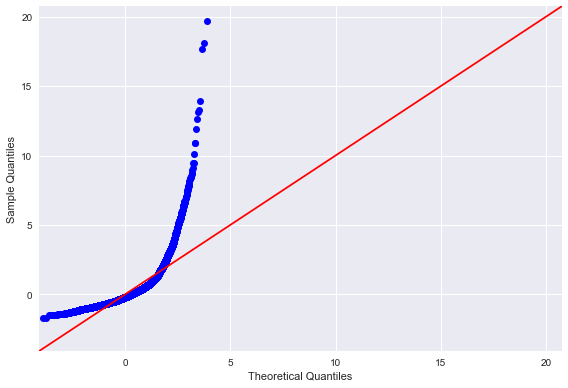

Regression Diagnostics for Price~sqft_above


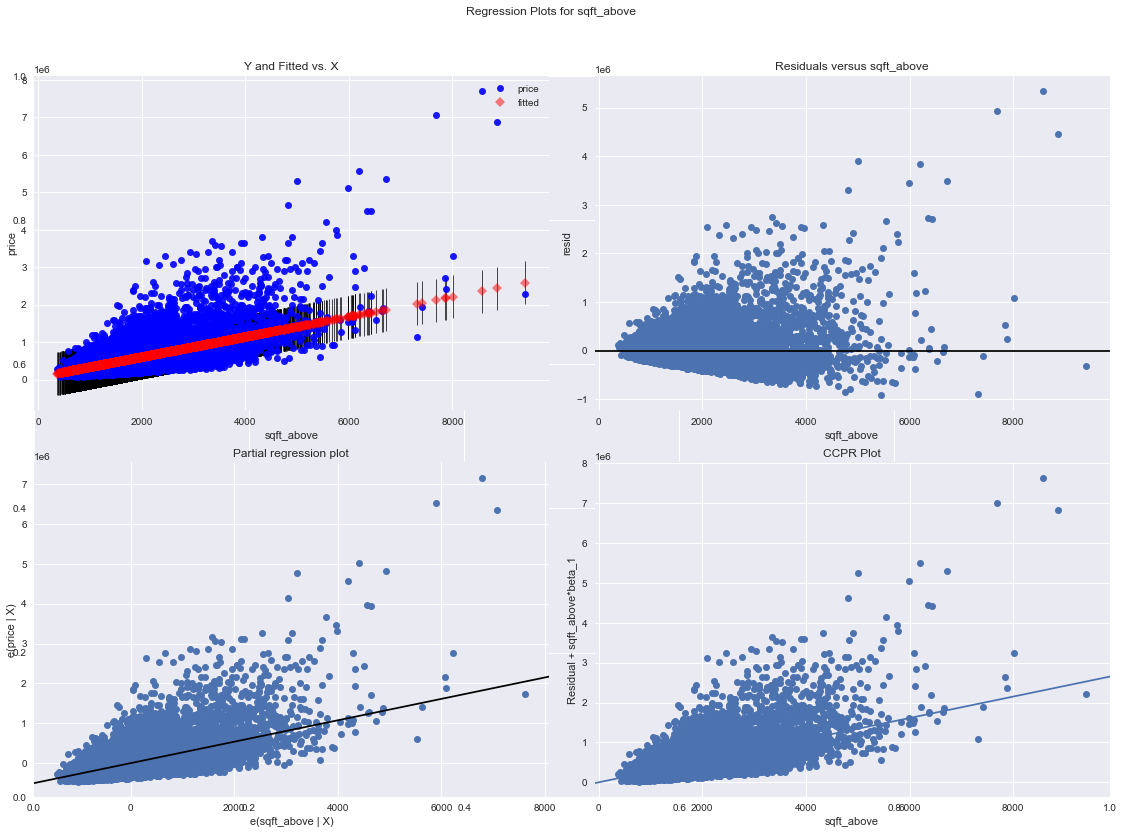

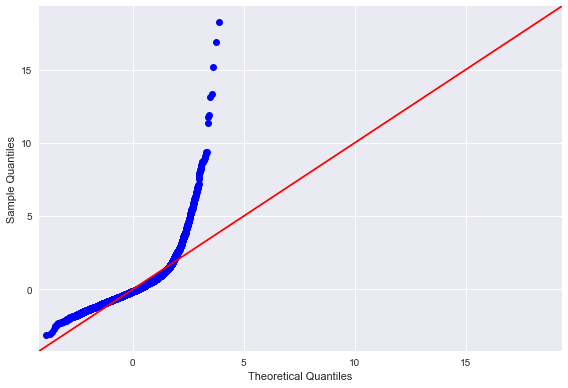

Regression Diagnostics for Price~sqft_basement


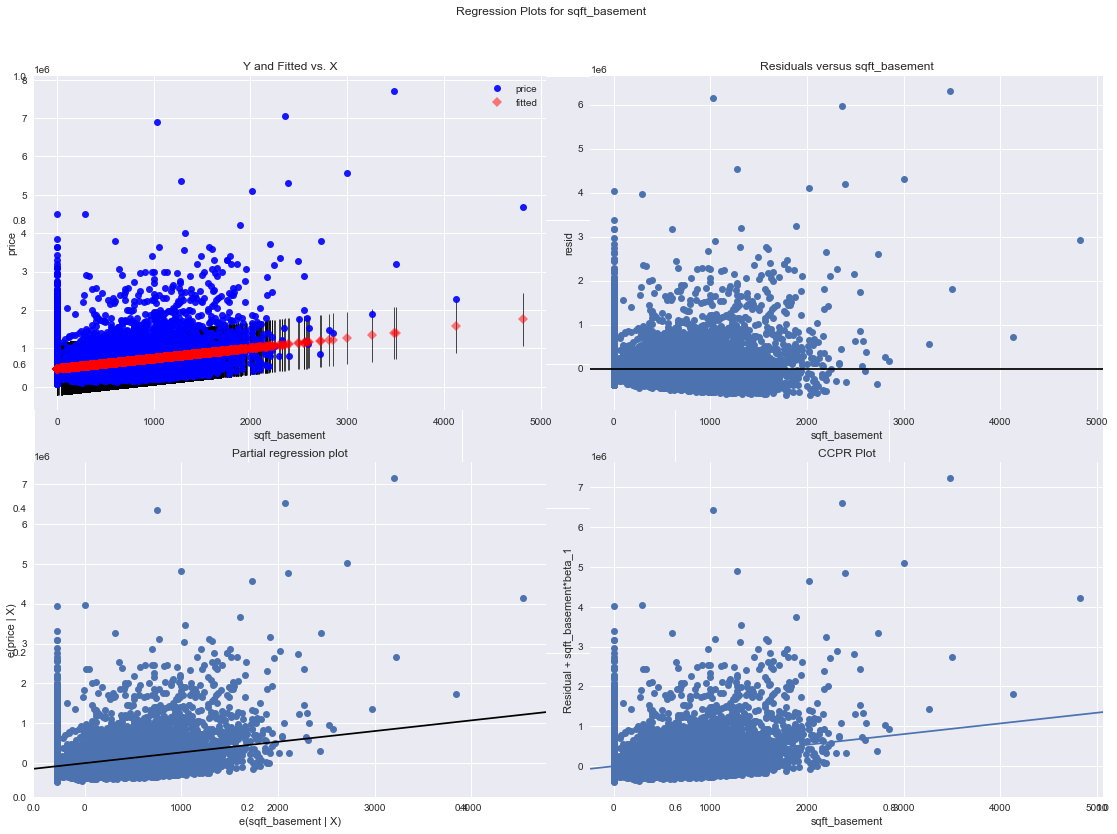

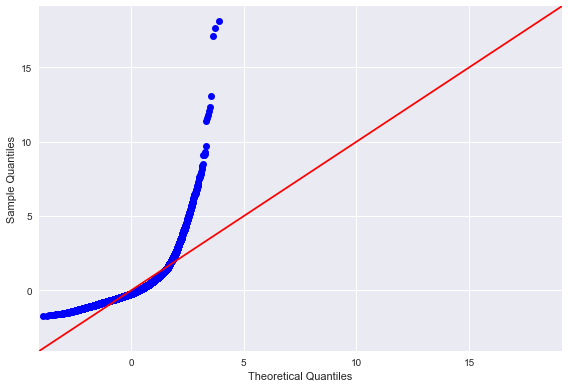

Regression Diagnostics for Price~sqft_living15


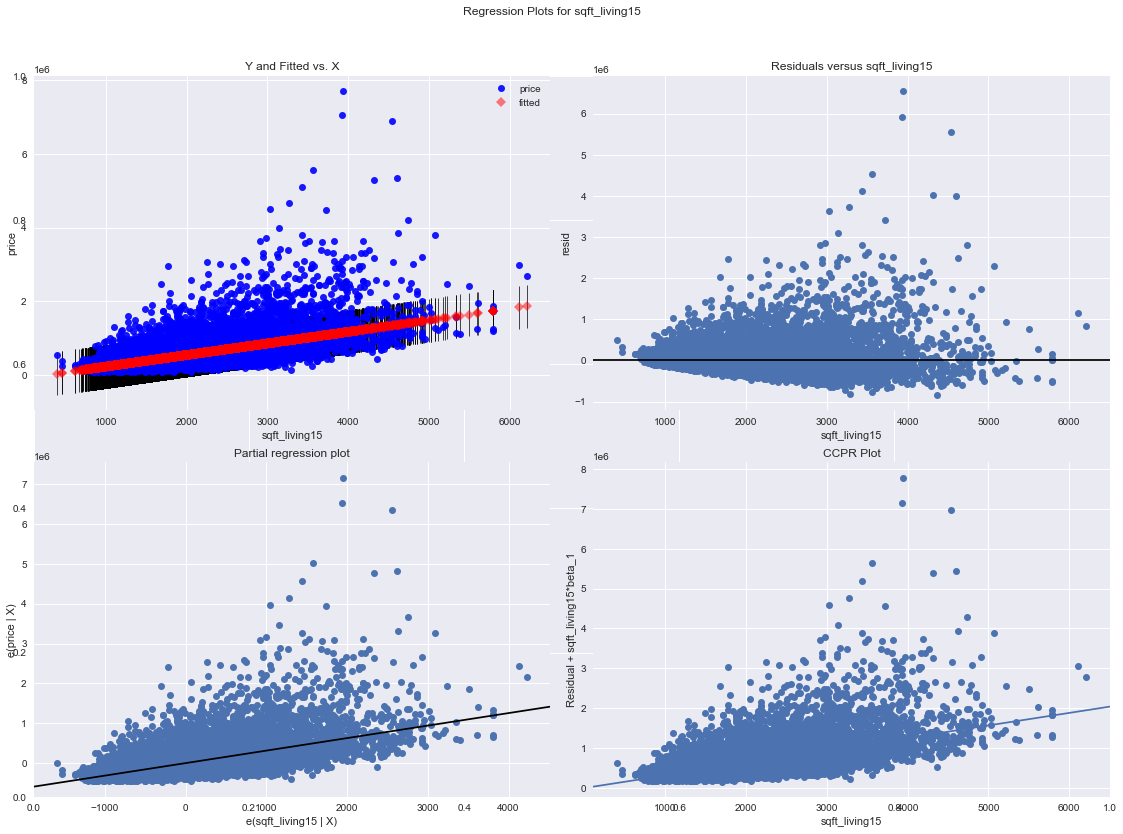

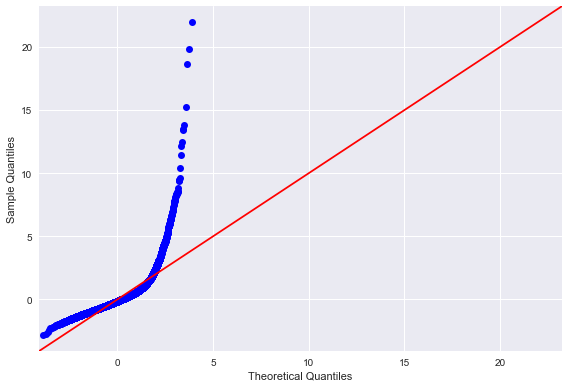

Regression Diagnostics for Price~sqft_lot15


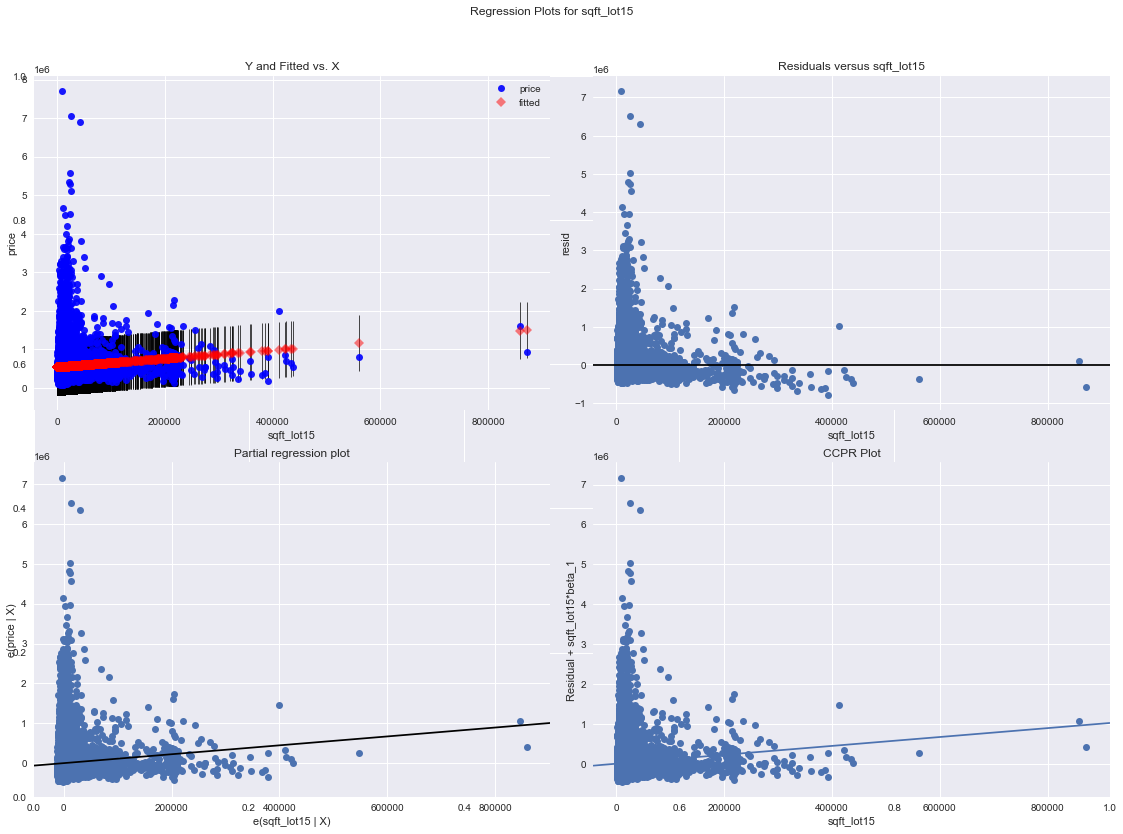

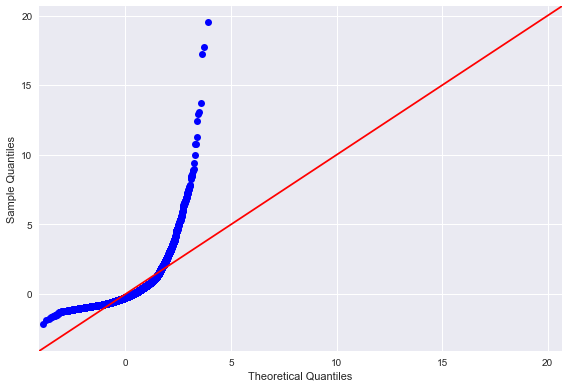

In [14]:
# create df with numerics to check lr assumptions
df_numerics = df.drop(['waterfront', 'view', 'yr_built', 'yr_renovated', 
                       'zipcode', 'lat', 'long', 'grade', 'condition'], axis=1)

# check assumptions
for idx, column in enumerate(df_numerics.columns):
    print(f"Regression Diagnostics for Price~{column}")
    
    f = f'price~{column}'
    model = smf.ols(formula=f, data=df_numerics).fit()
    
    fig, axes = plt.subplots(figsize=(16,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()

## Modeling

### Helper functions for modeling

In [15]:
# establish LinearRegression() variable for later use
lr = LinearRegression()

# import for finding r-squared value
from sklearn.metrics import r2_score

In [16]:
# this function places the data in train_test_split and builds a linear
# regression model. 
# Inputs: parameters for modeling & target variable
# Returns: r-squared value
def lin_model(X,y):
    # split into train and test. Use default split size of 0.25 and use same
    # random_state for consistency
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
    
    # fit the model
    lr.fit(X_train, y_train)
    
    # return r-squared
    return lr.score(X_train, y_train)

In [17]:
# this function facillitates log transformation of variables
# inputs: list of variables to be log-transformed and the dataframe that hosts
# these variables
# returns: the modified dataframe
def var_log_transform(var_list, df):
    for var in var_list:
        log_var = np.log(df[var])     # log the variable
        df = df.drop([var], axis=1)     # drop the variable from the df
        df[var] = log_var     # add the logged variable into the df
    return df     # return the df

In [18]:
# this function creates dummy variables for a list of variables and
# concatonates these variables onto the df
# inputs: list of variables to be dummied, df
# returns: df with modified vars
def dum_transformation(dum_list, df):
    for d in dum_list:
        dum = pd.get_dummies(df[d], prefix=d, drop_first=True)     # create dummies
        df = df.drop([d], axis=1)    # drop old variable
        df = pd.concat([df, dum], axis=1)    # add dummies into df
    return df     # return the df

In [19]:
# this function allows efficient statsmodels linear regression modeling
# inputs: df
# returns list: fitted model - can do print(str({name of model}.summary())), 
# X, df_x, df_train_y
def sm_lin_model(df):
    df_y = df[['price']]     # assumes target is 'price' establish y-var df
    df_x = df.drop(['price'], axis=1)  # same assumption and creates x-var df
    
    df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)
    
    X = sm.add_constant(df_train_x)

    # Fit the linear regression model
    model = sm.OLS(df_train_y, X)     # instantiate model
    res = model.fit()     # fit model
    
    # Creating a list of items to return for later use.
    # to_ret = [res, X, df_train_y, df_x]
    
    return res, X, df_y, df_x, df_train_x, df_train_y  # returns the fitted model - can then print summary as str

In [20]:
# this function plots the residuals of the model to check if they follow a
# normal distribution. This function uses a Q-Q-Plot, which should follow a
# linear trend if the assumption is correct.
# inputs: fitted model
def sm_check_resid_normality(res):
    df_residuals = res.resid
    mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                                 fit=True)

In [21]:
# this function plots the homoscedasticity of a linear regression model
# inputs: res (fitted model), df_train_y, X (of form: sm.add_constant(df_train_x))
def sm_check_scedas(res, df_train_y, X):    
    # check for homoscedasticity
    plt.scatter(res.predict(X), res.resid)     
    plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

    plt.title('Linear Regression Model Homoscedasticity');

In [22]:
# this function checks multicollinearity btwn independent variables
# inputs: dataframe with the independent variables (df_x)
# returns: list of variables with VIF values - be cautious of vals > 5
def multicollinearity_check(df_x):
    X = df_x
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return list(zip(list(df_x.columns), vif))

### Model 1

I will use sqft_living and grade for the first model. Grade may be tricky because it is categorical. It may need to be treated with dummy variables, label encoding, or some other method in future models.

I will use statsmodels to create a linear regression model, and I will also use it to check linear regression assumptions (linearity, normality, homoscedasticity, and p-value < 0.05.

#### Create dataframe

In [23]:
# create df with just price, grade, and sqft_living
df_model1 = df[['price', 'sqft_living', 'grade']].copy()

#### Check linearity assumption

* Check if there is a linear relationship between each predictor and target variable.
* Check for outliers 

Regression Diagnostics for Price~price


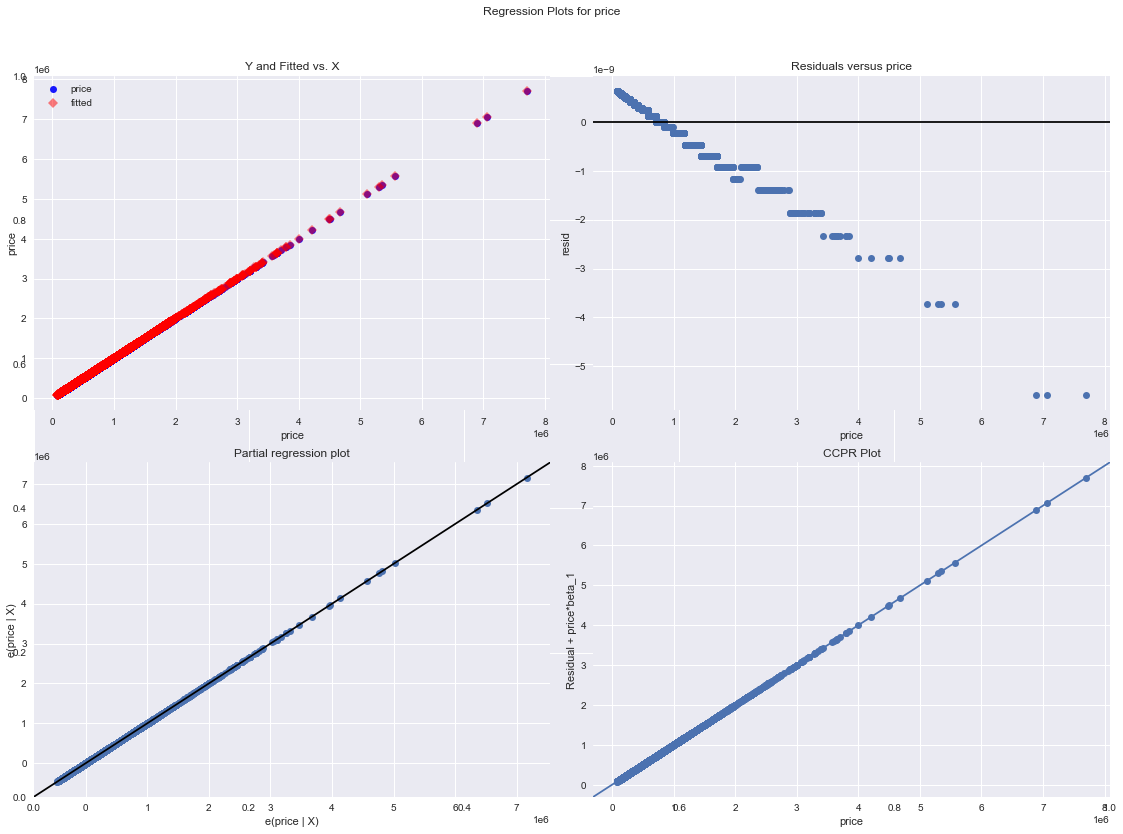

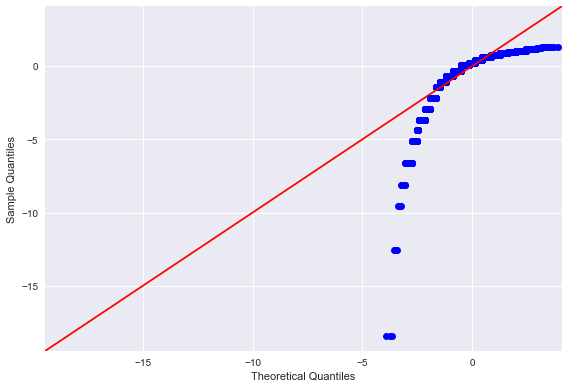

Regression Diagnostics for Price~sqft_living


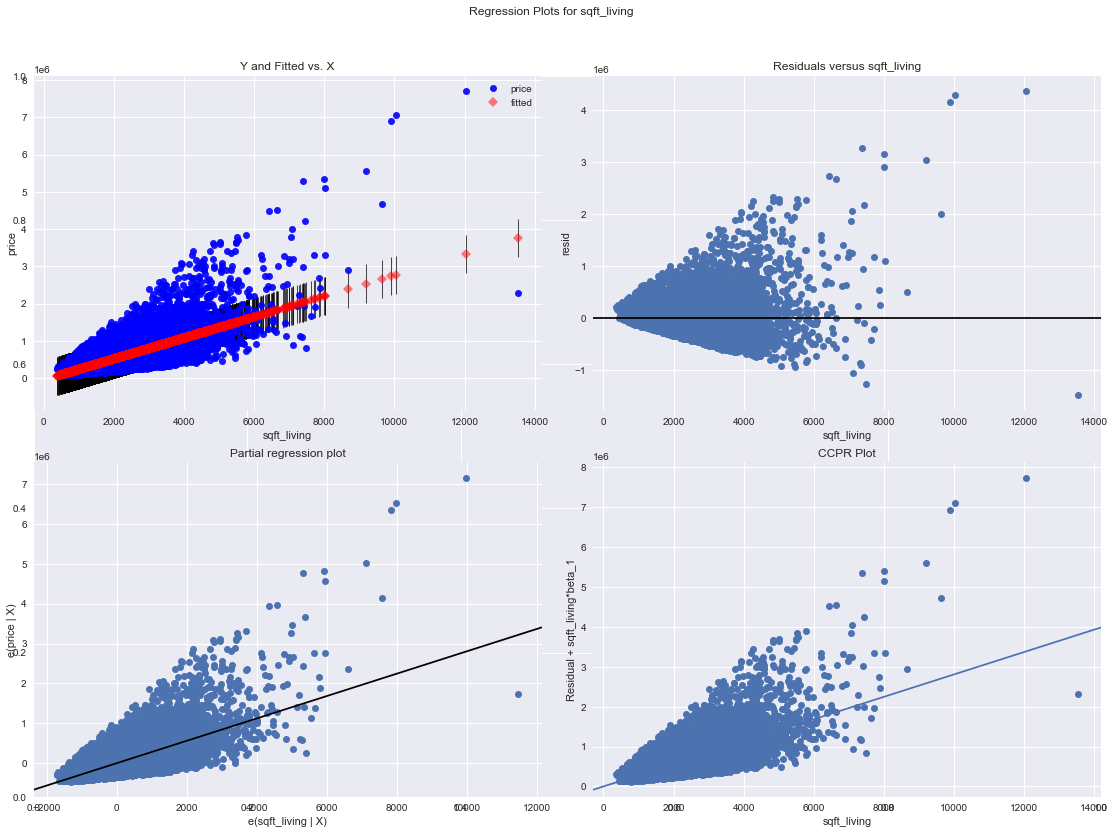

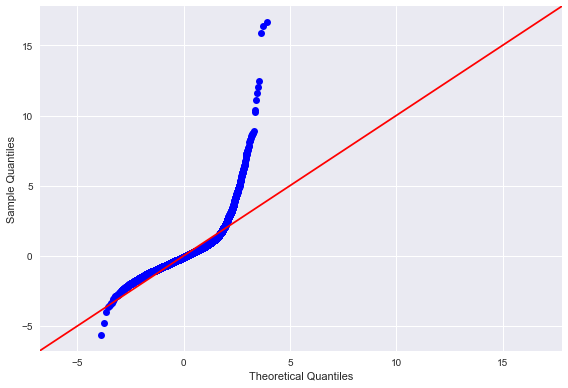

Regression Diagnostics for Price~grade


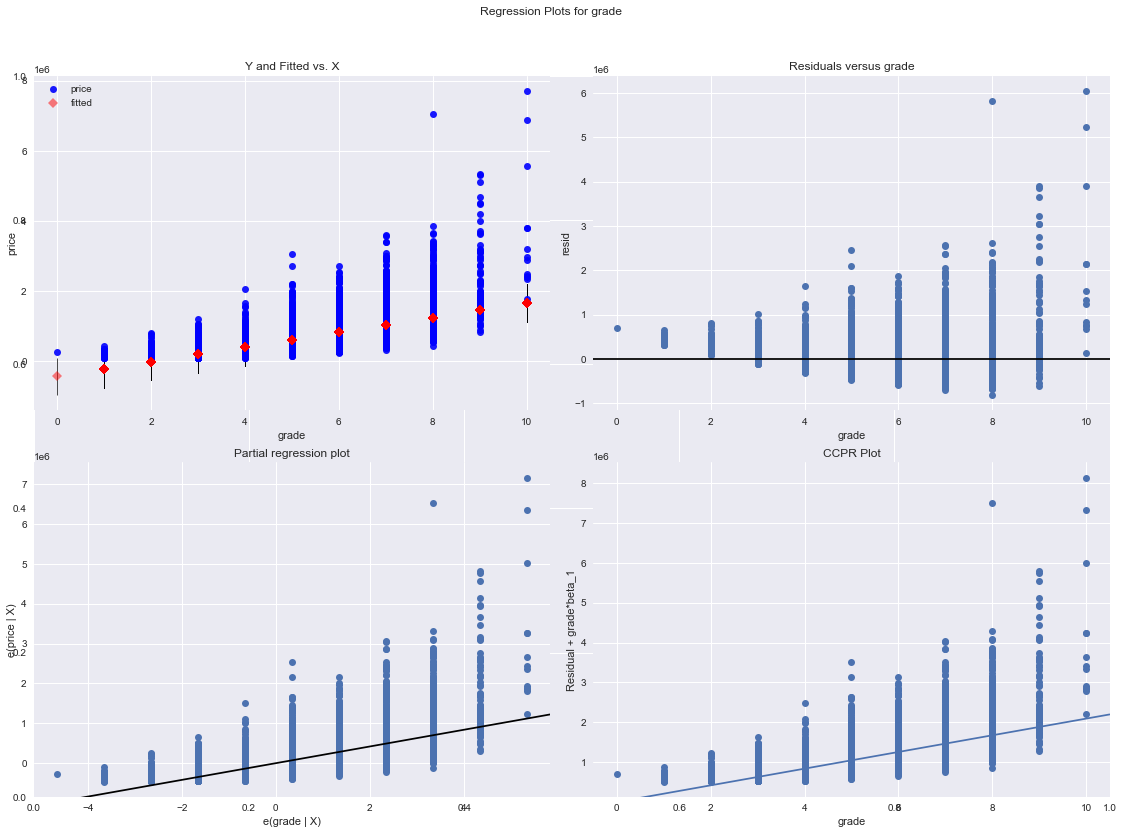

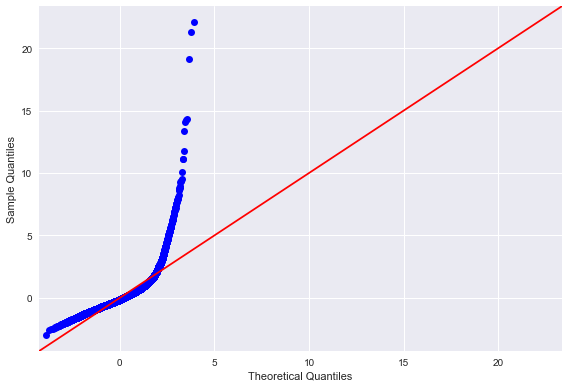

In [24]:
# check assumptions
for idx, column in enumerate(df_model1.columns):
    print(f"Regression Diagnostics for Price~{column}")
    
    f = f'price~{column}'
    model = smf.ols(formula=f, data=df_model1).fit()
    
    fig, axes = plt.subplots(figsize=(16,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()

Neither variables follow the normality assumption, but I will still model and fix these assumptions later.

#### Fit the model

In [25]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df_model1)

In [26]:
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     9352.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:05:27   Log-Likelihood:            -2.2427e+05
No. Observations:               16197   AIC:                         4.485e+05
Df Residuals:                   16194   BIC:                         4.486e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.129e+05   8383.424    -37.318      

#### Check assumptions

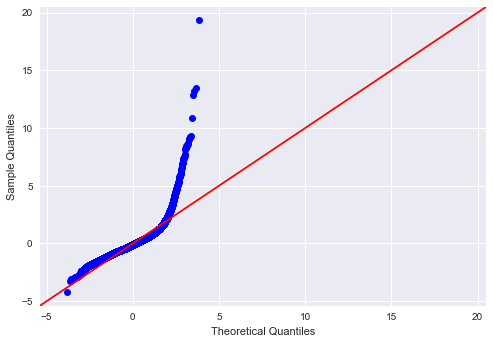

In [27]:
# Normality of residuals
sm_check_resid_normality(res)

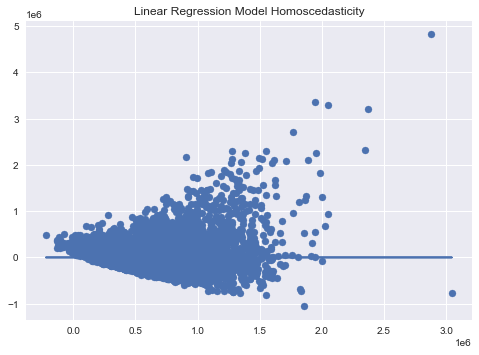

In [28]:
sm_check_scedas(res, df_train_y, X)

In [29]:
multicollinearity_check(df_x)

[('sqft_living', 13.546151335704193), ('grade', 13.546151335704193)]

None of the assumptions were met, and the model produced a low r^2 value.

#### Evaluate model error with MAE

In [30]:
# generate predictions
ypred = res.predict(X)

# calc MAE
mae = meanabs
mae = mae(df_train_y['price'], ypred)
mae

165041.76217912533

### Model 2

This model will utilize sqft_living and grade again, but it will handle grade with a method used for transforming categorical variables.

#### Create dummy variables for grade

In [31]:
df1 = df[['grade','price','sqft_living']].copy()
dum_list = ['grade']
df1 = dum_transformation(dum_list, df1)     # use custom dummy function
df1

price  sqft_living  grade_1  grade_2  grade_3  grade_4  grade_5  \
0      221900.0         1180        0        0        0        1        0   
1      538000.0         2570        0        0        0        1        0   
2      180000.0          770        0        0        1        0        0   
3      604000.0         1960        0        0        0        1        0   
4      510000.0         1680        0        0        0        0        1   
...         ...          ...      ...      ...      ...      ...      ...   
21592  360000.0         1530        0        0        0        0        1   
21593  400000.0         2310        0        0        0        0        1   
21594  402101.0         1020        0        0        0        1        0   
21595  400000.0         1600        0        0        0        0        1   
21596  325000.0         1020        0        0        0        1        0   

       grade_6  grade_7  grade_8  grade_9  grade_10  
0            0        0        0        0         0  
1            0        0        0        0         0  
2            0        0        0        0         0  
3            0        0        0        0         0  
4            0        0        0        0         0  
...        ...      ...      ...      ...       ...  
21592        0        0        0        0         0  
21593        0        0        0        0         0  
21594        0        0        0        0         0  
21595        0        0        0        0         0  
21596        0        0        0        0         0  

[21597 rows x 12 columns]

#### Check linearity assumption

Regression Diagnostics for Price~price


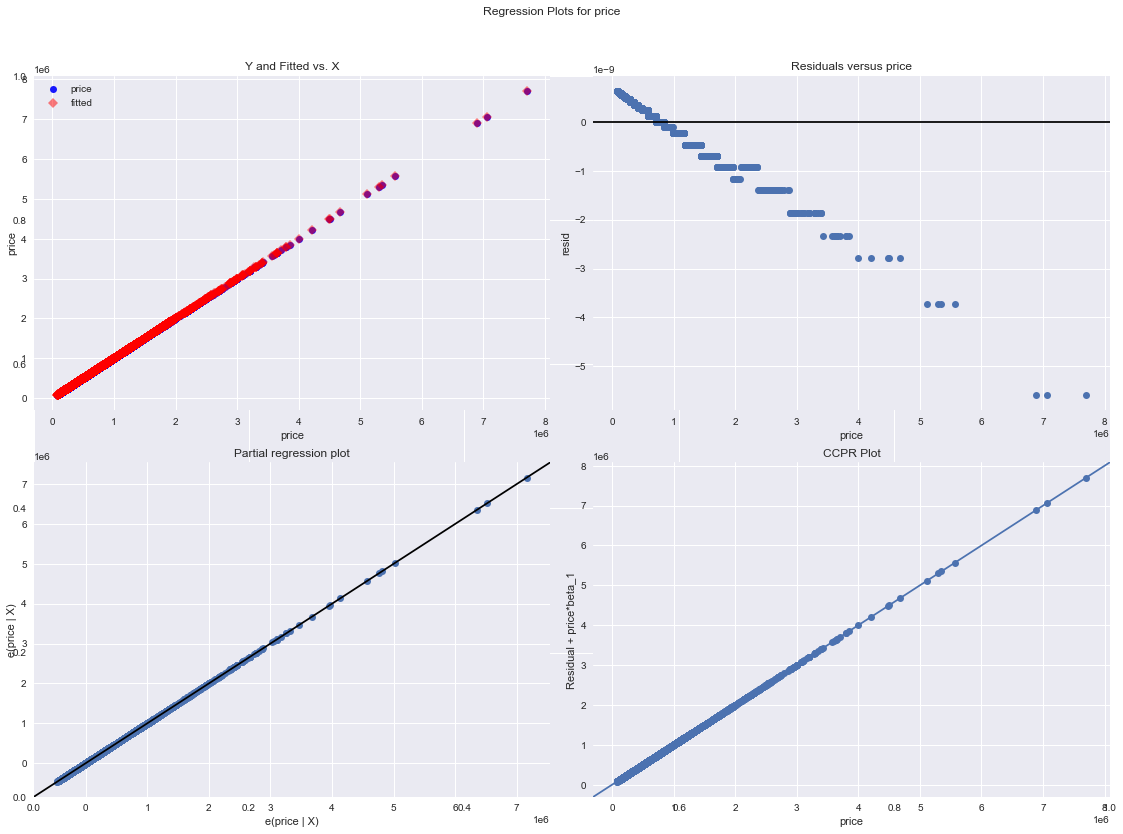

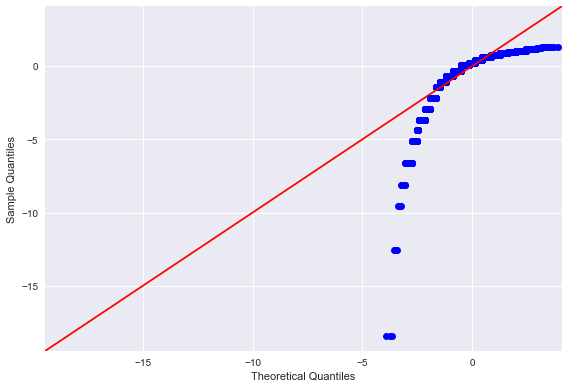

Regression Diagnostics for Price~sqft_living


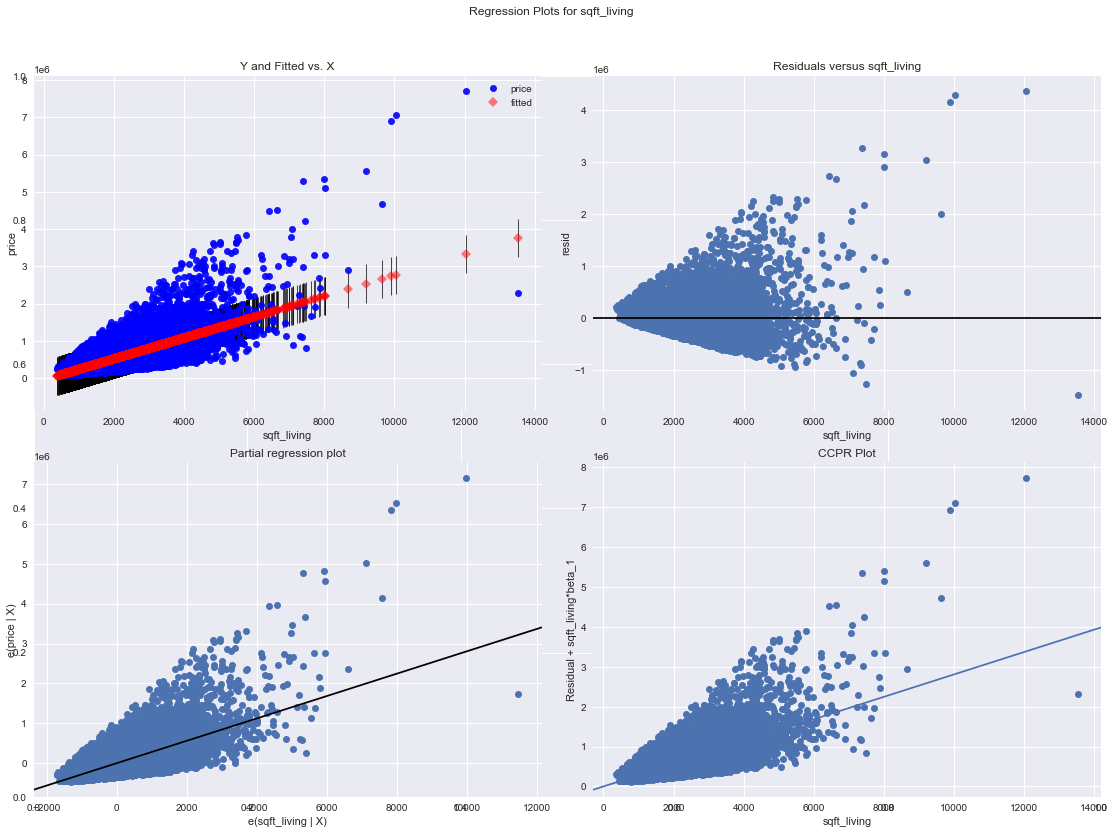

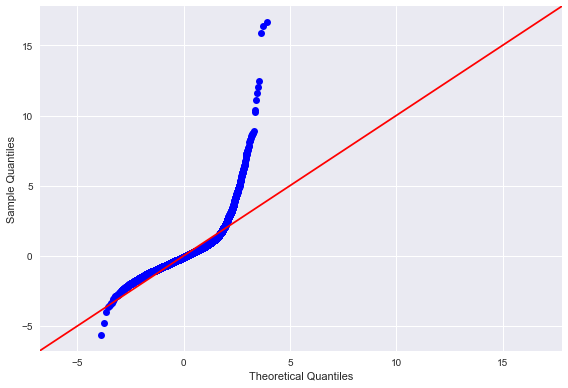

Regression Diagnostics for Price~grade_1


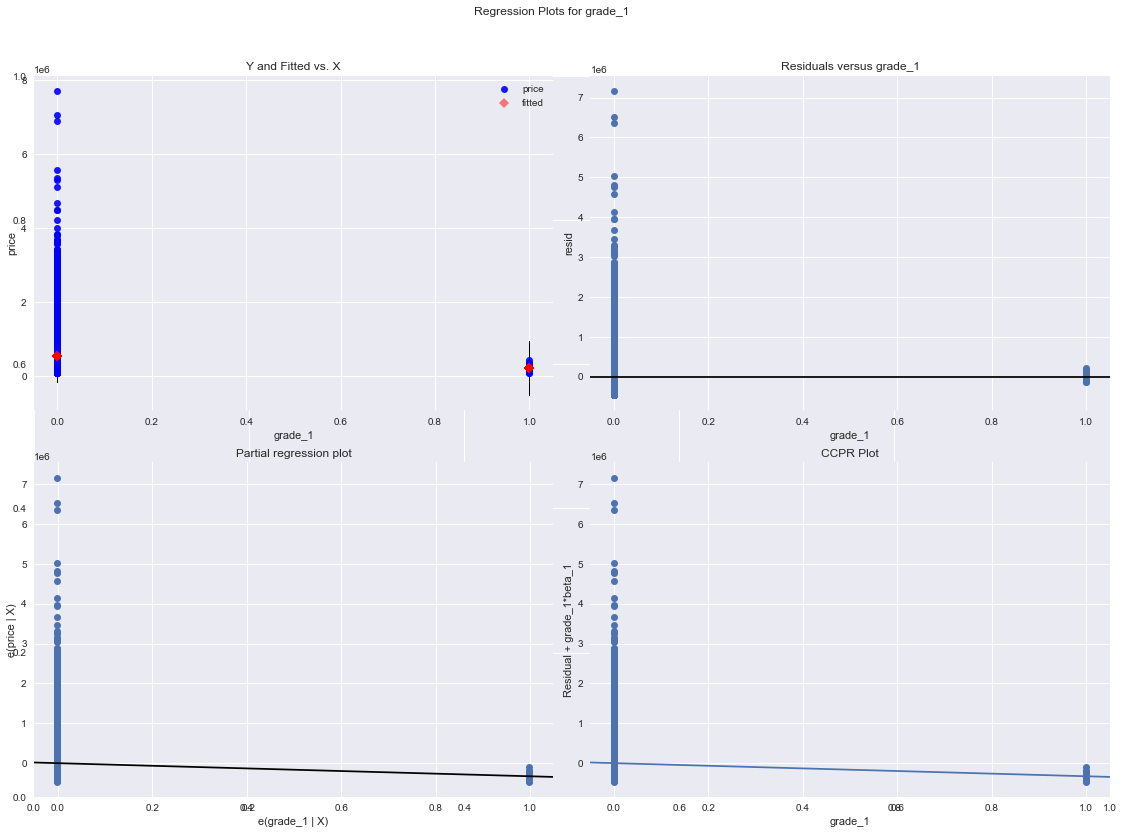

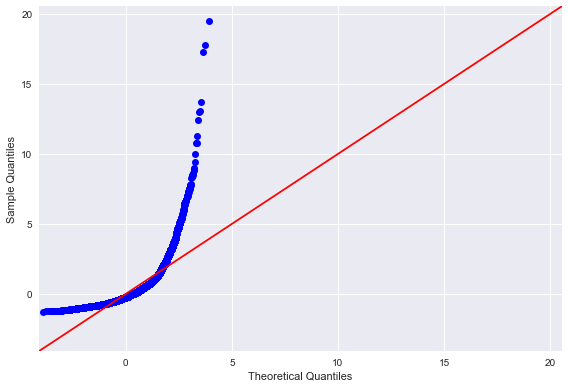

Regression Diagnostics for Price~grade_2


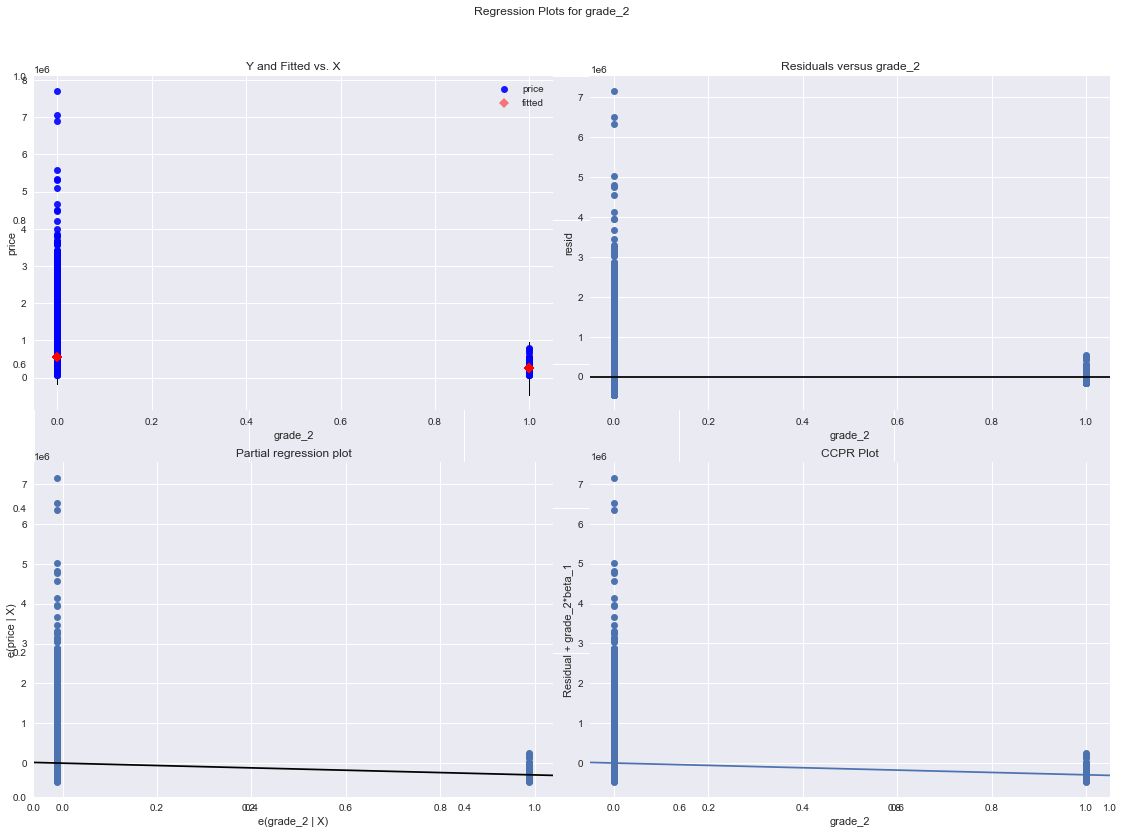

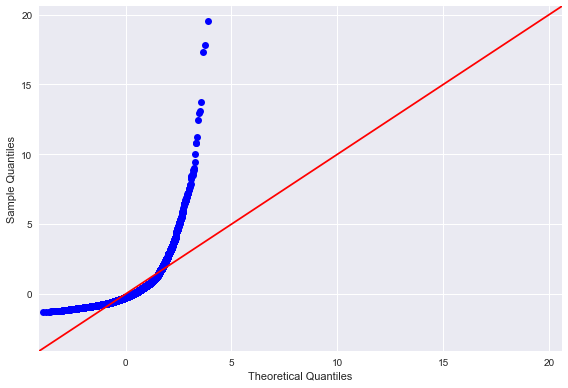

Regression Diagnostics for Price~grade_3


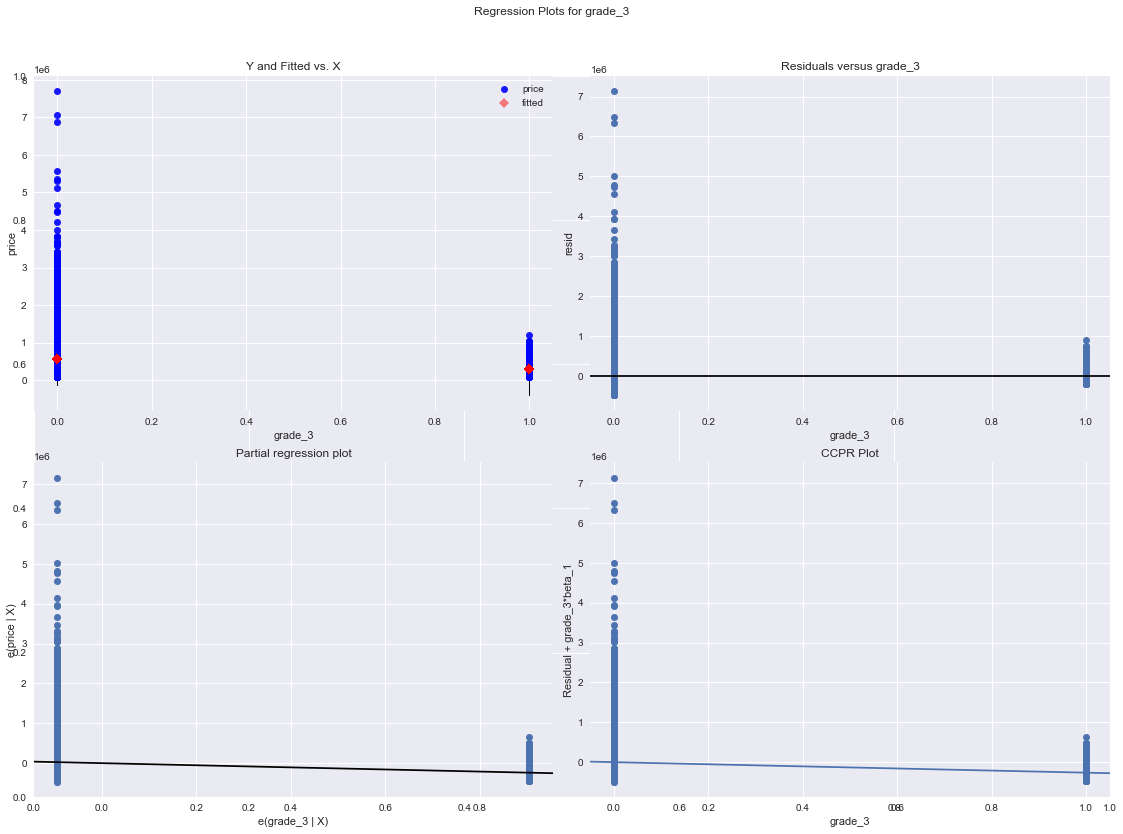

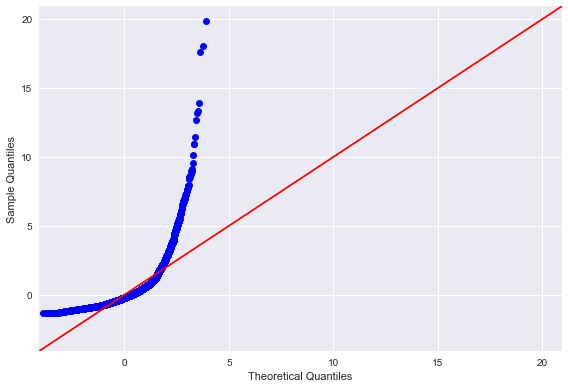

Regression Diagnostics for Price~grade_4


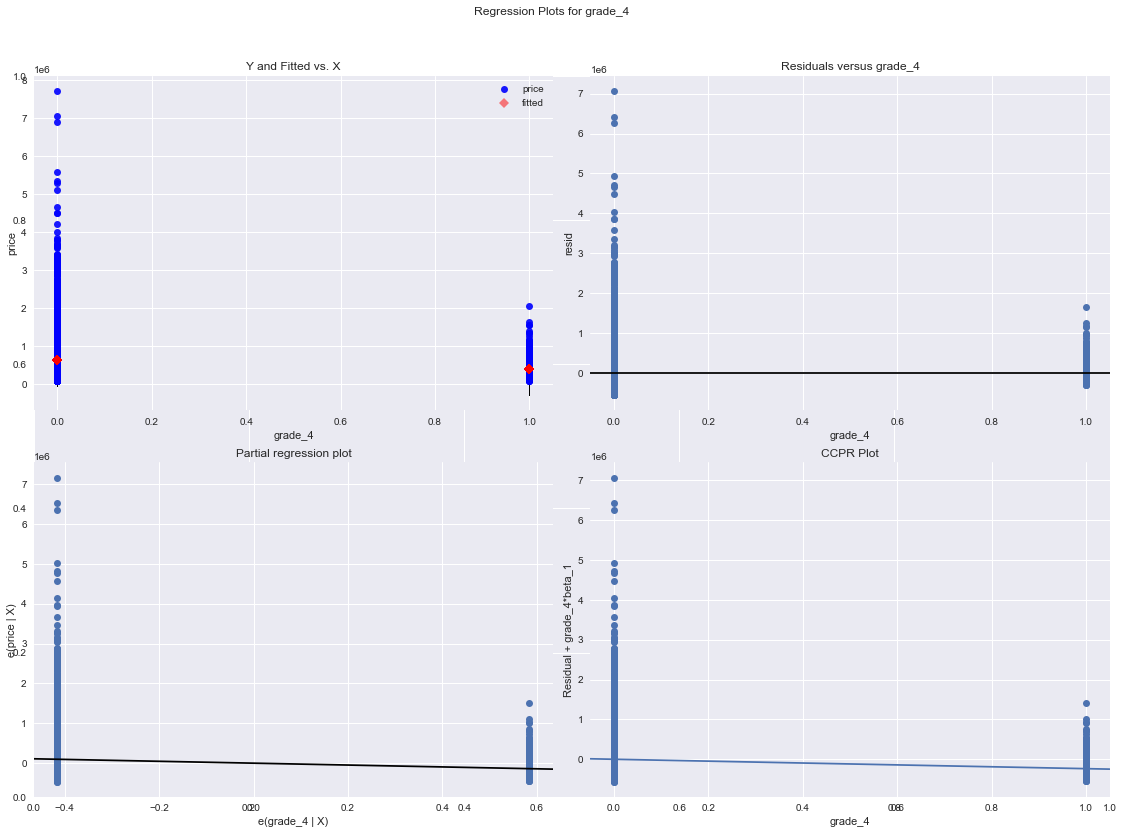

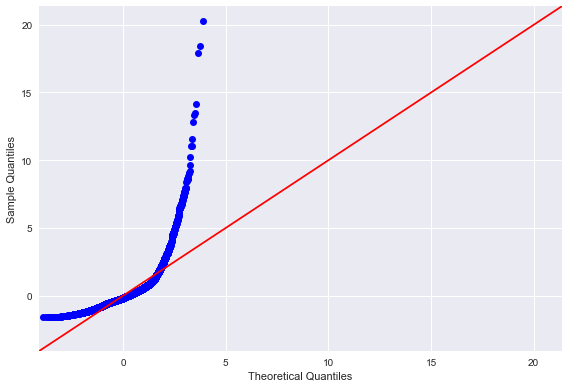

Regression Diagnostics for Price~grade_5


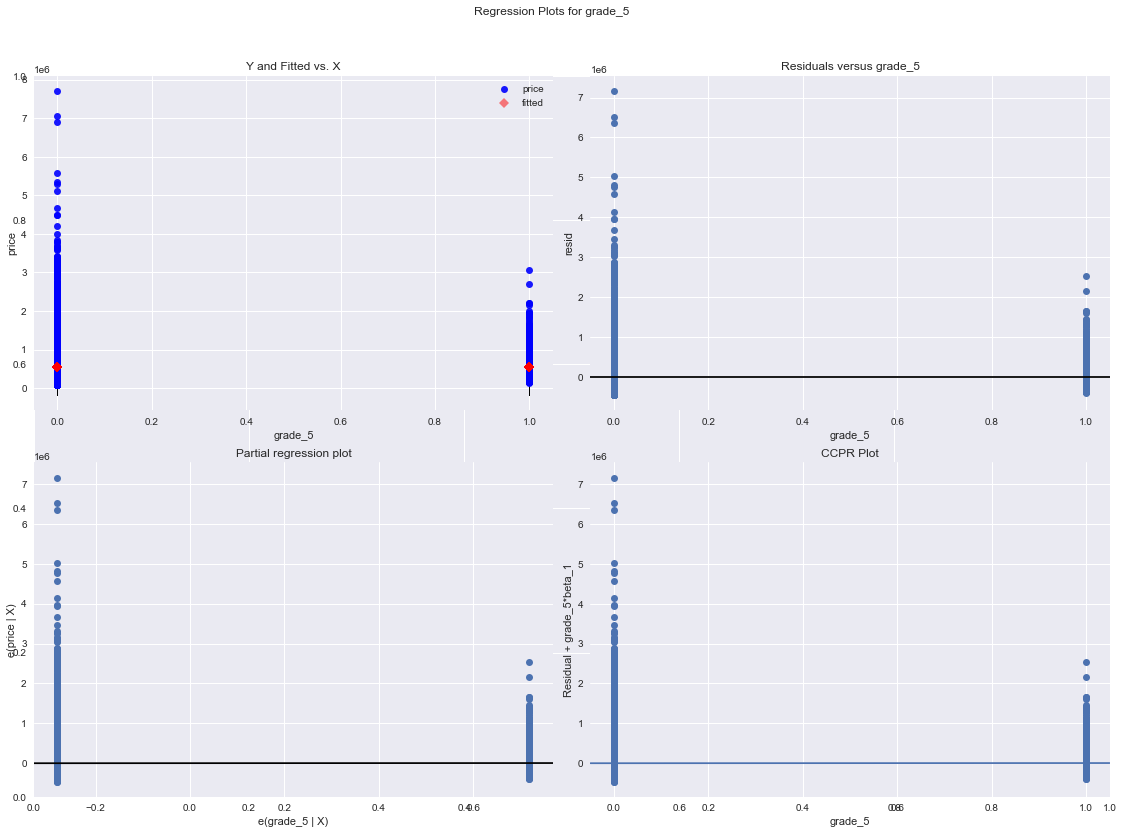

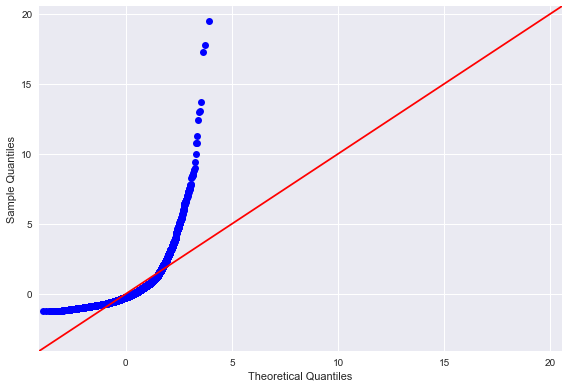

Regression Diagnostics for Price~grade_6


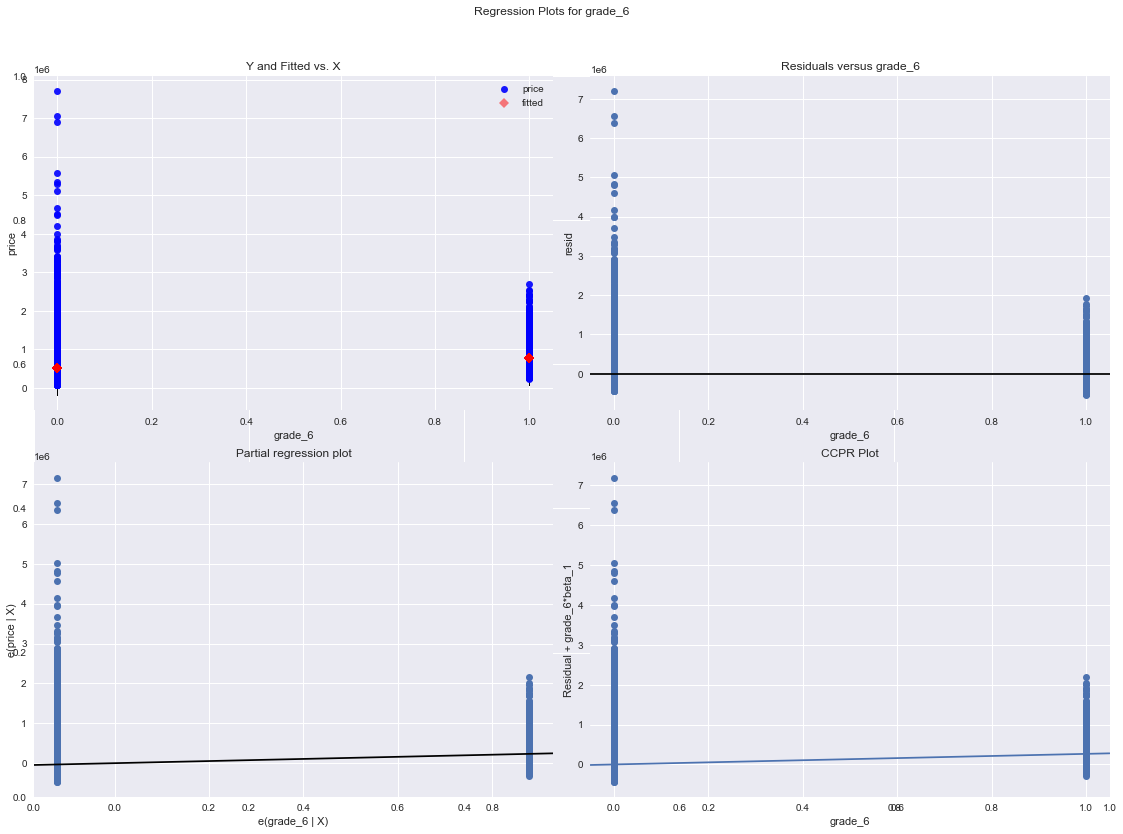

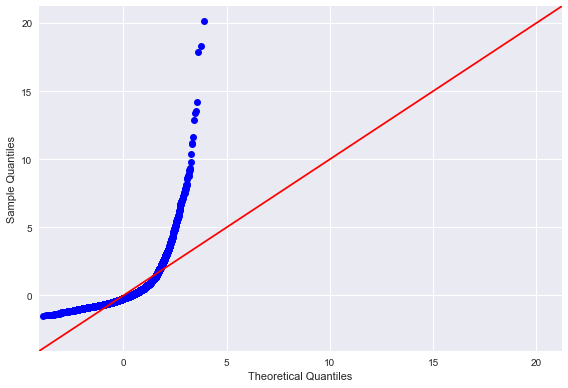

Regression Diagnostics for Price~grade_7


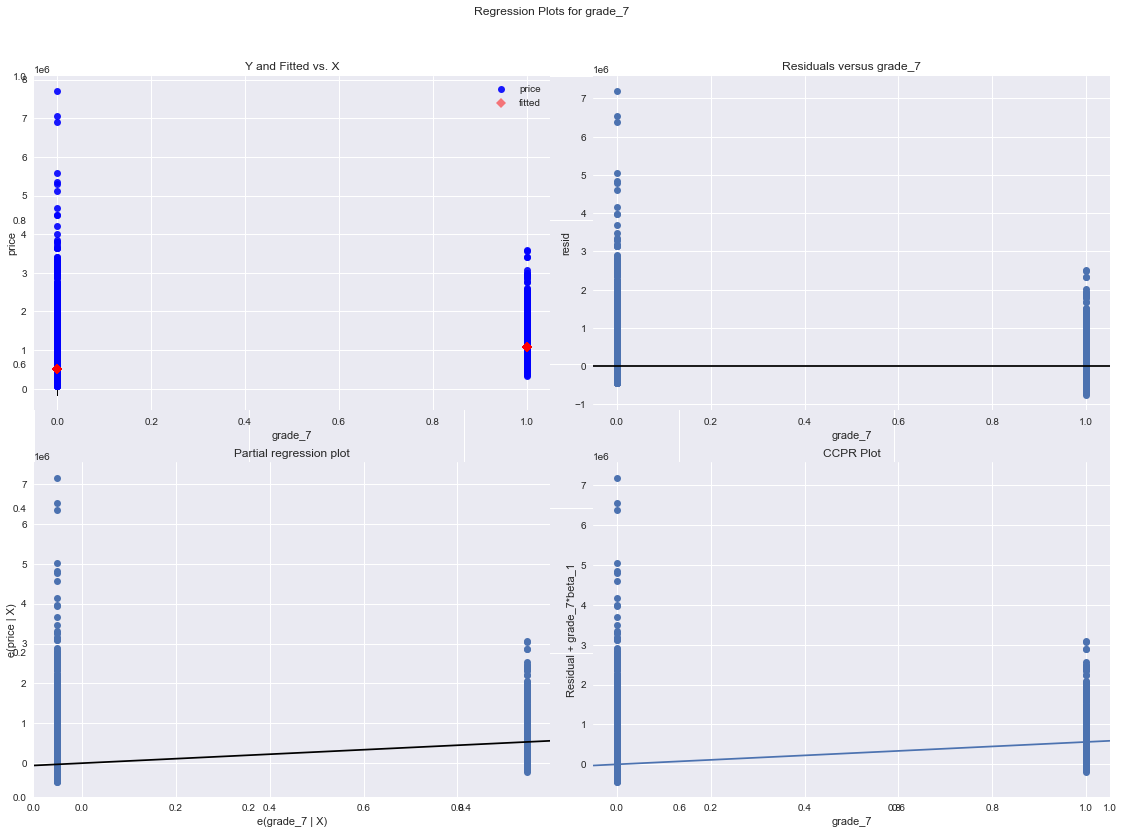

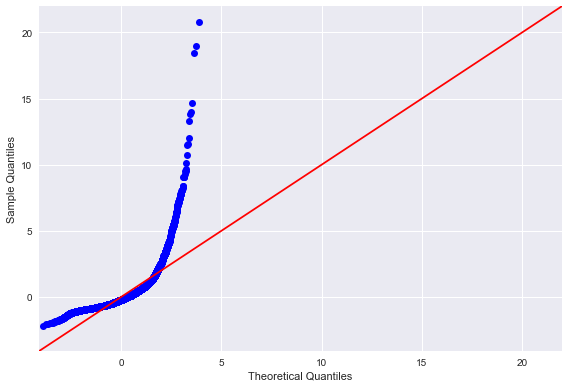

Regression Diagnostics for Price~grade_8


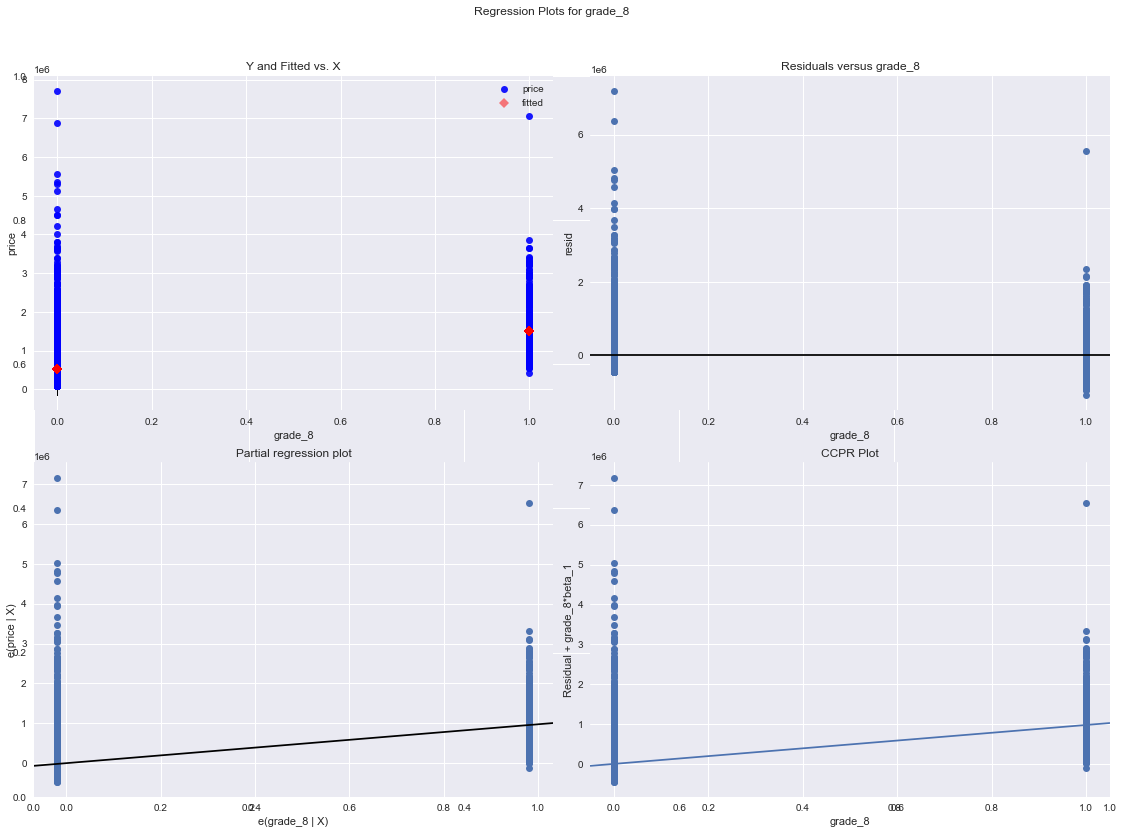

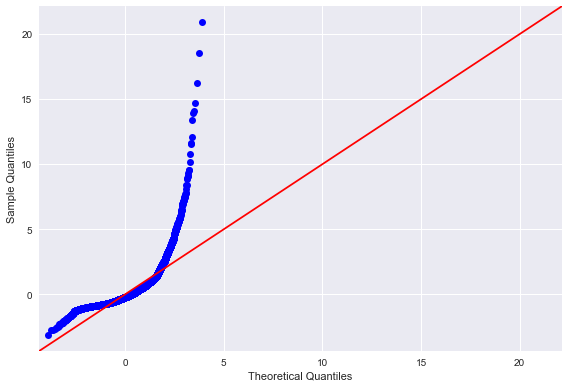

Regression Diagnostics for Price~grade_9


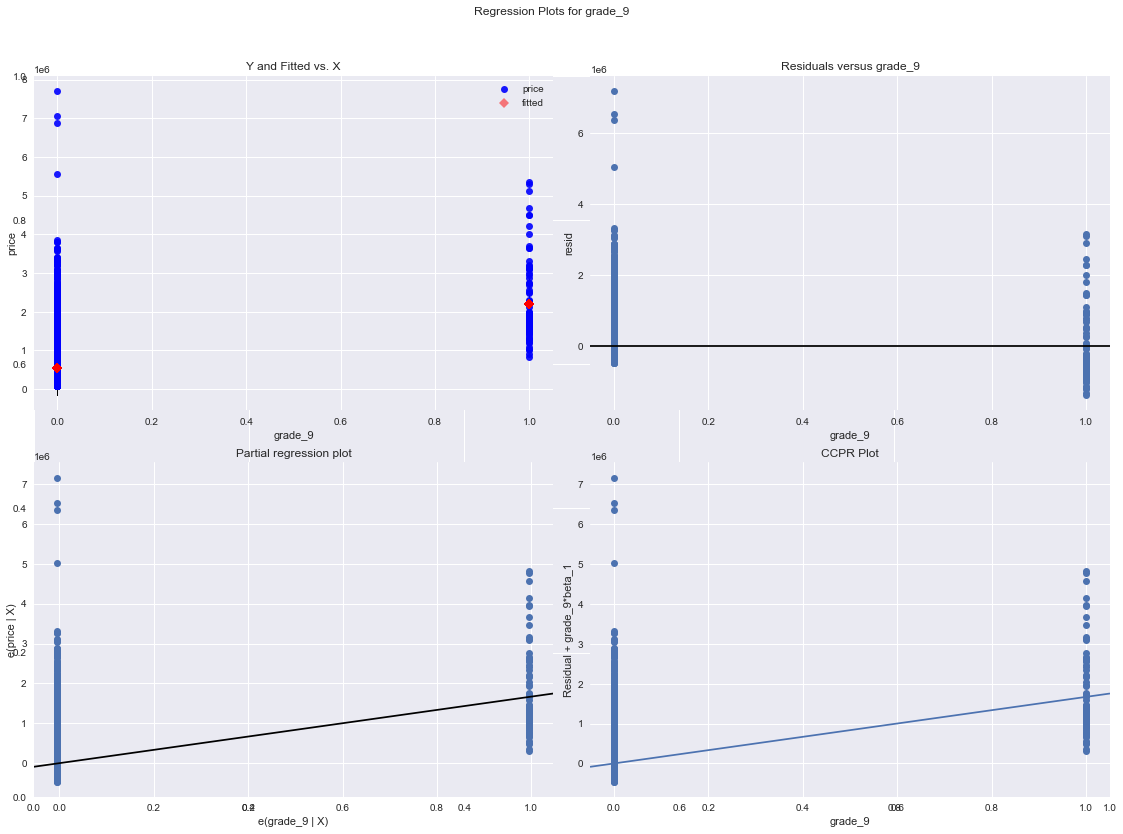

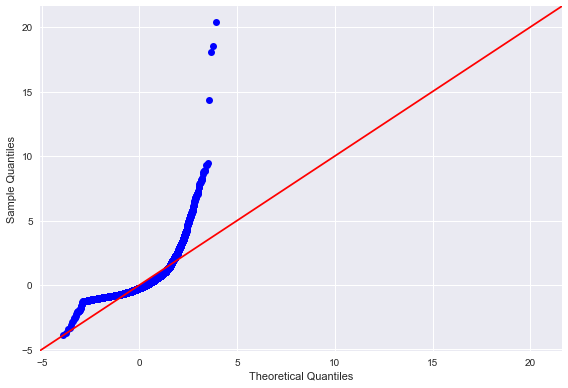

Regression Diagnostics for Price~grade_10


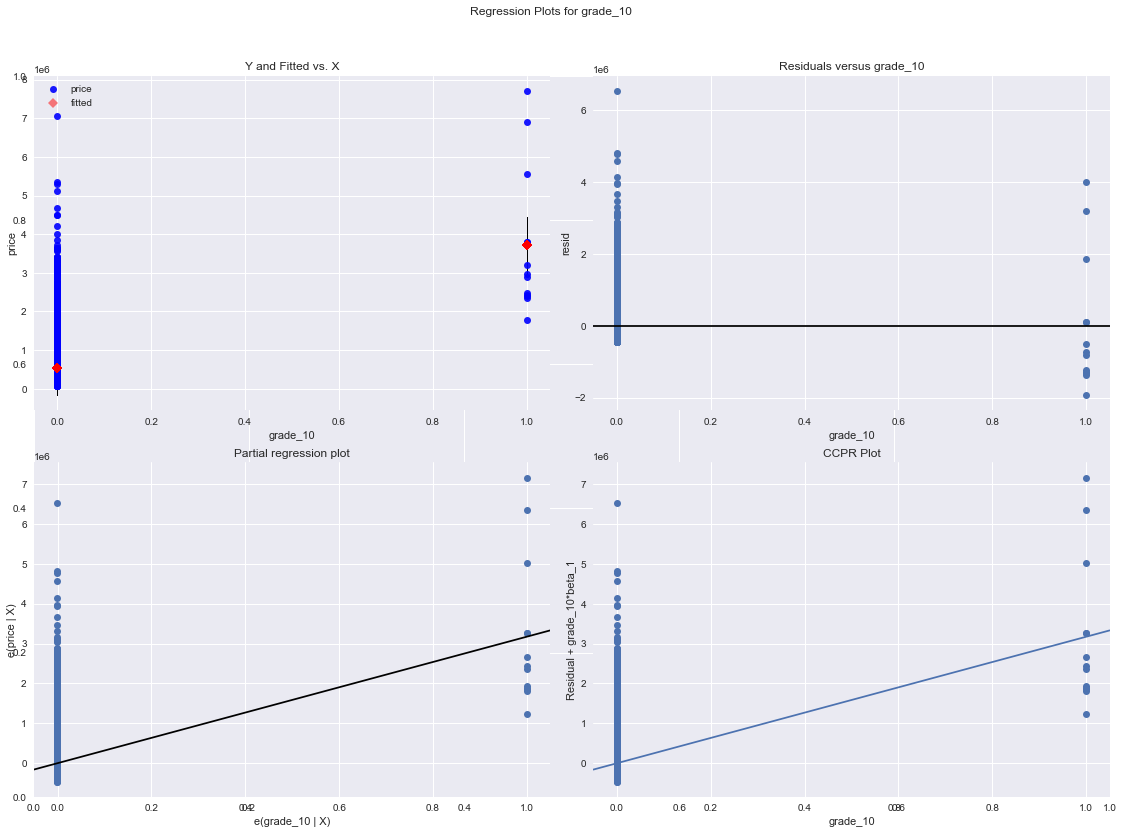

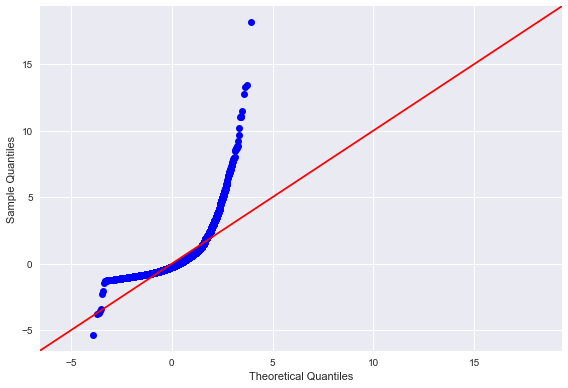

In [32]:
for idx, column in enumerate(df1.columns):
    print(f"Regression Diagnostics for Price~{column}")
    
    f = f'price~{column}'
    model = smf.ols(formula=f, data=df1).fit()
    
    fig, axes = plt.subplots(figsize=(16,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()

#### Create and evaluate the model

In [33]:
res, X, df_y, df_x, df_train_x, df_train_y = sm_lin_model(df1)

In [34]:
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     2076.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:05:54   Log-Likelihood:            -2.2336e+05
No. Observations:               16197   AIC:                         4.467e+05
Df Residuals:                   16185   BIC:                         4.468e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.823e+05   2.36e+05      0.772      

That's an improvement from the first model, but it's still not great. It's time to incorporate some other variables and possibly try to normalize some of the variables that look log-normal.

#### Check assumptions

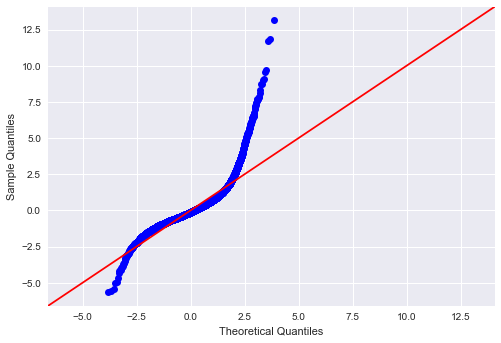

In [35]:
sm_check_resid_normality(res)

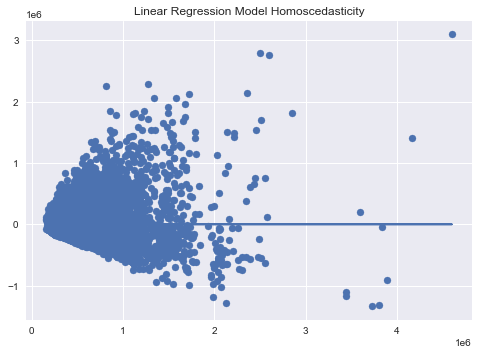

In [36]:
sm_check_scedas(res, df_train_y, X)

In [37]:
multicollinearity_check(df_x)

[('sqft_living', 15.31761237738164),
 ('grade_1', 1.0017162572055227),
 ('grade_2', 1.0320971098597982),
 ('grade_3', 1.3969100610530283),
 ('grade_4', 4.513704685212176),
 ('grade_5', 4.971099283394959),
 ('grade_6', 3.9507165867135647),
 ('grade_7', 2.9276469077052285),
 ('grade_8', 2.0573881407685795),
 ('grade_9', 1.366480856400538),
 ('grade_10', 1.0998524890682377)]

Model does not satisfy assumptions

#### Evaluate MAE

In [38]:
# generate predictions
ypred = res.predict(X)

# calc MAE
mae = meanabs
mae = mae(df_train_y['price'], ypred)
mae

156756.38242423633

### exploring relationship between sqft_living, sqft_above, sqft_basement

In [39]:
df_e = df[['sqft_living', 'sqft_above', 'sqft_basement']]
df_e

sqft_living  sqft_above  sqft_basement
0             1180        1180              0
1             2570        2170            400
2              770         770              0
3             1960        1050            910
4             1680        1680              0
...            ...         ...            ...
21592         1530        1530              0
21593         2310        2310              0
21594         1020        1020              0
21595         1600        1600              0
21596         1020        1020              0

[21597 rows x 3 columns]

Looks like sqft_living is the sum of sqft_above and sqft_basement

### Model 7 (Statsmodels)

In [40]:
# Stressing method for removing outliers in this model
df_7 = df.copy()
df_7.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.373200      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.926299      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       1.494096      0.006760      0.233181      2.409825      4.657915   
std        0.539683      0.081944      0.764673      0.650546      1.173200   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      0.000000      0.000000      2.000000      4.000000   
50%        1.500000      0.000000      0.000000      2.000000      4.000000   
75%        2.000000      0.000000      0.000000      3.000000      5.000000   
max        3.500000      1.000000      4.000000      4.000000     10.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21597.000000   21597.000000  21597.000000  21597.000000  21597.000000   
mean    1788.596842     285.716581   1970.999676     68.758207  98077.951845   
std      827.759761     439.819830     29.375234    364.037499     53.513072   
min      370.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     550.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [41]:
# Remove outliers based on price via IQR
IQR_low = np.quantile(df_7.price, 0.25)
IQR_high = np.quantile(df_7.price, 0.75)
df_7_IQR = df_7.loc[(df_7.price > IQR_low) & (df_7.price < IQR_high)] 

df_7_IQR

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
1      538000.0         3       2.25         2570      7242     2.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
9      323000.0         3       2.50         1890      6560     2.0   
11     468000.0         2       1.00         1160      6000     1.0   
...         ...       ...        ...          ...       ...     ...   
21592  360000.0         3       2.50         1530      1131     3.0   
21593  400000.0         4       2.50         2310      5813     2.0   
21594  402101.0         2       0.75         1020      1350     2.0   
21595  400000.0         3       2.50         1600      2388     2.0   
21596  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
1               0     0          2      4        2170            400   
3               0     0          4      4        1050            910   
4               0     0          2      5        1680              0   
9               0     0          2      4        1890              0   
11              0     0          3      4         860            300   
...           ...   ...        ...    ...         ...            ...   
21592           0     0          2      5        1530              0   
21593           0     0          2      5        2310              0   
21594           0     0          2      4        1020              0   
21595           0     0          2      5        1600              0   
21596           0     0          2      4        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
1          1951        1991.0    98125  47.7210 -122.319           1690   
3          1965           0.0    98136  47.5208 -122.393           1360   
4          1987           0.0    98074  47.6168 -122.045           1800   
9          2003           0.0    98038  47.3684 -122.031           2390   
11         1942           0.0    98115  47.6900 -122.292           1330   
...         ...           ...      ...      ...      ...            ...   
21592      2009           0.0    98103  47.6993 -122.346           1530   
21593      2014           0.0    98146  47.5107 -122.362           1830   
21594      2009           0.0    98144  47.5944 -122.299           1020   
21595      2004           0.0    98027  47.5345 -122.069           1410   
21596      2008           0.0    98144  47.5941 -122.299           1020   

       sqft_lot15  
1            7639  
3            5000  
4            7503  
9            7570  
11           6000  
...           ...  
21592        1509  
21593        7200  
21594        2007  
21595        1287  
21596        1357  

[10780 rows x 19 columns]

In [42]:
# drop other outliers
df_7_IQR = df_7_IQR[df_7_IQR['bedrooms'] < 32]     # drops outlier of 33
df_7_IQR = df_7_IQR[df_7_IQR['bathrooms'] < 7]     # drops homes with over 7 bathrooms
df_7_IQR.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count   10778.000000  10778.000000  10778.000000  10778.000000  1.077800e+04   
mean   461601.493041      3.314437      2.062558   1929.149100  1.430299e+04   
std     89620.597804      0.867664      0.647907    646.583799  3.610550e+04   
min    322200.000000      1.000000      0.750000    410.000000  6.000000e+02   
25%    385000.000000      3.000000      1.750000   1450.000000  4.652250e+03   
50%    450000.000000      3.000000      2.250000   1860.000000  7.203500e+03   
75%    535000.000000      4.000000      2.500000   2330.000000  1.009800e+04   
max    644500.000000     11.000000      5.750000   5461.000000  1.074218e+06   

             floors    waterfront          view     condition         grade  \
count  10778.000000  10778.000000  10778.000000  10778.000000  10778.000000   
mean       1.494572      0.001856      0.136389      2.382910      4.493413   
std        0.556865      0.043039      0.559324      0.623883      0.805937   
min        1.000000      0.000000      0.000000      0.000000      1.000000   
25%        1.000000      0.000000      0.000000      2.000000      4.000000   
50%        1.000000      0.000000      0.000000      2.000000      4.000000   
75%        2.000000      0.000000      0.000000      3.000000      5.000000   
max        3.500000      1.000000      4.000000      4.000000      8.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated      zipcode  \
count  10778.000000   10778.000000  10778.000000  10778.000000  10778.00000   
mean    1653.338931     269.976619   1971.965021     52.162924  98081.39627   
std      627.988370     397.643153     29.595218    318.263091     50.30362   
min      410.000000       0.000000   1900.000000      0.000000  98001.00000   
25%     1180.000000       0.000000   1952.000000      0.000000  98034.00000   
50%     1500.000000       0.000000   1976.000000      0.000000  98074.00000   
75%     2047.500000     520.000000   1999.000000      0.000000  98118.00000   
max     5450.000000    2196.000000   2015.000000   2015.000000  98199.00000   

                lat          long  sqft_living15     sqft_lot15  
count  10778.000000  10778.000000   10778.000000   10778.000000  
mean      47.590178   -122.213675    1886.985433   12489.442847  
std        0.130457      0.146416     508.646741   26856.227894  
min       47.155900   -122.519000     399.000000     748.000000  
25%       47.511600   -122.338000    1500.000000    4800.000000  
50%       47.606000   -122.237000    1810.000000    7265.000000  
75%       47.696800   -122.121000    2230.000000    9719.000000  
max       47.777600   -121.321000    4362.000000  438213.000000

In [43]:
# create dummy variables for categoricals
categoricals_d7 = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view',
                  'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode',
                  'lat', 'long']

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

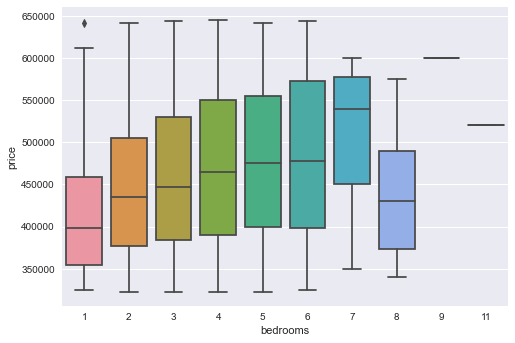

In [44]:
# boxplots for each categorical category
sns.boxplot(x='bedrooms', y='price', data=df_7_IQR)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

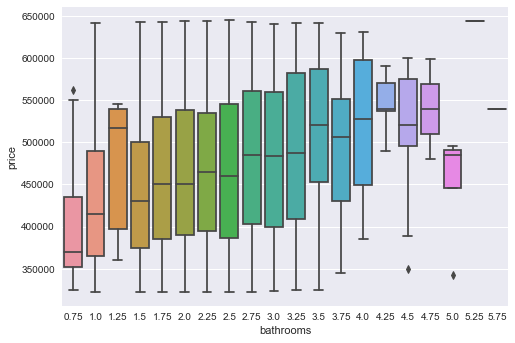

In [45]:
sns.boxplot(x='bathrooms', y='price', data=df_7_IQR)

<AxesSubplot:xlabel='floors', ylabel='price'>

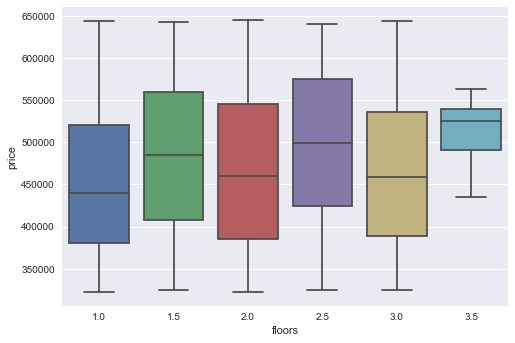

In [46]:
sns.boxplot(x='floors', y='price', data=df_7_IQR)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

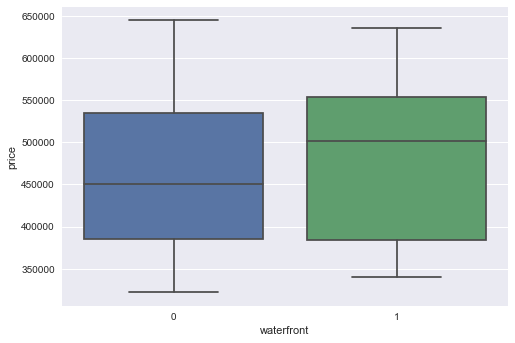

In [47]:
sns.boxplot(x='waterfront', y='price', data=df_7_IQR)

<AxesSubplot:xlabel='view', ylabel='price'>

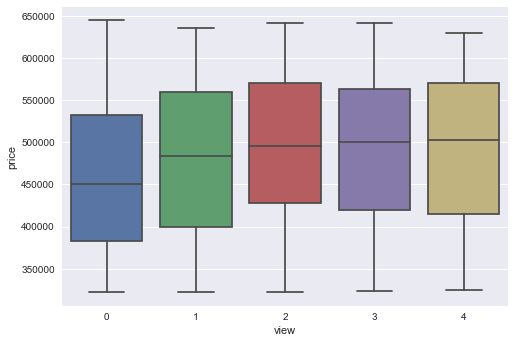

In [48]:
sns.boxplot(x='view', y='price', data=df_7_IQR)

<AxesSubplot:xlabel='condition', ylabel='price'>

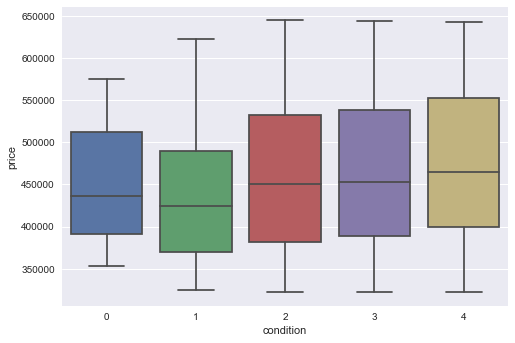

In [49]:
sns.boxplot(x='condition', y='price', data=df_7_IQR)

<AxesSubplot:xlabel='grade', ylabel='price'>

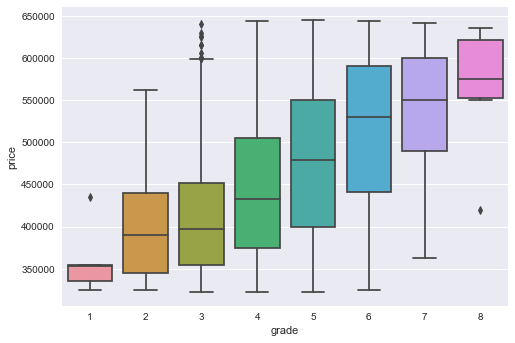

In [50]:
sns.boxplot(x='grade', y='price', data=df_7_IQR)

[Text(0, 0, '98001'),
 Text(1, 0, '98002'),
 Text(2, 0, '98003'),
 Text(3, 0, '98004'),
 Text(4, 0, '98005'),
 Text(5, 0, '98006'),
 Text(6, 0, '98007'),
 Text(7, 0, '98008'),
 Text(8, 0, '98010'),
 Text(9, 0, '98011'),
 Text(10, 0, '98014'),
 Text(11, 0, '98019'),
 Text(12, 0, '98022'),
 Text(13, 0, '98023'),
 Text(14, 0, '98024'),
 Text(15, 0, '98027'),
 Text(16, 0, '98028'),
 Text(17, 0, '98029'),
 Text(18, 0, '98030'),
 Text(19, 0, '98031'),
 Text(20, 0, '98032'),
 Text(21, 0, '98033'),
 Text(22, 0, '98034'),
 Text(23, 0, '98038'),
 Text(24, 0, '98040'),
 Text(25, 0, '98042'),
 Text(26, 0, '98045'),
 Text(27, 0, '98052'),
 Text(28, 0, '98053'),
 Text(29, 0, '98055'),
 Text(30, 0, '98056'),
 Text(31, 0, '98058'),
 Text(32, 0, '98059'),
 Text(33, 0, '98065'),
 Text(34, 0, '98070'),
 Text(35, 0, '98072'),
 Text(36, 0, '98074'),
 Text(37, 0, '98075'),
 Text(38, 0, '98077'),
 Text(39, 0, '98092'),
 Text(40, 0, '98102'),
 Text(41, 0, '98103'),
 Text(42, 0, '98105'),
 Text(43, 0, '98106')

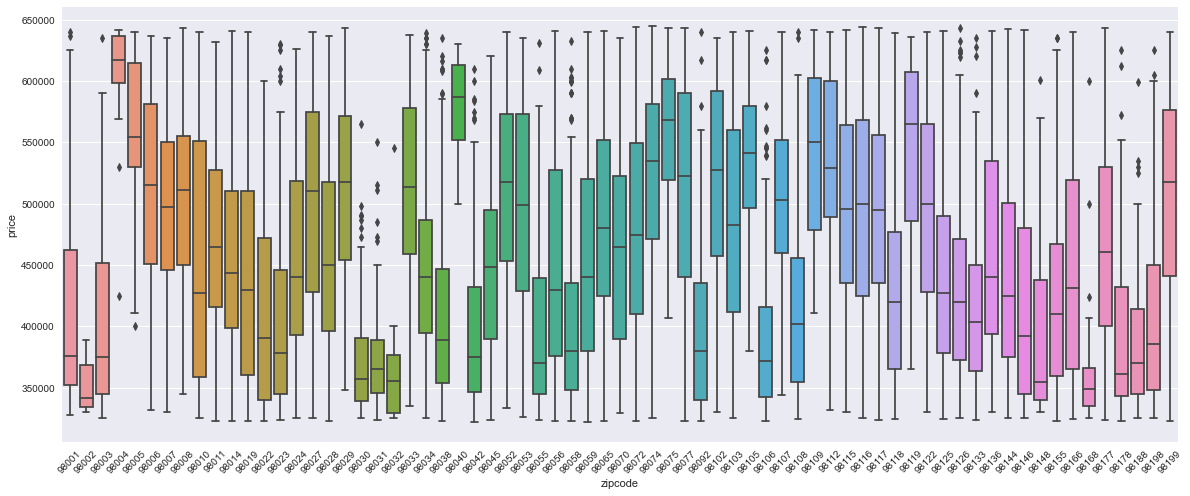

In [51]:
plt.figure(figsize=(20,8))
b = sns.boxplot(x='zipcode', y='price', data=df_7_IQR)
b.set_xticklabels(b.get_xticklabels(), rotation=45)

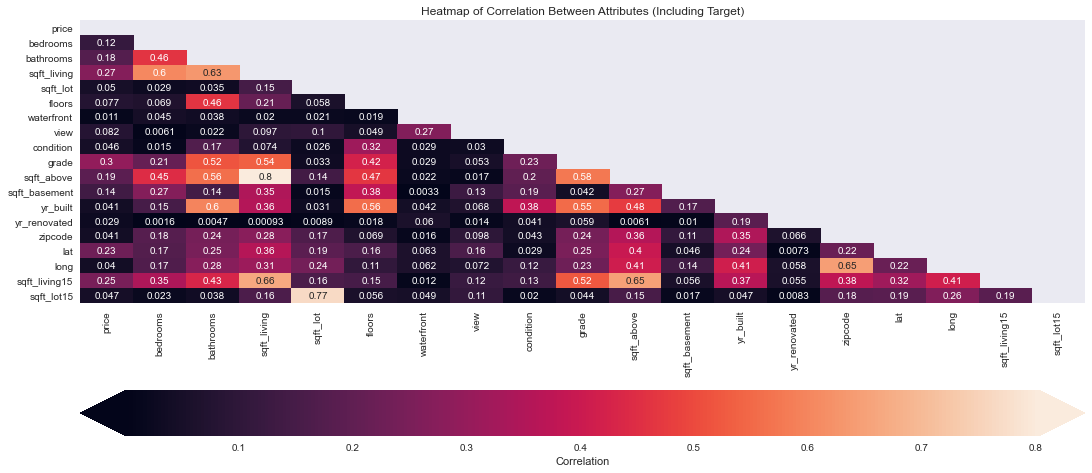

In [52]:
# check correlating features
# adapted from dsc-linear-regression-lab
# author: hoffm386
# link: https://github.com/learn-co-curriculum/dsc-linear-regression-lab/tree/solution
heatmap_data = df_7_IQR
corr = np.abs(heatmap_data.corr())

# Set up figure and axes
fig, ax = plt.subplots(figsize=(18, 8))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2,
              "extend": "both"}
)

ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Regression Diagnostics for Price~price


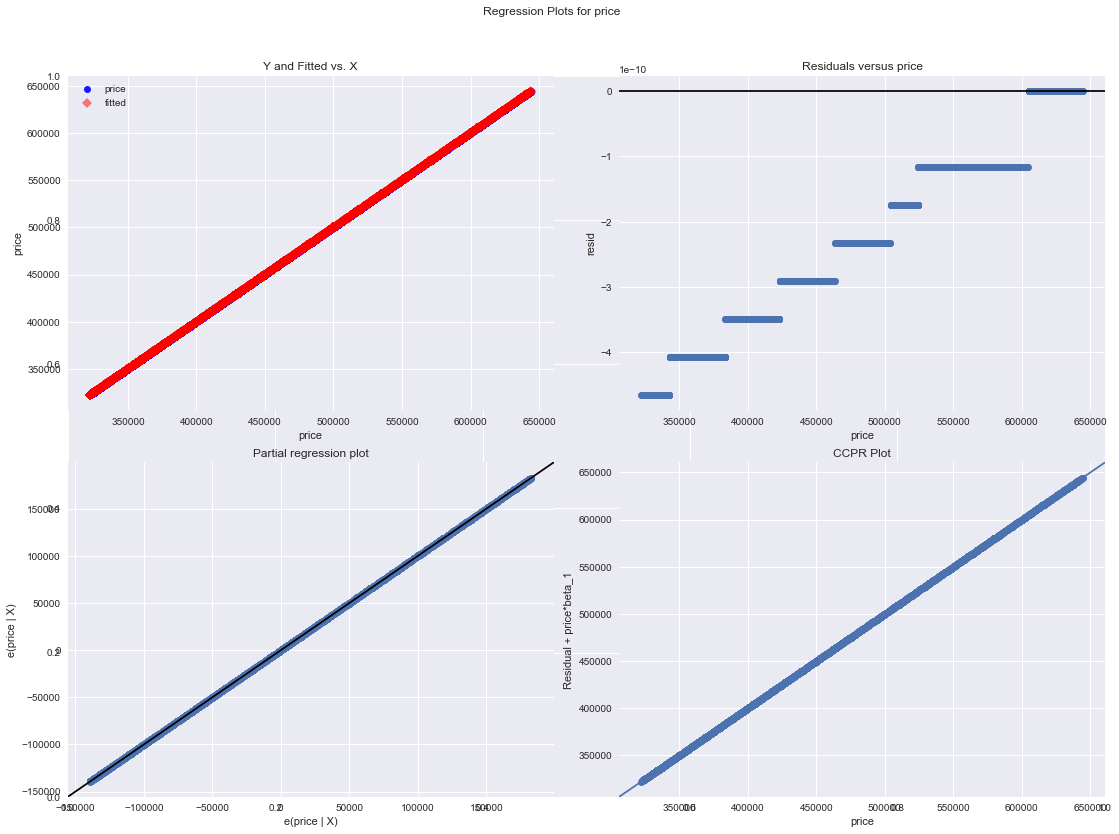

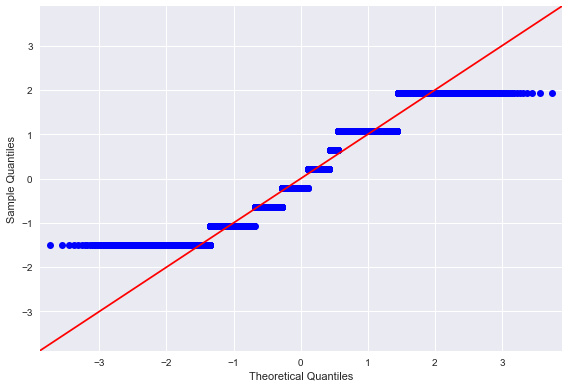

Regression Diagnostics for Price~bedrooms


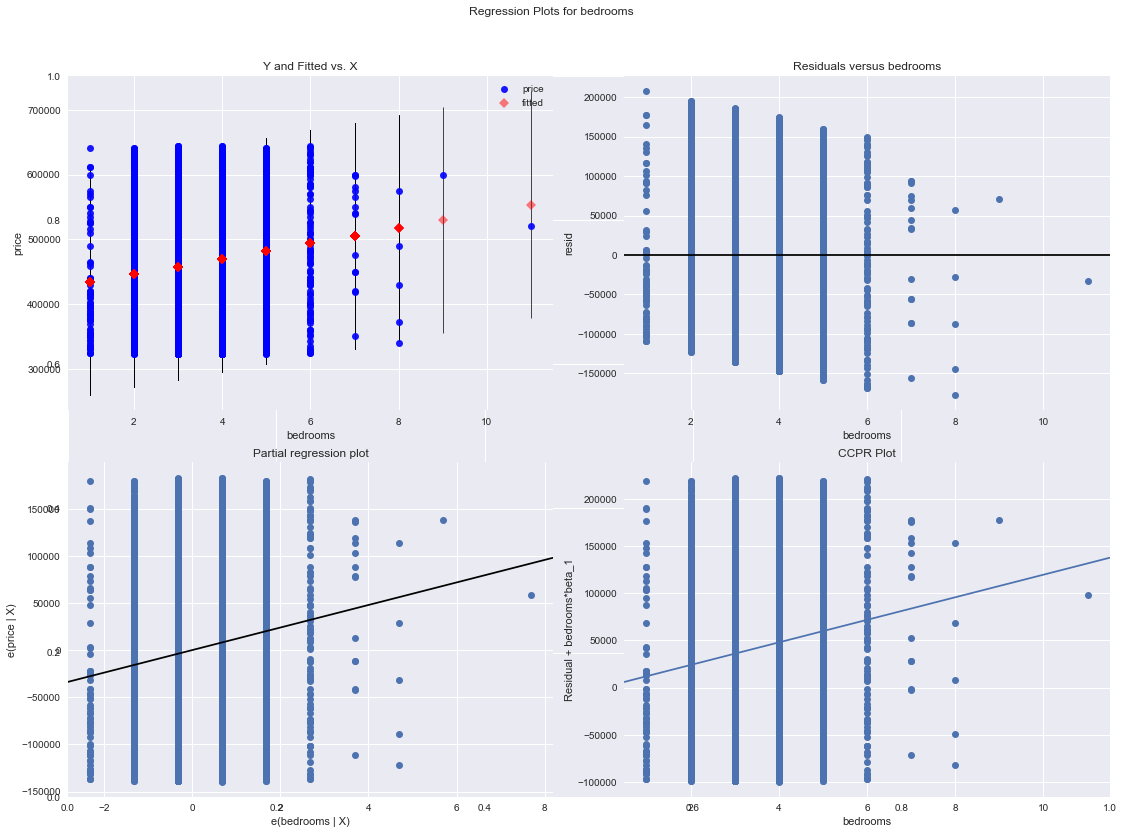

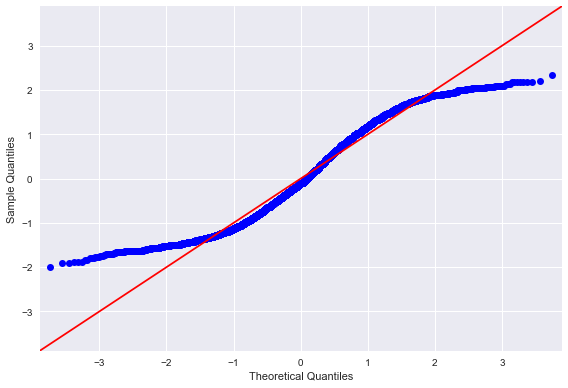

Regression Diagnostics for Price~bathrooms


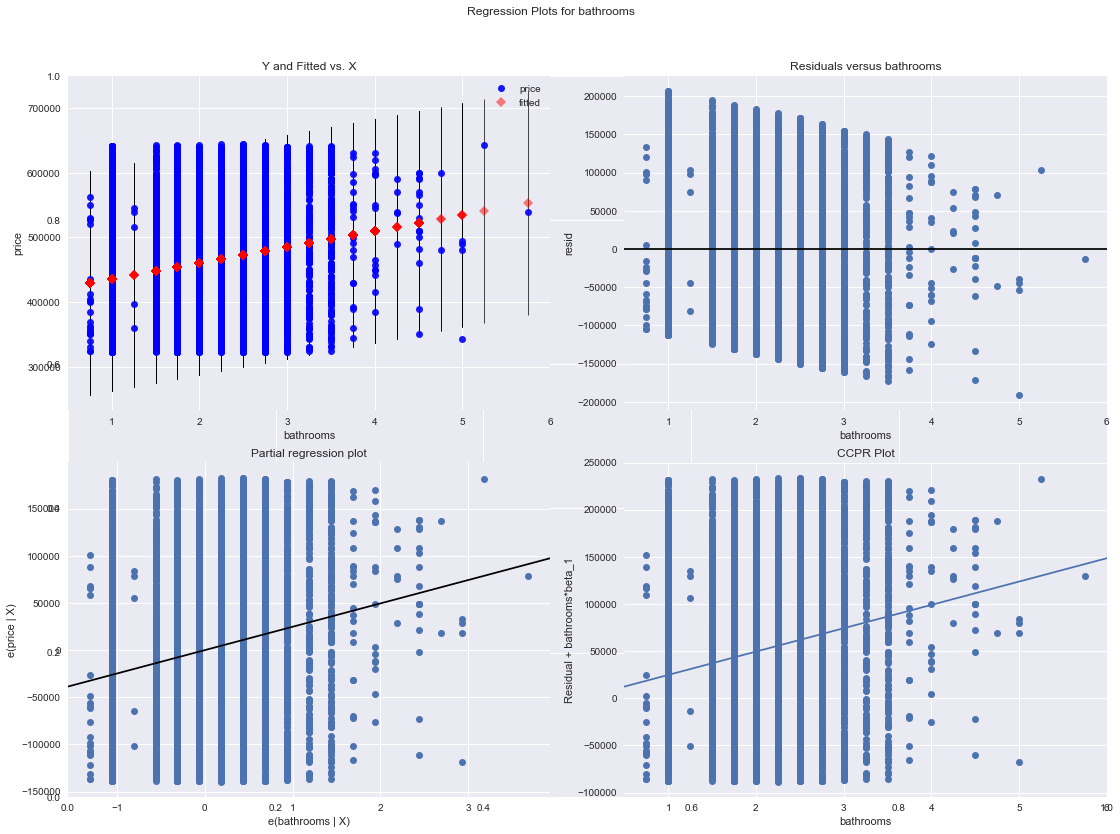

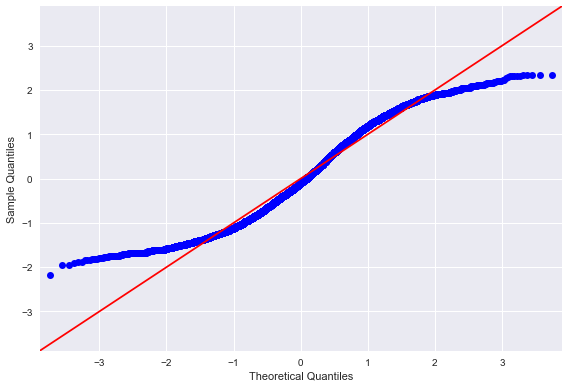

Regression Diagnostics for Price~sqft_living


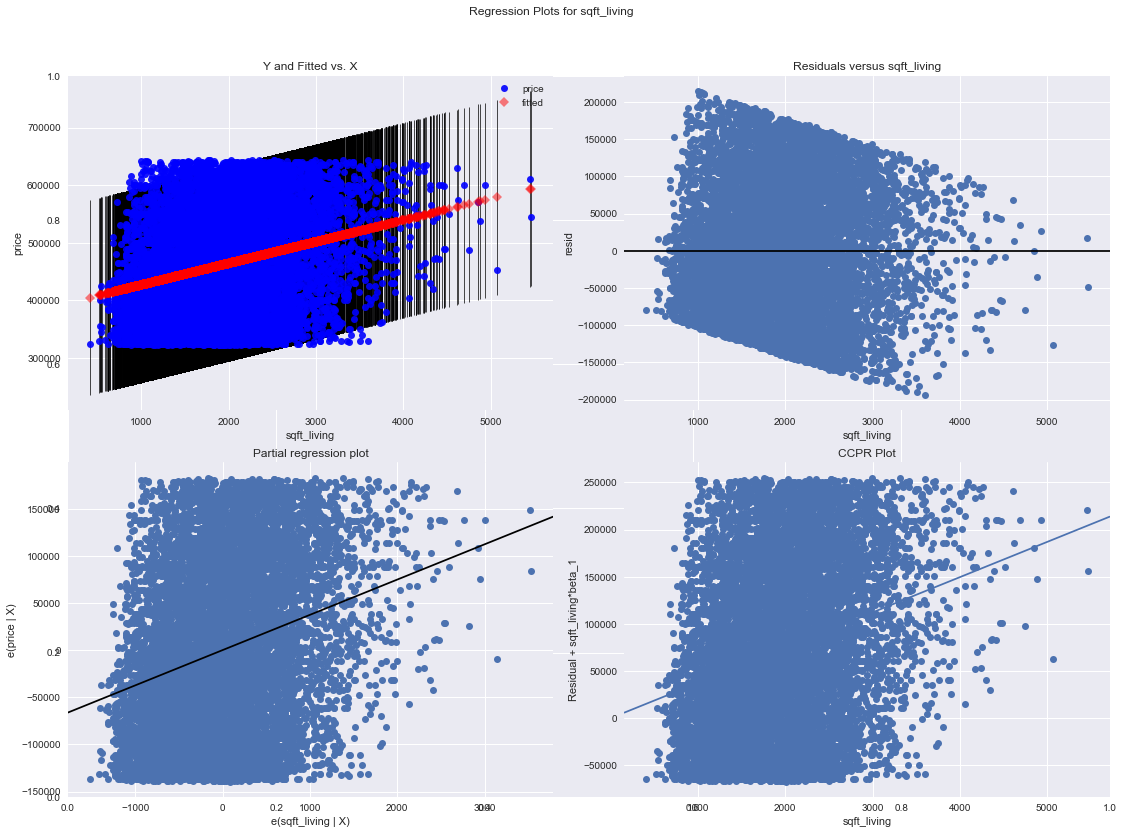

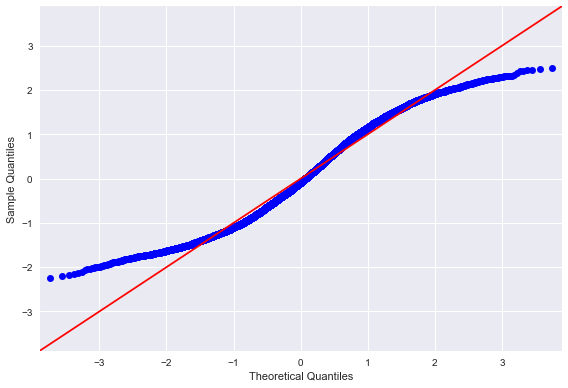

Regression Diagnostics for Price~sqft_lot


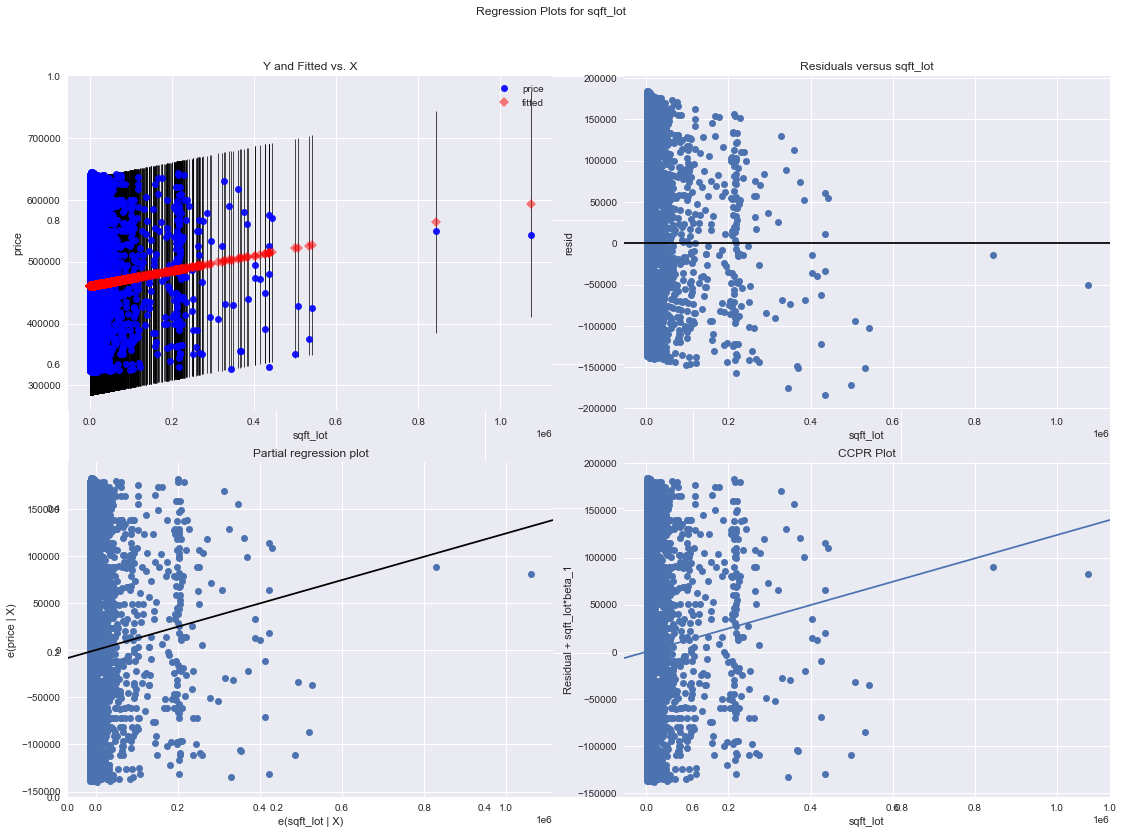

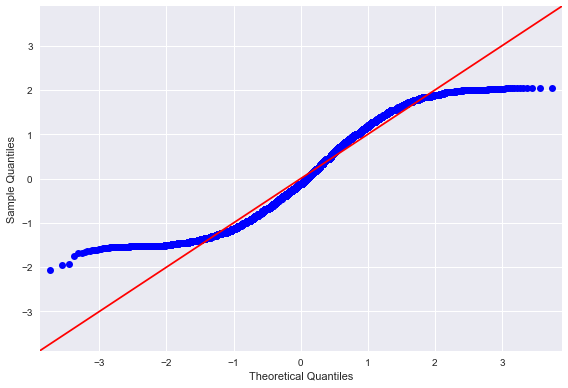

Regression Diagnostics for Price~floors


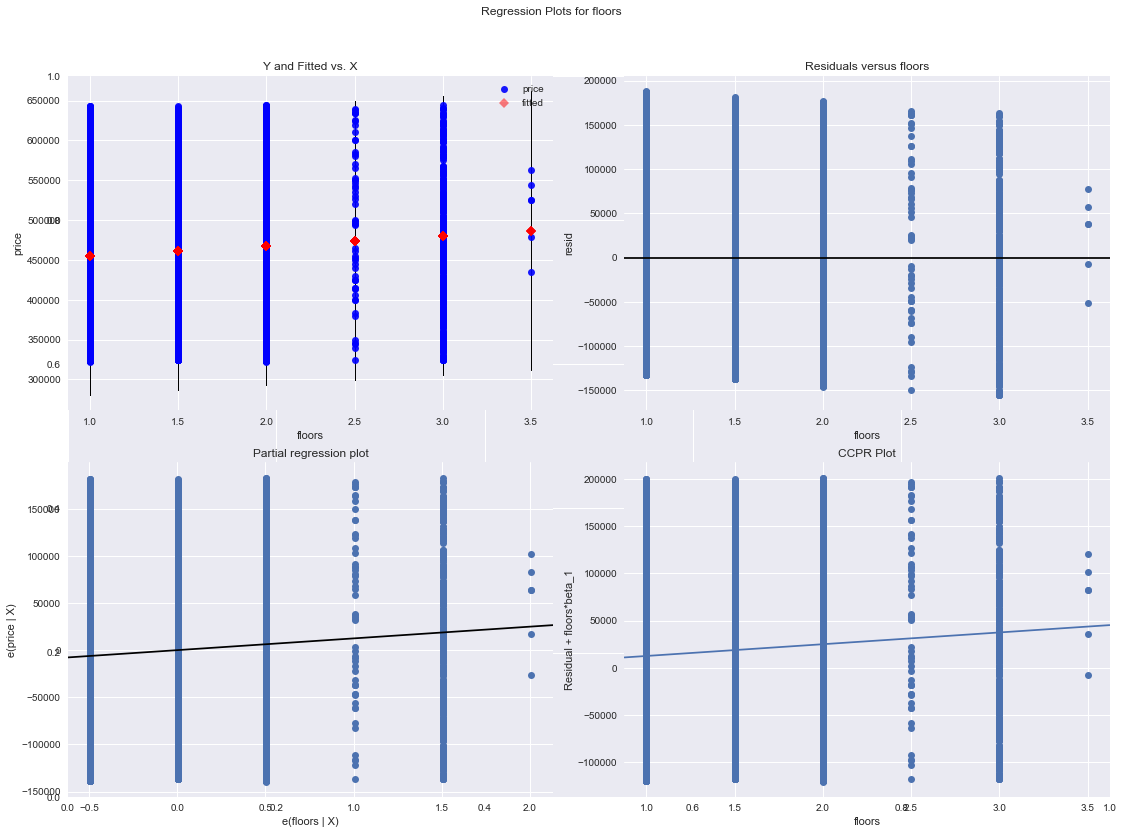

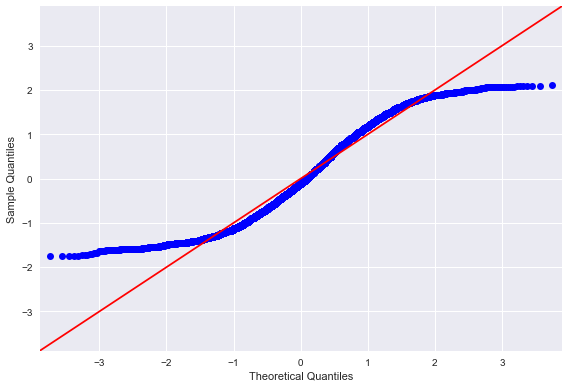

Regression Diagnostics for Price~waterfront


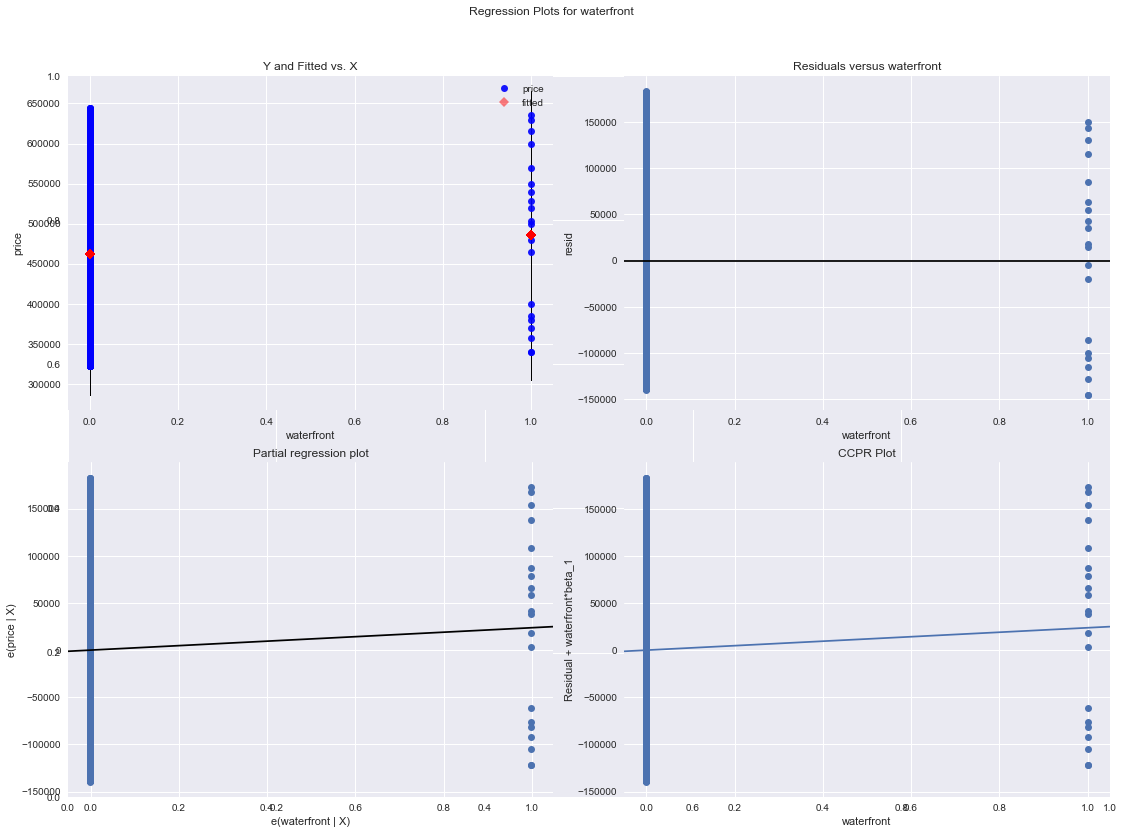

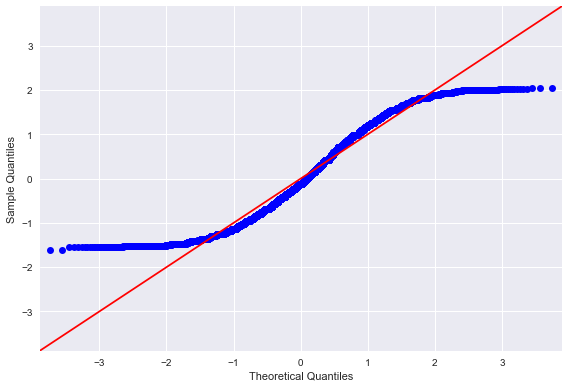

Regression Diagnostics for Price~view


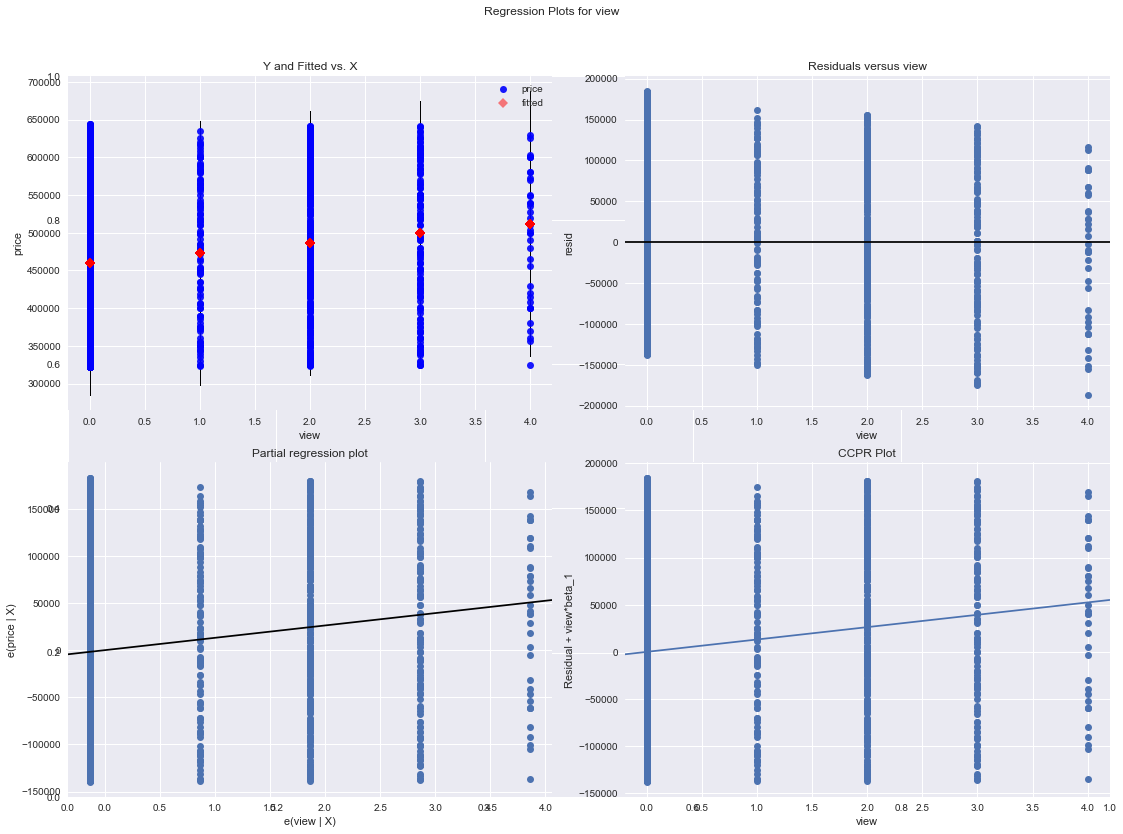

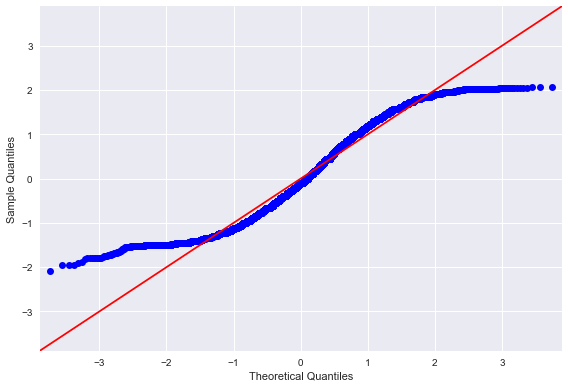

Regression Diagnostics for Price~condition


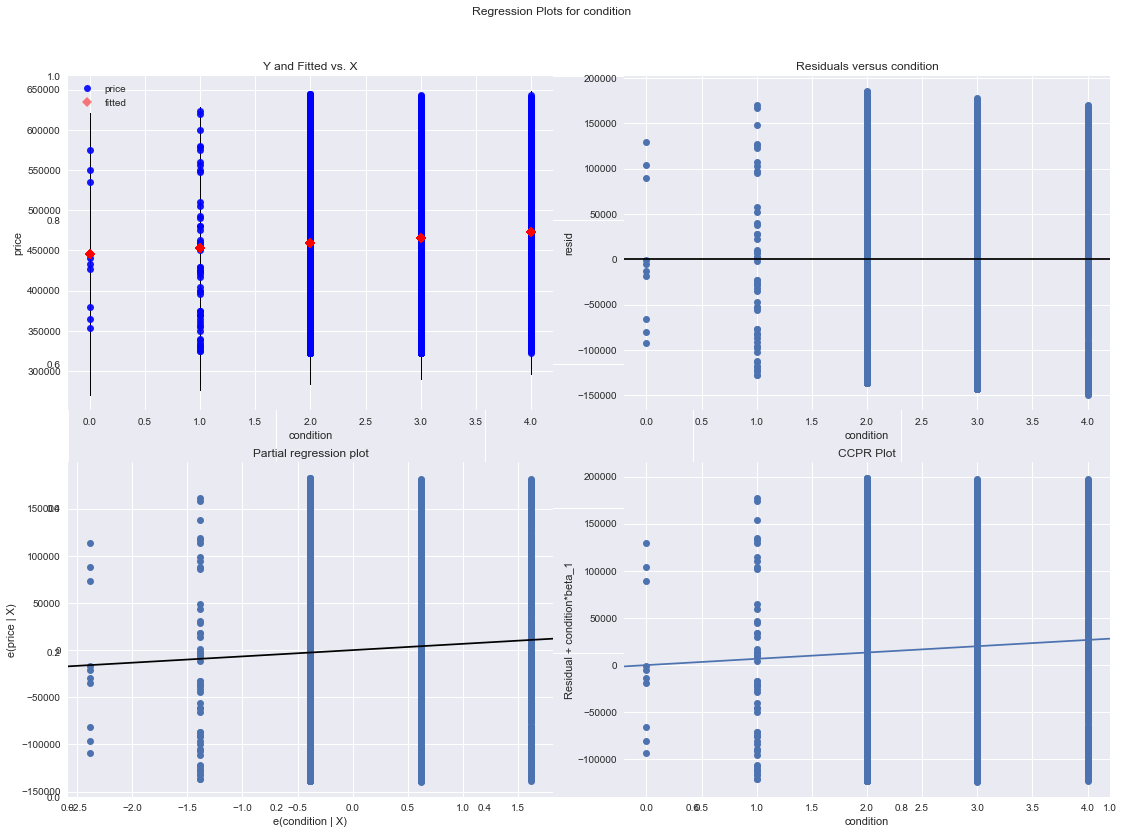

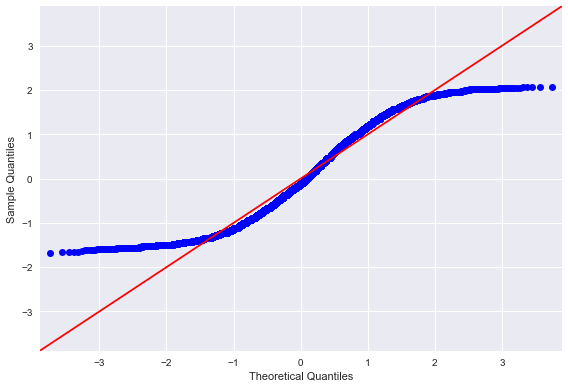

Regression Diagnostics for Price~grade


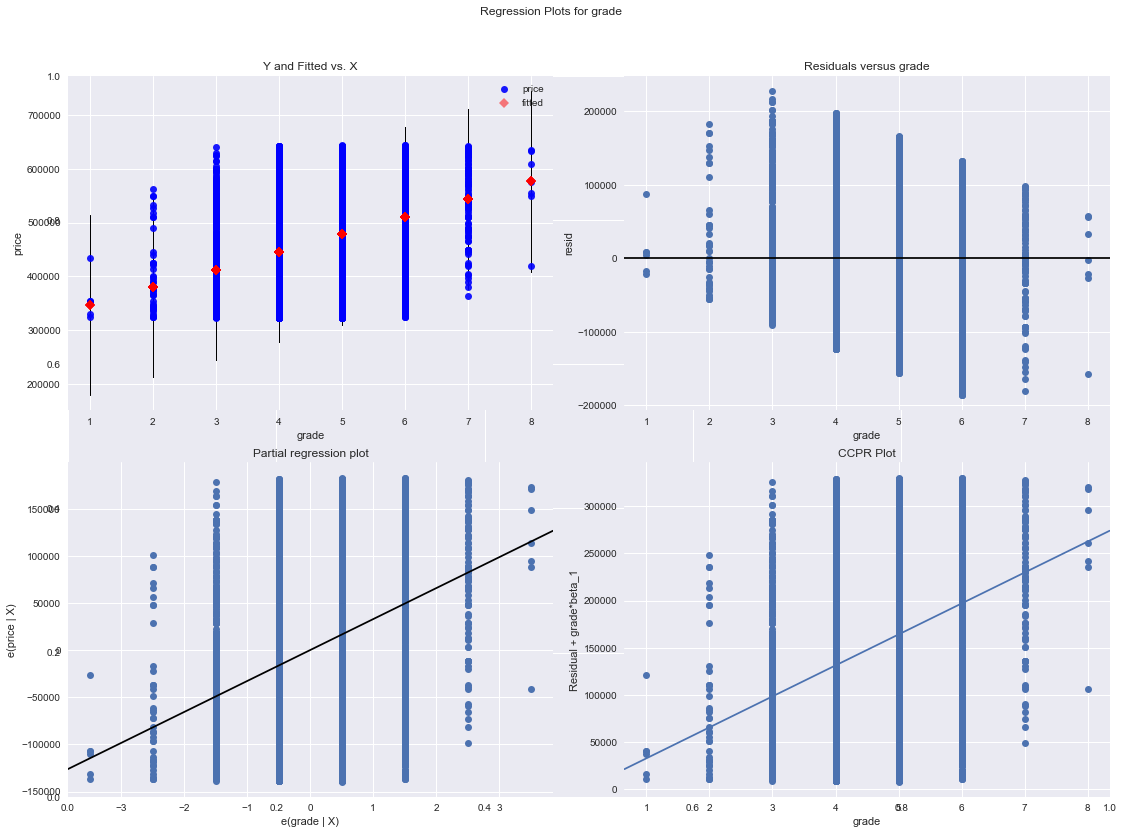

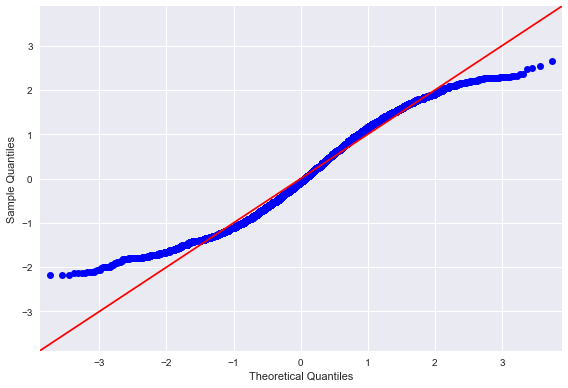

Regression Diagnostics for Price~sqft_above


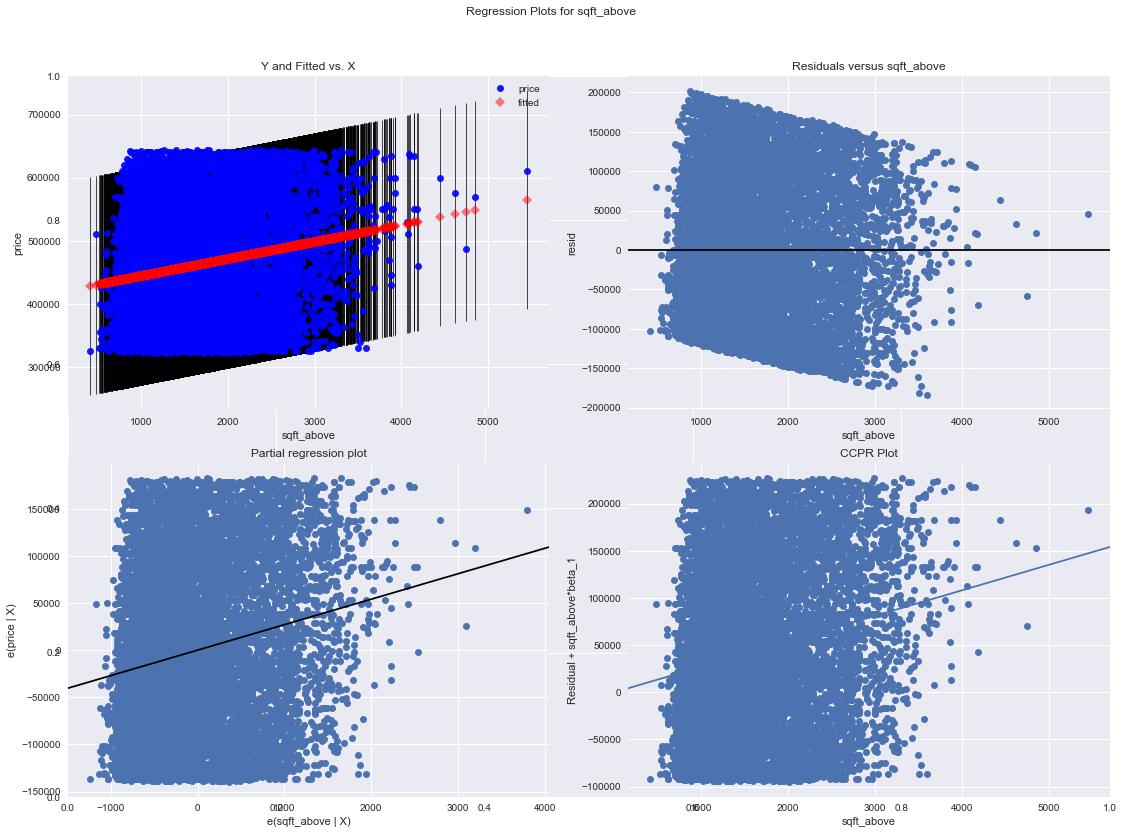

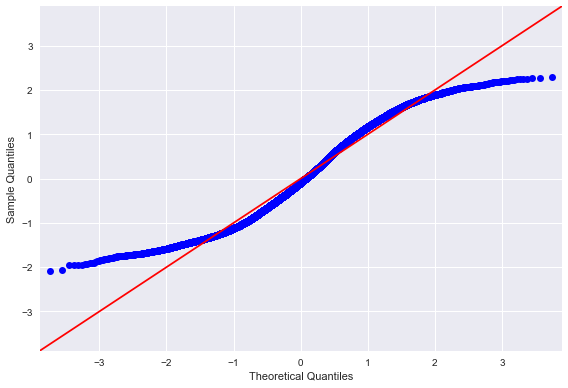

Regression Diagnostics for Price~sqft_basement


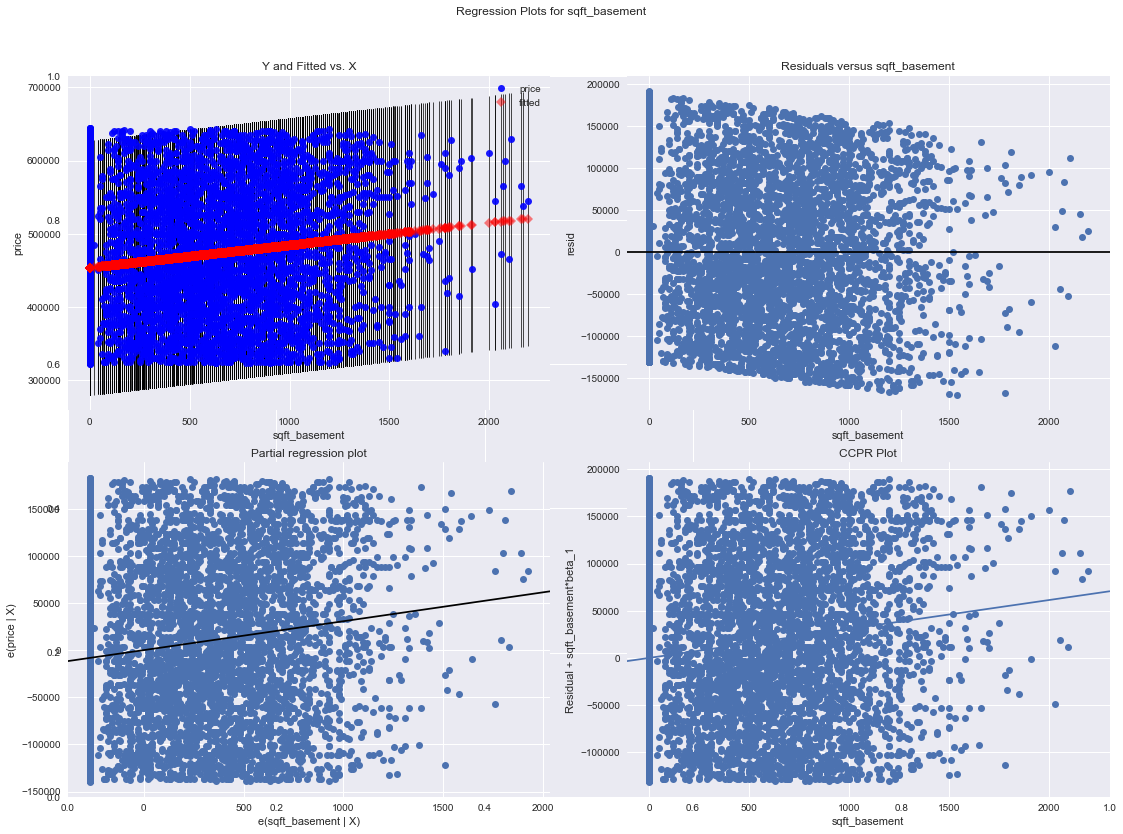

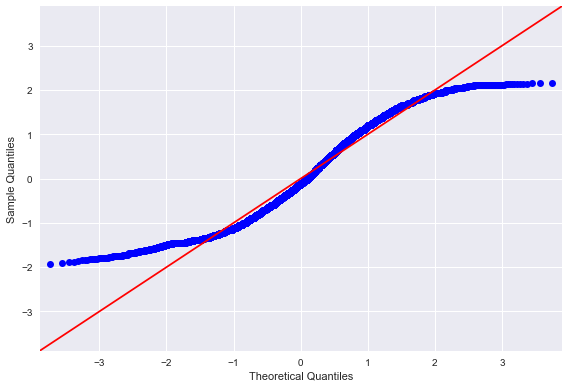

Regression Diagnostics for Price~yr_built


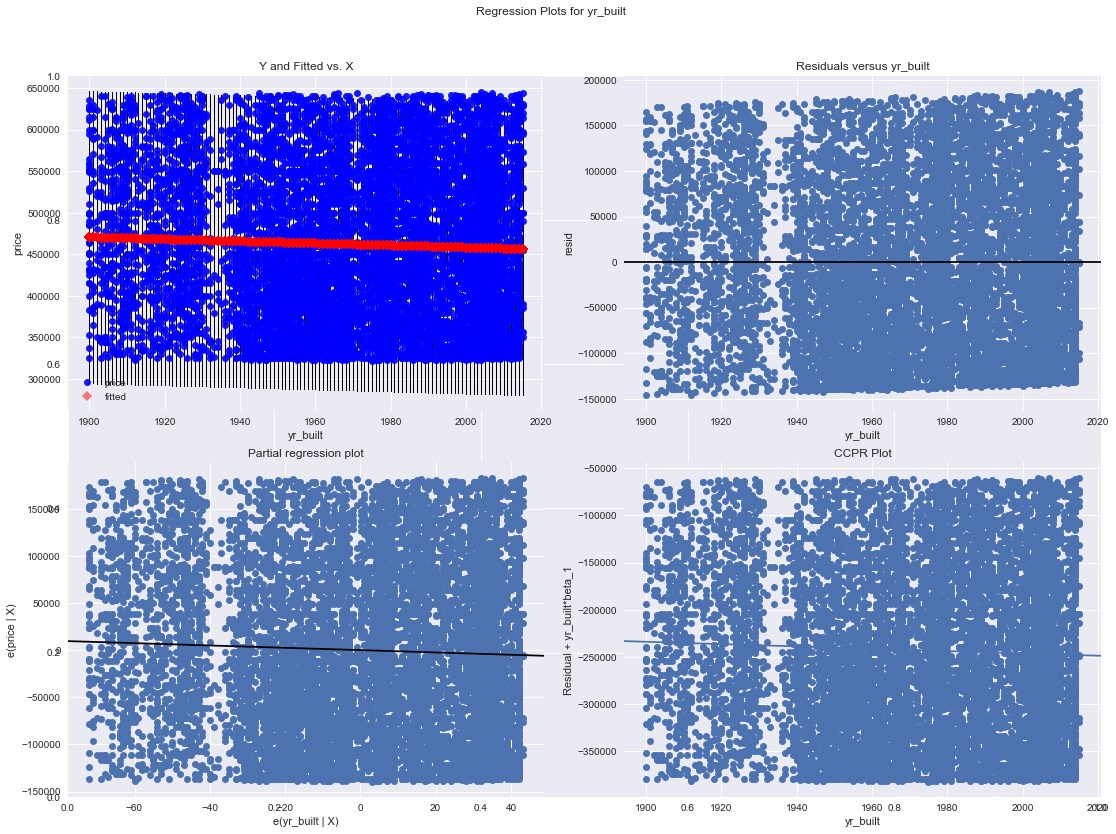

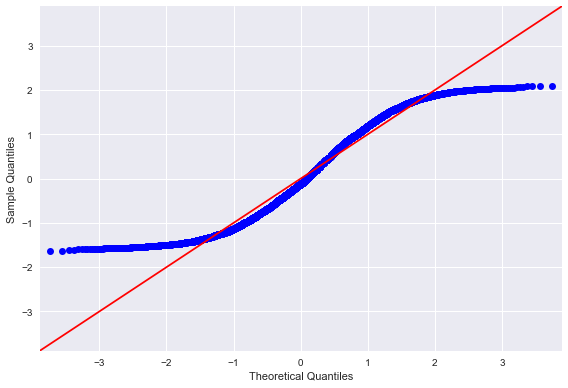

Regression Diagnostics for Price~yr_renovated


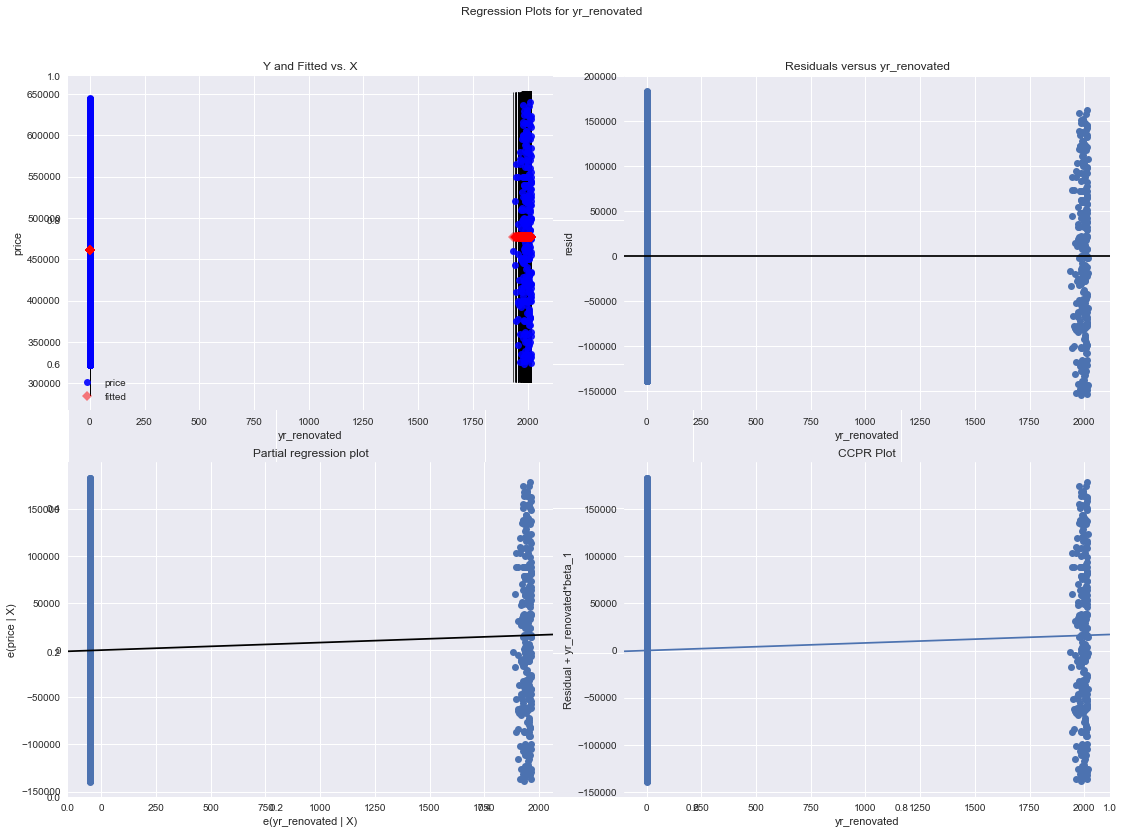

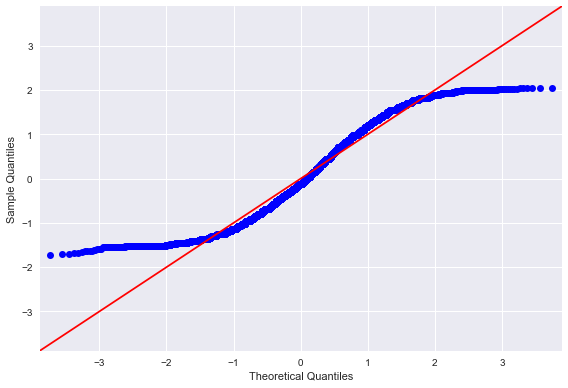

Regression Diagnostics for Price~zipcode


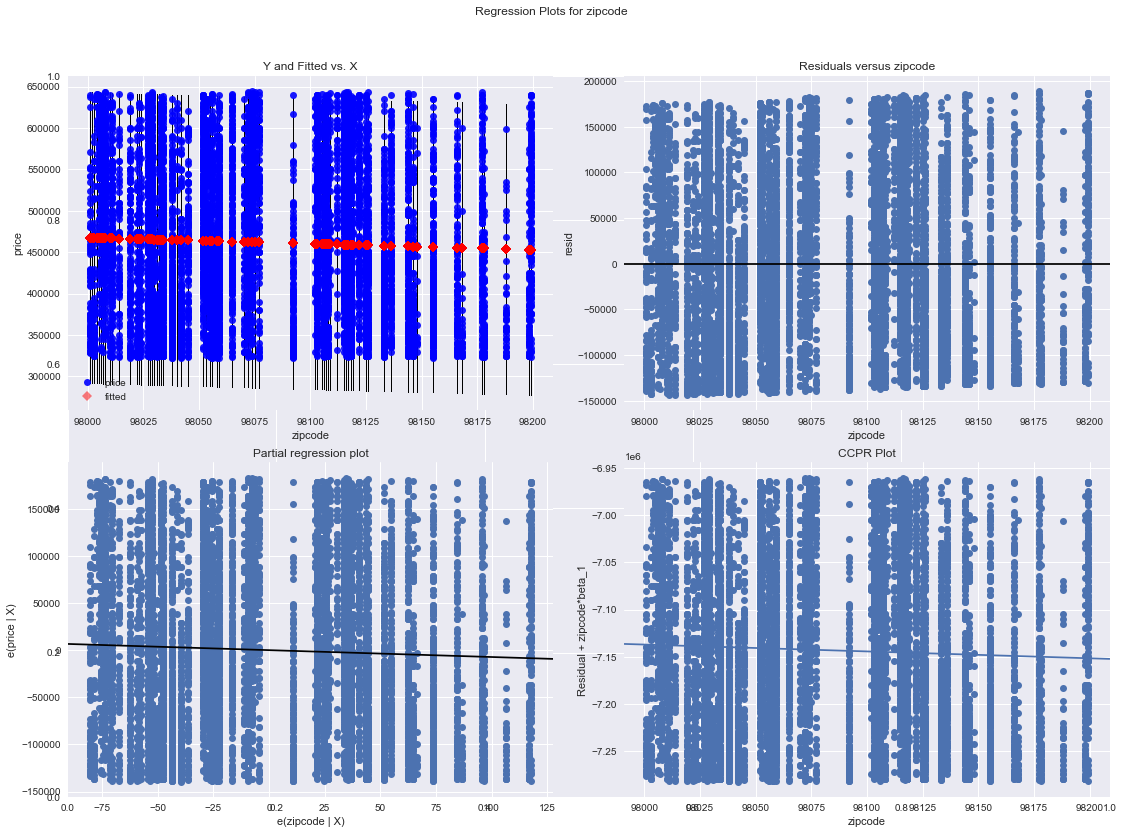

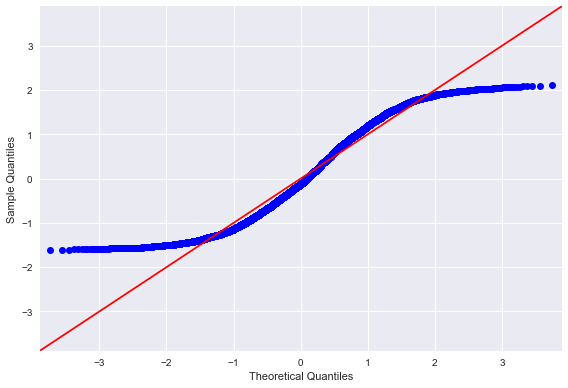

Regression Diagnostics for Price~lat


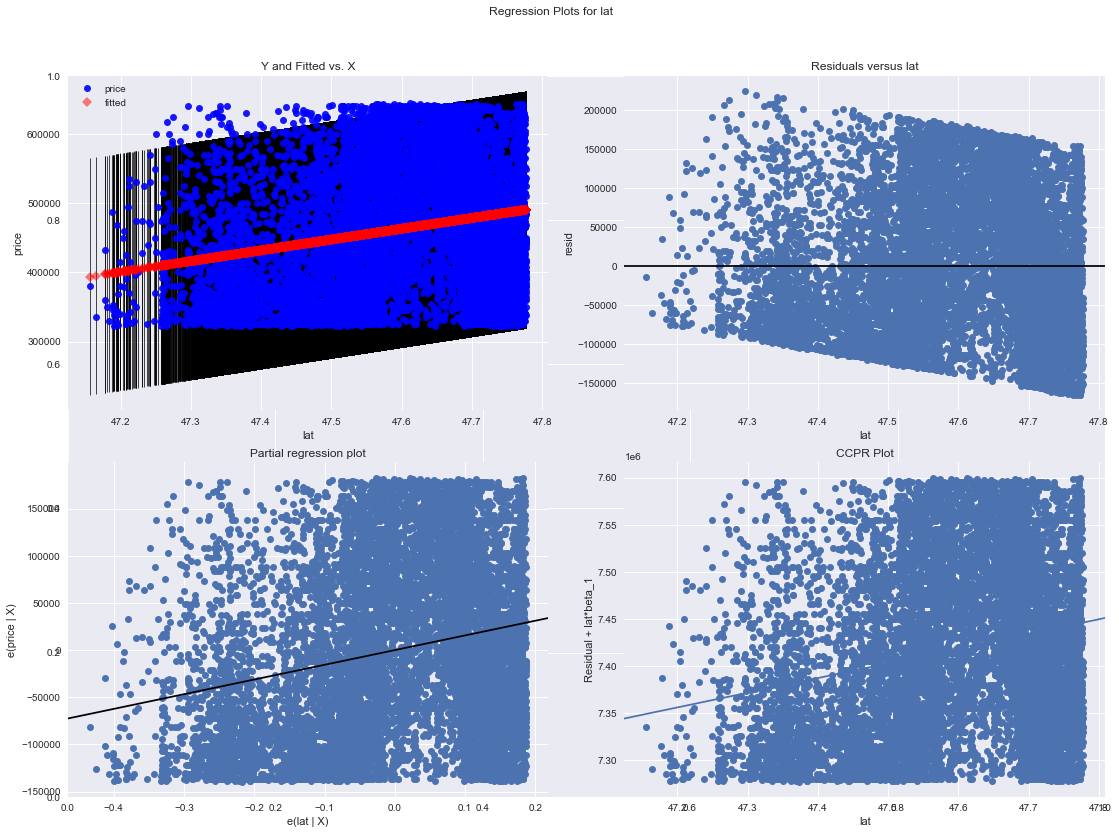

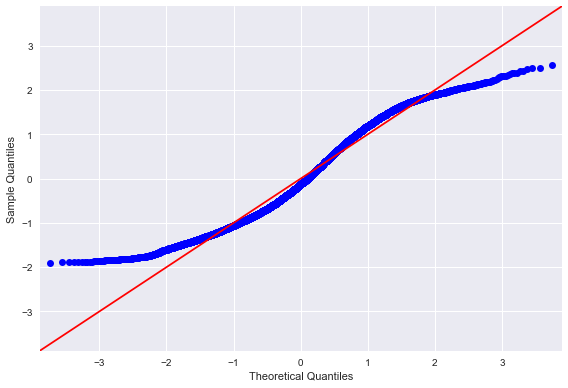

Regression Diagnostics for Price~long


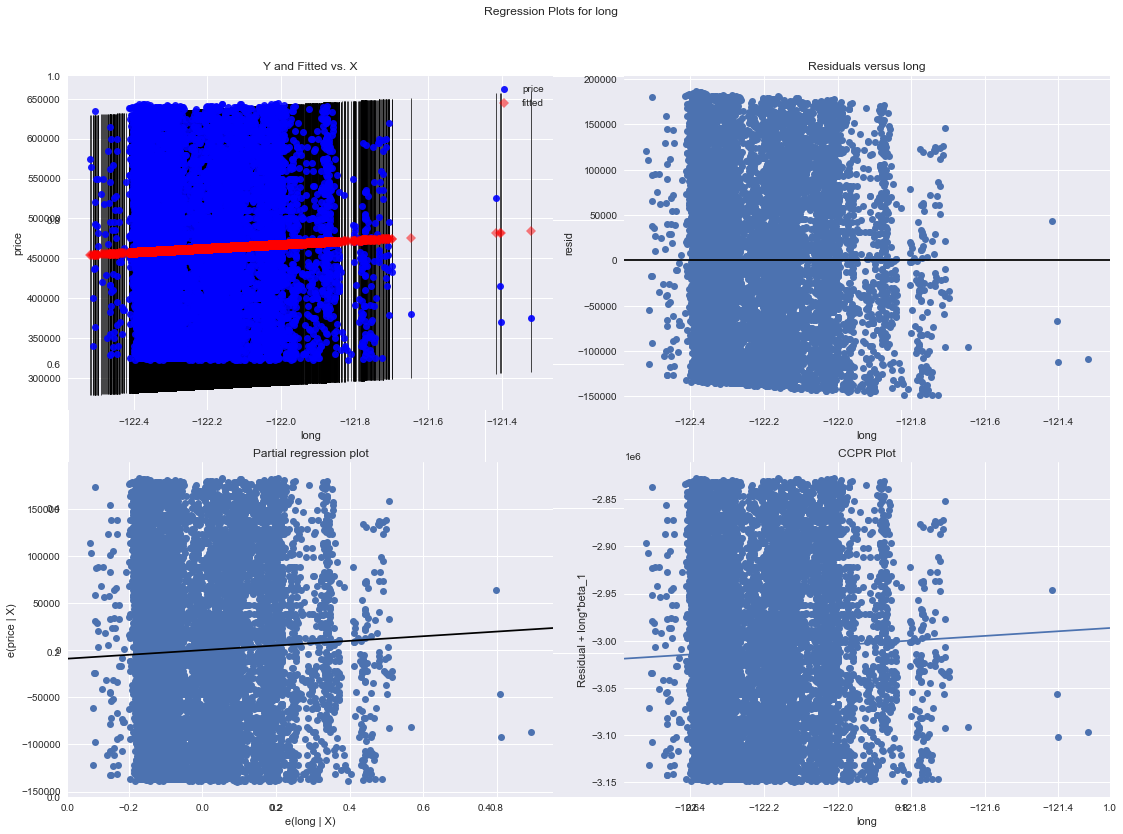

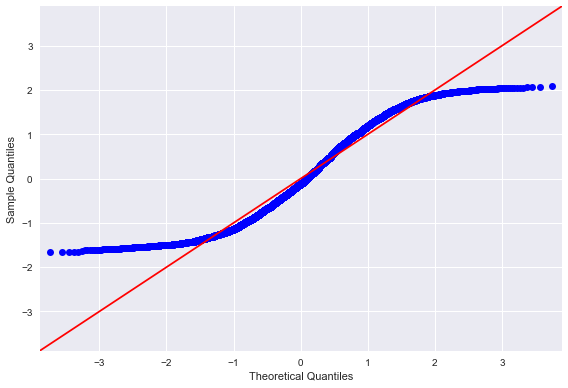

Regression Diagnostics for Price~sqft_living15


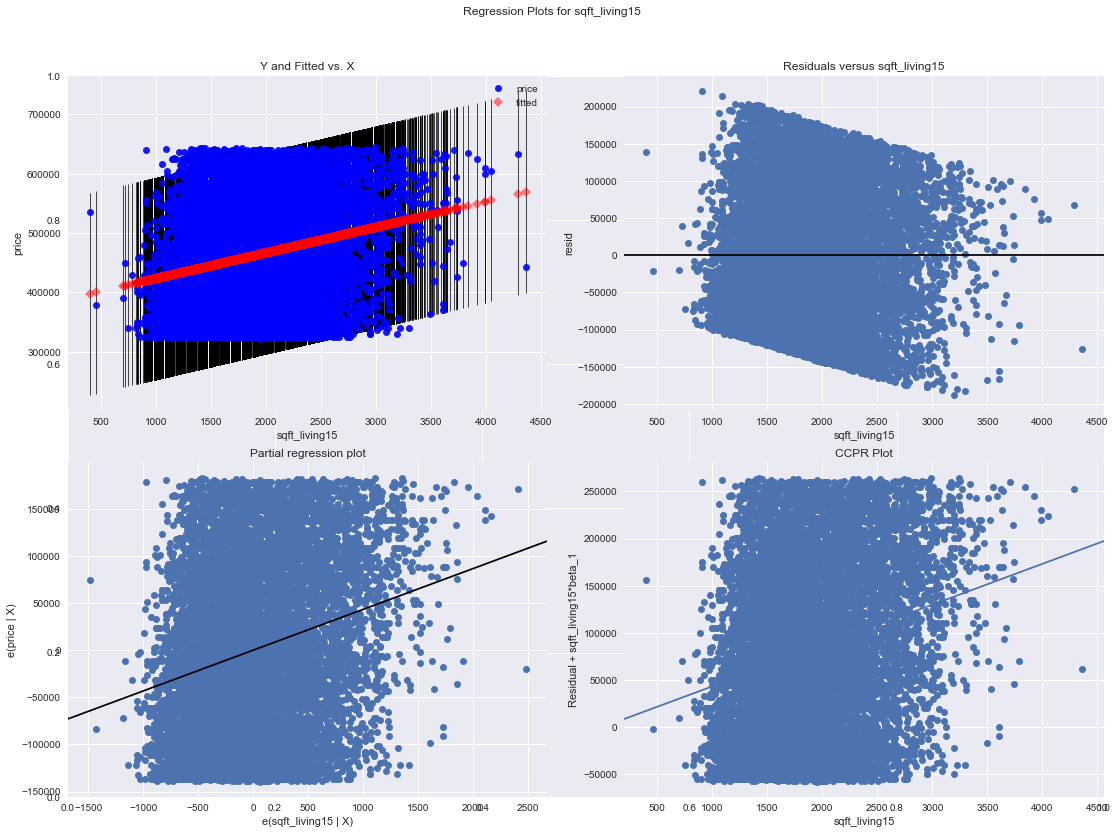

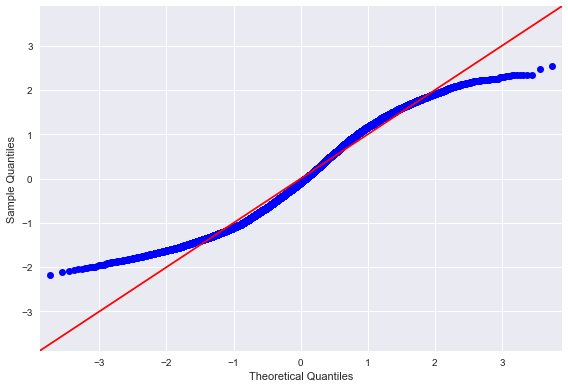

Regression Diagnostics for Price~sqft_lot15


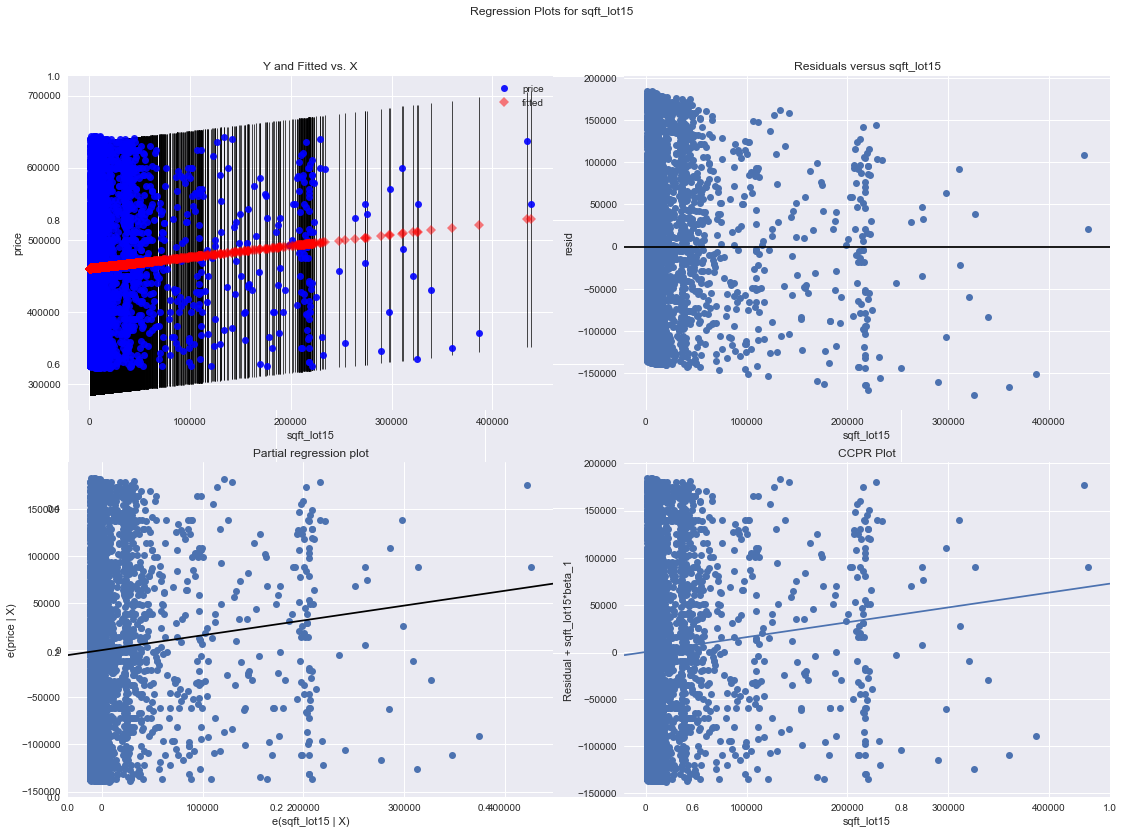

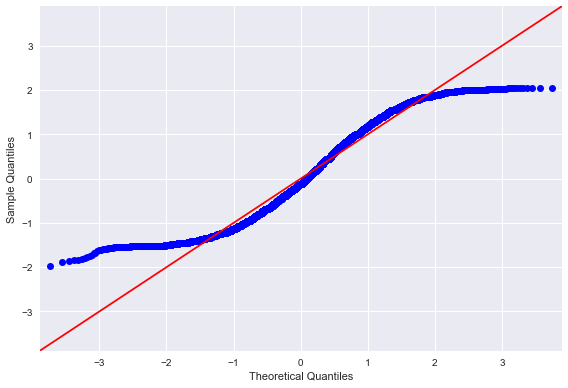

In [53]:
# check assumptions
for idx, column in enumerate(df_7_IQR.columns):
    print(f"Regression Diagnostics for Price~{column}")
    
    f = f'price~{column}'
    model = smf.ols(formula=f, data=df_7_IQR).fit()
    
    fig, axes = plt.subplots(figsize=(16,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()

In [54]:
# making subset for two highest correlating features - grade & sqft_living
df_7_IQR_sub = df_7_IQR[['price', 'grade', 'sqft_living']]
df_7_IQR_sub

price  grade  sqft_living
1      538000.0      4         2570
3      604000.0      4         1960
4      510000.0      5         1680
9      323000.0      4         1890
11     468000.0      4         1160
...         ...    ...          ...
21592  360000.0      5         1530
21593  400000.0      5         2310
21594  402101.0      4         1020
21595  400000.0      5         1600
21596  325000.0      4         1020

[10778 rows x 3 columns]

In [55]:
# dummies for grade
# dummy variables for grade
dummies = pd.get_dummies(df_7_IQR_sub['grade'], prefix='grade', drop_first=True)

df_7_IQR_sub = df_7_IQR_sub.drop(['grade'], axis=1)
df_7_IQR_sub = pd.concat([df_7_IQR_sub, dummies], axis=1)

df_7_IQR_sub

price  sqft_living  grade_2  grade_3  grade_4  grade_5  grade_6  \
1      538000.0         2570        0        0        1        0        0   
3      604000.0         1960        0        0        1        0        0   
4      510000.0         1680        0        0        0        1        0   
9      323000.0         1890        0        0        1        0        0   
11     468000.0         1160        0        0        1        0        0   
...         ...          ...      ...      ...      ...      ...      ...   
21592  360000.0         1530        0        0        0        1        0   
21593  400000.0         2310        0        0        0        1        0   
21594  402101.0         1020        0        0        1        0        0   
21595  400000.0         1600        0        0        0        1        0   
21596  325000.0         1020        0        0        1        0        0   

       grade_7  grade_8  
1            0        0  
3            0        0  
4            0        0  
9            0        0  
11           0        0  
...        ...      ...  
21592        0        0  
21593        0        0  
21594        0        0  
21595        0        0  
21596        0        0  

[10778 rows x 9 columns]

In [56]:
# create a model 
# establish X and y, then use lin_model to build the model.
X = df_7_IQR_sub.drop(['price'], axis=1)
y = df_7_IQR_sub['price']

lin_model(X,y)

0.10165982420173969

In [57]:
# going to incldue #bedrooms and bathrooms and re-evaluate
df_7_IQR_sub = df_7_IQR[['price', 'grade', 'sqft_living', 'bedrooms',
                          'bathrooms']]
df_7_IQR_sub

price  grade  sqft_living  bedrooms  bathrooms
1      538000.0      4         2570         3       2.25
3      604000.0      4         1960         4       3.00
4      510000.0      5         1680         3       2.00
9      323000.0      4         1890         3       2.50
11     468000.0      4         1160         2       1.00
...         ...    ...          ...       ...        ...
21592  360000.0      5         1530         3       2.50
21593  400000.0      5         2310         4       2.50
21594  402101.0      4         1020         2       0.75
21595  400000.0      5         1600         3       2.50
21596  325000.0      4         1020         2       0.75

[10778 rows x 5 columns]

In [58]:
# create dummies for beds, grade and baths
to_dum = ['bedrooms', 'grade', 'bathrooms']

for d in to_dum:
    dummy = pd.get_dummies(df_7_IQR_sub[d], prefix=d, drop_first=True)
    df_7_IQR_sub = df_7_IQR_sub.drop([d], axis=1)
    df_7_IQR_sub = pd.concat([df_7_IQR_sub, dummy], axis=1)

# handle bathrooms column for Python OLS handling
df_7_IQR_sub = df_7_IQR_sub.rename(columns={"bathrooms_2.0": "br_2_0", 
                                              "bathrooms_2.25": "br_2_25", 
                   "bathrooms_2.5": "br_2_5", "bathrooms_2.75": "br_2_75",
                  "bathrooms_3.0": "br_3_0", "bathrooms_3.25": "br_3_25",
                  "bathrooms_3.25": "br_3_25", "bathrooms_3.5": "br_3_5",
                  "bathrooms_3.75": "br_3_75", "bathrooms_4.0": "br_4_0",
                  "bathrooms_4.25": "br_4_25", "bathrooms_4.5": "br_4_5",
                  "bathrooms_4.75": "br_4_75", "bathrooms_5.0": "br_5_0",
                  "bathrooms_5.25": "br_5_25", "bathrooms_5.5": "br_5_5",
                  "bathrooms_5.75": "br_5_75", "bathrooms_6.0": "br_6_0",
                  "bathrooms_6.25": "br_6_25", "bathrooms_6.5": "br_6_5",
                  "bathrooms_6.75": "br_6_75", "bathrooms_7.75": "br_7_75",
                  "bathrooms_8.0": "br_8_0"})    

df_7_IQR_sub.head()

price  sqft_living  bedrooms_2  bedrooms_3  bedrooms_4  bedrooms_5  \
1   538000.0         2570           0           1           0           0   
3   604000.0         1960           0           0           1           0   
4   510000.0         1680           0           1           0           0   
9   323000.0         1890           0           1           0           0   
11  468000.0         1160           1           0           0           0   

    bedrooms_6  bedrooms_7  bedrooms_8  bedrooms_9  ...  br_3_25  br_3_5  \
1            0           0           0           0  ...        0       0   
3            0           0           0           0  ...        0       0   
4            0           0           0           0  ...        0       0   
9            0           0           0           0  ...        0       0   
11           0           0           0           0  ...        0       0   

    br_3_75  br_4_0  br_4_25  br_4_5  br_4_75  br_5_0  br_5_25  br_5_75  
1         0       0        0       0        0       0        0        0  
3         0       0        0       0        0       0        0        0  
4         0       0        0       0        0       0        0        0  
9         0       0        0       0        0       0        0        0  
11        0       0        0       0        0       0        0        0  

[5 rows x 37 columns]

In [59]:
X = df_7_IQR_sub.drop(['price'], axis=1)
y = df_7_IQR_sub['price']

lin_model(X,y)

0.11450791870948263

### Model 8

In [61]:
df_8 = df.copy()
df_8 = df_8[['price', 'zipcode', 'sqft_living', 'bedrooms', 'bathrooms', 
             'grade', 'condition', 'waterfront']]

# dummies
to_dum = ['zipcode', 'bedrooms', 'bathrooms', 
             'grade', 'condition', 'waterfront']

for d in to_dum:
    dummy = pd.get_dummies(df_8[d], prefix=d, drop_first=True)
    df_8 = df_8.drop([d], axis=1)
    df_8 = pd.concat([df_8, dummy], axis=1)
    
df_8

price  sqft_living  zipcode_98002  zipcode_98003  zipcode_98004  \
0      221900.0         1180              0              0              0   
1      538000.0         2570              0              0              0   
2      180000.0          770              0              0              0   
3      604000.0         1960              0              0              0   
4      510000.0         1680              0              0              0   
...         ...          ...            ...            ...            ...   
21592  360000.0         1530              0              0              0   
21593  400000.0         2310              0              0              0   
21594  402101.0         1020              0              0              0   
21595  400000.0         1600              0              0              0   
21596  325000.0         1020              0              0              0   

       zipcode_98005  zipcode_98006  zipcode_98007  zipcode_98008  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
21592              0              0              0              0   
21593              0              0              0              0   
21594              0              0              0              0   
21595              0              0              0              0   
21596              0              0              0              0   

       zipcode_98010  ...  grade_6  grade_7  grade_8  grade_9  grade_10  \
0                  0  ...        0        0        0        0         0   
1                  0  ...        0        0        0        0         0   
2                  0  ...        0        0        0        0         0   
3                  0  ...        0        0        0        0         0   
4                  0  ...        0        0        0        0         0   
...              ...  ...      ...      ...      ...      ...       ...   
21592              0  ...        0        0        0        0         0   
21593              0  ...        0        0        0        0         0   
21594              0  ...        0        0        0        0         0   
21595              0  ...        0        0        0        0         0   
21596              0  ...        0        0        0        0         0   

       condition_1  condition_2  condition_3  condition_4  waterfront_1  
0                0            1            0            0             0  
1                0            1            0            0             0  
2                0            1            0            0             0  
3                0            0            0            1             0  
4                0            1            0            0             0  
...            ...          ...          ...          ...           ...  
21592            0            1            0            0             0  
21593            0            1            0            0             0  
21594            0            1            0            0             0  
21595            0            1            0            0             0  
21596            0            1            0            0             0  

[21597 rows x 125 columns]

In [62]:
X = df_8.drop(['price'], axis=1)
y = df_8['price']

lin_model(X,y)

0.835078684518058

In [63]:
bath_cols = []
for c in df_8.columns:
    if c.startswith('bath') or c.startswith('br'):
        bath_cols.append(c)
        
bath_cols

['bathrooms_0.75',
 'bathrooms_1.0',
 'bathrooms_1.25',
 'bathrooms_1.5',
 'bathrooms_1.75',
 'bathrooms_2.0',
 'bathrooms_2.25',
 'bathrooms_2.5',
 'bathrooms_2.75',
 'bathrooms_3.0',
 'bathrooms_3.25',
 'bathrooms_3.5',
 'bathrooms_3.75',
 'bathrooms_4.0',
 'bathrooms_4.25',
 'bathrooms_4.5',
 'bathrooms_4.75',
 'bathrooms_5.0',
 'bathrooms_5.25',
 'bathrooms_5.5',
 'bathrooms_5.75',
 'bathrooms_6.0',
 'bathrooms_6.25',
 'bathrooms_6.5',
 'bathrooms_6.75',
 'bathrooms_7.5',
 'bathrooms_7.75',
 'bathrooms_8.0']

In [64]:
# pre-handling for statsmodel
df_8 = df_8.rename(columns={"bathrooms_0.75": "br_0_75",
                  "bathrooms_1.0": "br_1_0", "bathrooms_1.25": "br_1_25",
                  "bathrooms_1.5": "br_1_5", "bathrooms_1.75": "br_1_75",
                  "bathrooms_2.0": "br_2_0", "bathrooms_2.25": "br_2_25", 
                  "bathrooms_2.5": "br_2_5", "bathrooms_2.75": "br_2_75",
                  "bathrooms_3.0": "br_3_0", "bathrooms_3.25": "br_3_25",
                  "bathrooms_3.25": "br_3_25", "bathrooms_3.5": "br_3_5",
                  "bathrooms_3.75": "br_3_75", "bathrooms_4.0": "br_4_0",
                  "bathrooms_4.25": "br_4_25", "bathrooms_4.5": "br_4_5",
                  "bathrooms_4.75": "br_4_75", "bathrooms_5.0": "br_5_0",
                  "bathrooms_5.25": "br_5_25", "bathrooms_5.5": "br_5_5",
                  "bathrooms_5.75": "br_5_75", "bathrooms_6.0": "br_6_0",
                  "bathrooms_6.25": "br_6_25", "bathrooms_6.5": "br_6_5",
                  "bathrooms_6.75": "br_6_75", "bathrooms_7.5": "br_7_5",
                  "bathrooms_7.75": "br_7_75", "bathrooms_8.0": "br_8_0"}) 

#statsmodel
df_8_y = df_8[['price']]
df_8_X = df_8.drop(['price'], axis=1)

df_8_train, df_8_test = train_test_split(df_8, random_state=42)

df_8_x_cols = list(df_8.columns)
df_8_x_cols.remove('price')

outcome = 'price'
x_cols = df_8_x_cols
    
# Fit the linear regression model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_8_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     670.6
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:31:16   Log-Likelihood:            -2.1597e+05
No. Observations:               16197   AIC:                         4.322e+05
Df Residuals:                   16076   BIC:                         4.331e+05
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.629e+04   1.74e+05     -0.094      0.925   -3.57e+05    3.24e+05
sqft_living     157.4105      2.816     55.890      0.000     151.890     162.931
zipcode_98002  5444.1219   1.56e+04      0.349      0.727   -2.52e+04     3.6e+04
zipcode_98003  7381.8817   1.39e+04      0.530      0.596   -1.99e+04    3.47e+04
zipcode_98004   7.32e+05   1.37e+04     53.607      0.000    7.05e+05    7.59e+05
zipcode_98005  3.064e+05   1.64e+04     18.737      0.000    2.74e+05    3.38e+05
zipcode_98006   2.57e+05   1.24e+04     20.771      0.000    2.33e+05    2.81e+05
zipcode_98007  2.522e+05   1.75e+04     14.422      0.000    2.18e+05    2.86e+05
zipcode_98008  2.781e+05   1.38e+04     20.172      0.000    2.51e+05    3.05e+05
zipcode_98010  6.582e+04   1.91e+04      3.451      0.001    2.84e+04    1.03e+05
zipcode_98011  1.408e+05   1.55e+04      9.073      0.000     1.1e+05    1.71e+05
zipcode_98014  1.079e+05   1.75e+04      6.176      0.000    7.37e+04    1.42e+05
zipcode_98019  9.302e+04   1.57e+04      5.913      0.000    6.22e+04    1.24e+05
zipcode_98022   3.43e+04   1.48e+04      2.310      0.021    5201.419    6.34e+04
zipcode_98023 -2.916e+04    1.2e+04     -2.435      0.015   -5.26e+04   -5690.919
zipcode_98024  1.813e+05    2.1e+04      8.652      0.000     1.4e+05    2.22e+05
zipcode_98027  1.566e+05   1.25e+04     12.503      0.000    1.32e+05    1.81e+05
zipcode_98028  1.318e+05   1.38e+04      9.531      0.000    1.05e+05    1.59e+05
zipcode_98029  2.139e+05   1.34e+04     15.929      0.000    1.88e+05     2.4e+05
zipcode_98030  1.018e+04   1.45e+04      0.703      0.482   -1.82e+04    3.86e+04
zipcode_98031  1.322e+04   1.39e+04      0.954      0.340   -1.39e+04    4.04e+04
zipcode_98032 -9672.1087   1.85e+04     -0.523      0.601   -4.59e+04    2.66e+04
zipcode_98033  3.584e+05   1.26e+04     28.522      0.000    3.34e+05    3.83e+05
zipcode_98034   2.04e+05   1.18e+04     17.282      0.000    1.81e+05    2.27e+05
zipcode_98038  4.208e+04   1.17e+04      3.592      0.000    1.91e+04     6.5e+04
zipcode_98039  1.204e+06   2.61e+04     46.202      0.000    1.15e+06    1.26e+06
zipcode_98040  5.254e+05   1.41e+04     37.353      0.000    4.98e+05    5.53e+05
zipcode_98042  1.007e+04   1.19e+04      0.848      0.396   -1.32e+04    3.33e+04
zipcode_98045  1.072e+05   1.46e+04      7.359      0.000    7.86e+04    1.36e+05
zipcode_98052  2.397e+05   1.17e+04     20.463      0.000    2.17e+05    2.63e+05
zipcode_98053  2.148e+05   1.28e+04     16.725      0.000     1.9e+05     2.4e+05
zipcode_98055  4.855e+04   1.37e+04      3.538      0.000    2.17e+04    7.54e+04
zipcode_98056  9.084e+04   1.26e+04      7.197      0.000    6.61e+04    1.16e+05
zipcode_98058  3.318e+04   1.24e+04      2.686      0.007    8969.486    5.74e+04
zipcode_98059  8.608e+04   1.23e+04      7.016   

In [65]:
# evaluate MAE
X = df_8[df_8_x_cols]

# generate predictions
ypred = model.predict(X)

# calc MAE
mae = meanabs
mae = mae(df_8['price'], ypred)
mae

91747.36669689683

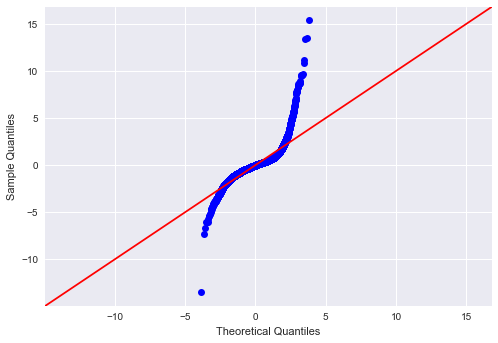

In [66]:
# check assumptions
df8_residuals = model.resid
mod_res = sm.graphics.qqplot(df8_residuals, dist=stats.norm, line='45', 
                             fit=True)

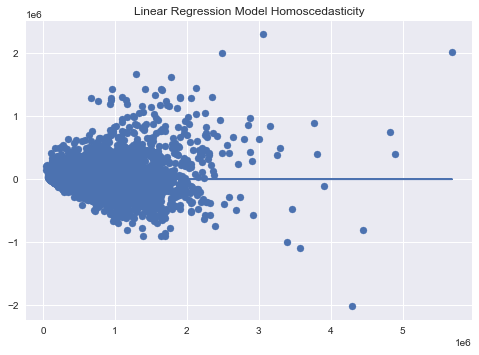

In [67]:
# check for homoscedasticity
plt.scatter(model.predict(df_8_train[x_cols]), model.resid)
plt.plot(model.predict(df_8_train[x_cols]), [0 for i in range(len(df_8_train))])

plt.title('Linear Regression Model Homoscedasticity');

This model does not pass assumptions of homoscedasticity or normality.

In [68]:
# try log-transformation on price, sqft_living
log_t = ['price', 'sqft_living']
df_8_2 = df_8.copy()
for l in log_t:
    l_log = np.log(df_8_2[l])
    df_8_2 = df_8_2.drop([l], axis=1)
    df_8_2[l] = l_log
    
df_8_2.describe()

zipcode_98002  zipcode_98003  zipcode_98004  zipcode_98005  \
count   21597.000000   21597.000000   21597.000000   21597.000000   
mean        0.009214       0.012965       0.014678       0.007779   
std         0.095550       0.113125       0.120263       0.087856   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98006  zipcode_98007  zipcode_98008  zipcode_98010  \
count   21597.000000   21597.000000   21597.000000    21597.00000   
mean        0.023059       0.006529       0.013104        0.00463   
std         0.150094       0.080538       0.113721        0.06789   
min         0.000000       0.000000       0.000000        0.00000   
25%         0.000000       0.000000       0.000000        0.00000   
50%         0.000000       0.000000       0.000000        0.00000   
75%         0.000000       0.000000       0.000000        0.00000   
max         1.000000       1.000000       1.000000        1.00000   

       zipcode_98011  zipcode_98014  ...       grade_8       grade_9  \
count   21597.000000   21597.000000  ...  21597.000000  21597.000000   
mean        0.009029       0.005742  ...      0.018475      0.004121   
std         0.094593       0.075557  ...      0.134664      0.064064   
min         0.000000       0.000000  ...      0.000000      0.000000   
25%         0.000000       0.000000  ...      0.000000      0.000000   
50%         0.000000       0.000000  ...      0.000000      0.000000   
75%         0.000000       0.000000  ...      0.000000      0.000000   
max         1.000000       1.000000  ...      1.000000      1.000000   

           grade_10   condition_1   condition_2   condition_3   condition_4  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       0.000602      0.007871      0.649164      0.262861      0.078761   
std        0.024528      0.088373      0.477243      0.440198      0.269372   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      1.000000      0.000000      0.000000   
75%        0.000000      0.000000      1.000000      1.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       waterfront_1         price   sqft_living  
count  21597.000000  21597.000000  21597.000000  
mean       0.006760     13.048211      7.550720  
std        0.081944      0.526555      0.424191  
min        0.000000     11.264464      5.913503  
25%        0.000000     12.682307      7.265430  
50%        0.000000     13.017003      7.554859  
75%        0.000000     13.377006      7.843849  
max        1.000000     15.856731      9.513404  

[8 rows x 125 columns]

In [69]:
# try modeling again
#statsmodel
df_8_y = df_8_2[['price']]
df_8_X = df_8_2.drop(['price'], axis=1)

df_8_train, df_8_test = train_test_split(df_8_2, random_state=42)

df_8_x_cols = list(df_8_2.columns)
df_8_x_cols.remove('price')

outcome = 'price'
x_cols = df_8_x_cols
    
# Fit the linear regression model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_8_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     862.2
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:31:37   Log-Likelihood:                 3628.7
No. Observations:               16197   AIC:                            -7015.
Df Residuals:                   16076   BIC:                            -6085.
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.4013      0.230     36.483      0.000       7.950       8.853
zipcode_98002    -0.0393      0.020     -1.946      0.052      -0.079       0.000
zipcode_98003     0.0337      0.018      1.868      0.062      -0.002       0.069
zipcode_98004     1.1078      0.018     62.710      0.000       1.073       1.142
zipcode_98005     0.7380      0.021     34.888      0.000       0.697       0.780
zipcode_98006     0.6519      0.016     40.720      0.000       0.621       0.683
zipcode_98007     0.6429      0.023     28.415      0.000       0.599       0.687
zipcode_98008     0.6597      0.018     36.977      0.000       0.625       0.695
zipcode_98010     0.2711      0.025     10.986      0.000       0.223       0.319
zipcode_98011     0.4502      0.020     22.425      0.000       0.411       0.490
zipcode_98014     0.3455      0.023     15.282      0.000       0.301       0.390
zipcode_98019     0.3335      0.020     16.385      0.000       0.294       0.373
zipcode_98022     0.1152      0.019      5.999      0.000       0.078       0.153
zipcode_98023    -0.0344      0.015     -2.217      0.027      -0.065      -0.004
zipcode_98024     0.5171      0.027     19.075      0.000       0.464       0.570
zipcode_98027     0.5018      0.016     30.970      0.000       0.470       0.534
zipcode_98028     0.4108      0.018     22.963      0.000       0.376       0.446
zipcode_98029     0.5727      0.017     32.966      0.000       0.539       0.607
zipcode_98030     0.0501      0.019      2.676      0.007       0.013       0.087
zipcode_98031     0.0676      0.018      3.768      0.000       0.032       0.103
zipcode_98032    -0.0385      0.024     -1.609      0.108      -0.085       0.008
zipcode_98033     0.7796      0.016     47.952      0.000       0.748       0.811
zipcode_98034     0.5361      0.015     35.102      0.000       0.506       0.566
zipcode_98038     0.1742      0.015     11.491      0.000       0.144       0.204
zipcode_98039     1.2835      0.034     38.074      0.000       1.217       1.350
zipcode_98040     0.9030      0.018     49.620      0.000       0.867       0.939
zipcode_98042     0.0726      0.015      4.730      0.000       0.043       0.103
zipcode_98045     0.3510      0.019     18.627      0.000       0.314       0.388
zipcode_98052     0.6249      0.015     41.239      0.000       0.595       0.655
zipcode_98053     0.6050      0.017     36.427      0.000       0.572       0.638
zipcode_98055     0.1412      0.018      7.954      0.000       0.106       0.176
zipcode_98056     0.3098      0.016     18.970      0.000       0.278       0.342
zipcode_98058     0.1518      0.016      9.499      0.000       0.120       0.183
zipcode_98059     0.3465      0.016     21.826      0.000       0.315       0.378
zipcode_98065     0.4250      0.018     24.166   

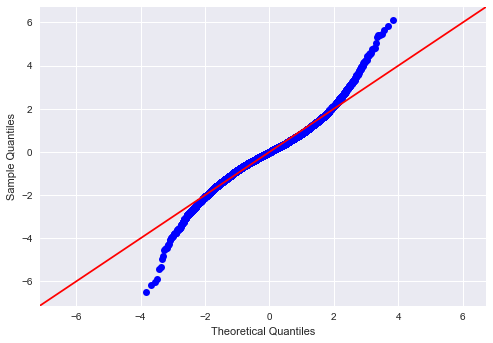

In [70]:
# check assumptions
df8_residuals = model.resid
mod_res = sm.graphics.qqplot(df8_residuals, dist=stats.norm, line='45', 
                             fit=True)

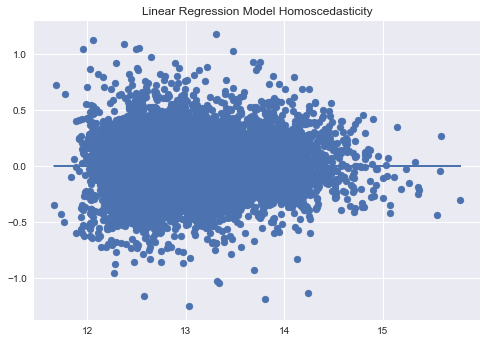

In [71]:
# check for homoscedasticity
plt.scatter(model.predict(df_8_train[x_cols]), model.resid)
plt.plot(model.predict(df_8_train[x_cols]), [0 for i in range(len(df_8_train))])

plt.title('Linear Regression Model Homoscedasticity');

In [78]:
X = df_8_X
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(list(df_8_X.columns), vif))

[('zipcode_98002', 1.5633577129607532),
 ('zipcode_98003', 1.7791359541864018),
 ('zipcode_98004', 1.9262185141520392),
 ('zipcode_98005', 1.4890138314263501),
 ('zipcode_98006', 2.461478777479364),
 ('zipcode_98007', 1.4031791619236553),
 ('zipcode_98008', 1.800987690242367),
 ('zipcode_98010', 1.2810299302662338),
 ('zipcode_98011', 1.5457840221825223),
 ('zipcode_98014', 1.3553247320391155),
 ('zipcode_98019', 1.5326475317025288),
 ('zipcode_98022', 1.650185417467787),
 ('zipcode_98023', 2.3932727811552135),
 ('zipcode_98024', 1.2286369839482012),
 ('zipcode_98027', 2.171789168036798),
 ('zipcode_98028', 1.78857537356955),
 ('zipcode_98029', 1.9215337438655802),
 ('zipcode_98030', 1.7094822299173122),
 ('zipcode_98031', 1.7592157332443048),
 ('zipcode_98032', 1.3529400238997733),
 ('zipcode_98033', 2.216880598700223),
 ('zipcode_98034', 2.517132786668391),
 ('zipcode_98038', 2.6456592620617134),
 ('zipcode_98039', 1.193136618760912),
 ('zipcode_98040', 1.8524614913880788),
 ('zipcod

### Model 9

In [79]:
# add sqft_lot and view
df_9 = df.copy()
df_9 = df_9[['price', 'zipcode', 'sqft_living', 'bedrooms', 'bathrooms', 
             'grade', 'condition', 'waterfront', 'sqft_lot', 'view']]

df_9

price  zipcode  sqft_living  bedrooms  bathrooms  grade  condition  \
0      221900.0    98178         1180         3       1.00      4          2   
1      538000.0    98125         2570         3       2.25      4          2   
2      180000.0    98028          770         2       1.00      3          2   
3      604000.0    98136         1960         4       3.00      4          4   
4      510000.0    98074         1680         3       2.00      5          2   
...         ...      ...          ...       ...        ...    ...        ...   
21592  360000.0    98103         1530         3       2.50      5          2   
21593  400000.0    98146         2310         4       2.50      5          2   
21594  402101.0    98144         1020         2       0.75      4          2   
21595  400000.0    98027         1600         3       2.50      5          2   
21596  325000.0    98144         1020         2       0.75      4          2   

       waterfront  sqft_lot  view  
0               0      5650     0  
1               0      7242     0  
2               0     10000     0  
3               0      5000     0  
4               0      8080     0  
...           ...       ...   ...  
21592           0      1131     0  
21593           0      5813     0  
21594           0      1350     0  
21595           0      2388     0  
21596           0      1076     0  

[21597 rows x 10 columns]

In [80]:
# log transform of applicable variables
log_t = ['price', 'sqft_living', 'sqft_lot']

for l in log_t:
    l_log = np.log(df_9[l])
    df_9 = df_9.drop([l], axis=1)
    df_9[l] = l_log
    
# dummies
to_dum = ['zipcode', 'bedrooms', 'bathrooms', 
             'grade', 'condition', 'waterfront', 'view']

for d in to_dum:
    dummy = pd.get_dummies(df_9[d], prefix=d, drop_first=True)
    df_9 = df_9.drop([d], axis=1)
    df_9 = pd.concat([df_9, dummy], axis=1)
    
df_9.describe()

price   sqft_living      sqft_lot  zipcode_98002  zipcode_98003  \
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000   
mean      13.048211      7.550720      8.989805       0.009214       0.012965   
std        0.526555      0.424191      0.902078       0.095550       0.113125   
min       11.264464      5.913503      6.253829       0.000000       0.000000   
25%       12.682307      7.265430      8.525161       0.000000       0.000000   
50%       13.017003      7.554859      8.938269       0.000000       0.000000   
75%       13.377006      7.843849      9.276596       0.000000       0.000000   
max       15.856731      9.513404     14.317109       1.000000       1.000000   

       zipcode_98004  zipcode_98005  zipcode_98006  zipcode_98007  \
count   21597.000000   21597.000000   21597.000000   21597.000000   
mean        0.014678       0.007779       0.023059       0.006529   
std         0.120263       0.087856       0.150094       0.080538   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98008  ...      grade_10   condition_1   condition_2  \
count   21597.000000  ...  21597.000000  21597.000000  21597.000000   
mean        0.013104  ...      0.000602      0.007871      0.649164   
std         0.113721  ...      0.024528      0.088373      0.477243   
min         0.000000  ...      0.000000      0.000000      0.000000   
25%         0.000000  ...      0.000000      0.000000      0.000000   
50%         0.000000  ...      0.000000      0.000000      1.000000   
75%         0.000000  ...      0.000000      0.000000      1.000000   
max         1.000000  ...      1.000000      1.000000      1.000000   

        condition_3   condition_4  waterfront_1        view_1        view_2  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       0.262861      0.078761      0.006760      0.015280      0.044312   
std        0.440198      0.269372      0.081944      0.122667      0.205792   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             view_3        view_4  
count  21597.000000  21597.000000  
mean       0.023522      0.014678  
std        0.151557      0.120263  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 130 columns]

In [81]:
# pre-handling for statsmodel
df_9 = df_9.rename(columns={"bathrooms_0.75": "br_0_75",
                  "bathrooms_1.0": "br_1_0", "bathrooms_1.25": "br_1_25",
                  "bathrooms_1.5": "br_1_5", "bathrooms_1.75": "br_1_75",
                  "bathrooms_2.0": "br_2_0", "bathrooms_2.25": "br_2_25", 
                  "bathrooms_2.5": "br_2_5", "bathrooms_2.75": "br_2_75",
                  "bathrooms_3.0": "br_3_0", "bathrooms_3.25": "br_3_25",
                  "bathrooms_3.25": "br_3_25", "bathrooms_3.5": "br_3_5",
                  "bathrooms_3.75": "br_3_75", "bathrooms_4.0": "br_4_0",
                  "bathrooms_4.25": "br_4_25", "bathrooms_4.5": "br_4_5",
                  "bathrooms_4.75": "br_4_75", "bathrooms_5.0": "br_5_0",
                  "bathrooms_5.25": "br_5_25", "bathrooms_5.5": "br_5_5",
                  "bathrooms_5.75": "br_5_75", "bathrooms_6.0": "br_6_0",
                  "bathrooms_6.25": "br_6_25", "bathrooms_6.5": "br_6_5",
                  "bathrooms_6.75": "br_6_75", "bathrooms_7.5": "br_7_5",
                  "bathrooms_7.75": "br_7_75", "bathrooms_8.0": "br_8_0"}) 

In [82]:
#statsmodel
df_9_y = df_9[['price']]
df_9_X = df_9.drop(['price'], axis=1)

df_9_train, df_9_test = train_test_split(df_9, random_state=42)

df_9_x_cols = list(df_9.columns)
df_9_x_cols.remove('price')

outcome = 'price'
x_cols = df_9_x_cols
    
# Fit the linear regression model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_9_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     940.8
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:38:47   Log-Likelihood:                 4536.1
No. Observations:               16197   AIC:                            -8820.
Df Residuals:                   16071   BIC:                            -7851.
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.4631      0.218     38.822      0.000       8.036       8.890
sqft_living       0.4409      0.008     57.468      0.000       0.426       0.456
sqft_lot          0.0667      0.002     29.463      0.000       0.062       0.071
zipcode_98002    -0.0051      0.019     -0.265      0.791      -0.043       0.032
zipcode_98003     0.0368      0.017      2.161      0.031       0.003       0.070
zipcode_98004     1.1290      0.017     67.477      0.000       1.096       1.162
zipcode_98005     0.7483      0.020     37.390      0.000       0.709       0.788
zipcode_98006     0.6583      0.015     43.434      0.000       0.629       0.688
zipcode_98007     0.6756      0.021     31.556      0.000       0.634       0.718
zipcode_98008     0.6650      0.017     39.357      0.000       0.632       0.698
zipcode_98010     0.2283      0.023      9.758      0.000       0.182       0.274
zipcode_98011     0.4747      0.019     24.988      0.000       0.437       0.512
zipcode_98014     0.2754      0.022     12.798      0.000       0.233       0.318
zipcode_98019     0.3177      0.019     16.490      0.000       0.280       0.356
zipcode_98022     0.0509      0.018      2.791      0.005       0.015       0.087
zipcode_98023    -0.0171      0.015     -1.163      0.245      -0.046       0.012
zipcode_98024     0.4241      0.026     16.413      0.000       0.373       0.475
zipcode_98027     0.5137      0.015     33.510      0.000       0.484       0.544
zipcode_98028     0.4168      0.017     24.628      0.000       0.384       0.450
zipcode_98029     0.6245      0.016     37.881      0.000       0.592       0.657
zipcode_98030     0.0682      0.018      3.850      0.000       0.033       0.103
zipcode_98031     0.0822      0.017      4.844      0.000       0.049       0.115
zipcode_98032    -0.0203      0.023     -0.897      0.370      -0.065       0.024
zipcode_98033     0.8030      0.015     52.141      0.000       0.773       0.833
zipcode_98034     0.5495      0.014     38.015      0.000       0.521       0.578
zipcode_98038     0.1830      0.014     12.763      0.000       0.155       0.211
zipcode_98039     1.3156      0.032     41.249      0.000       1.253       1.378
zipcode_98040     0.9106      0.017     52.788      0.000       0.877       0.944
zipcode_98042     0.0785      0.015      5.406      0.000       0.050       0.107
zipcode_98045     0.3044      0.018     17.021      0.000       0.269       0.340
zipcode_98052     0.6554      0.014     45.673      0.000       0.627       0.683
zipcode_98053     0.6044      0.016     38.428      0.000       0.574       0.635
zipcode_98055     0.1604      0.017      9.546      0.000       0.127       0.193
zipcode_98056     0.3346      0.015     21.620      0.000       0.304       0.365
zipcode_98058     0.1655      0.015     10.947   

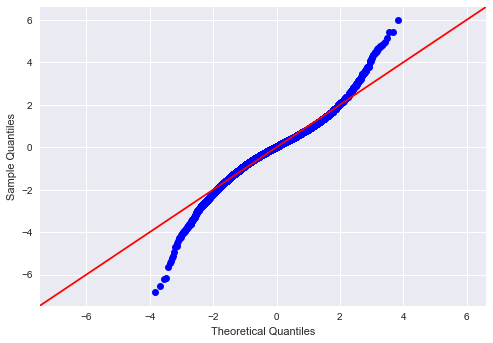

In [83]:
# check assumptions
df9_residuals = model.resid
mod_res = sm.graphics.qqplot(df9_residuals, dist=stats.norm, line='45', 
                             fit=True)

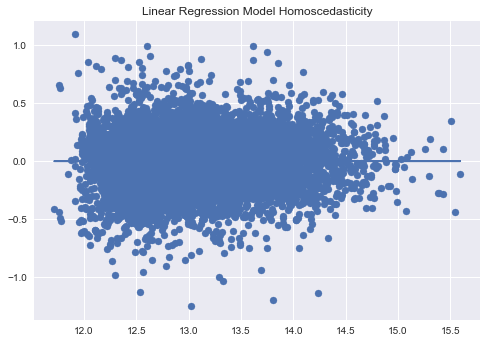

In [84]:
# check for homoscedasticity
plt.scatter(model.predict(df_9_train[x_cols]), model.resid)
plt.plot(model.predict(df_9_train[x_cols]), [0 for i in range(len(df_9_train))])

plt.title('Linear Regression Model Homoscedasticity');

* Having issues with large p-values in bedrooms, bathrooms, grade, and zipcode. Is there a better way to treat these variables in the pre-processing steps?

### Model 10

In [85]:
# focus on pre-processing of bedrooms, bathrooms, grade, and zipcode
df_10 = df.copy()
df_10 = df_10[['price', 'zipcode', 'sqft_living', 'bedrooms', 'bathrooms', 
             'grade', 'condition', 'waterfront', 'sqft_lot', 'view']]

df_10

price  zipcode  sqft_living  bedrooms  bathrooms  grade  condition  \
0      221900.0    98178         1180         3       1.00      4          2   
1      538000.0    98125         2570         3       2.25      4          2   
2      180000.0    98028          770         2       1.00      3          2   
3      604000.0    98136         1960         4       3.00      4          4   
4      510000.0    98074         1680         3       2.00      5          2   
...         ...      ...          ...       ...        ...    ...        ...   
21592  360000.0    98103         1530         3       2.50      5          2   
21593  400000.0    98146         2310         4       2.50      5          2   
21594  402101.0    98144         1020         2       0.75      4          2   
21595  400000.0    98027         1600         3       2.50      5          2   
21596  325000.0    98144         1020         2       0.75      4          2   

       waterfront  sqft_lot  view  
0               0      5650     0  
1               0      7242     0  
2               0     10000     0  
3               0      5000     0  
4               0      8080     0  
...           ...       ...   ...  
21592           0      1131     0  
21593           0      5813     0  
21594           0      1350     0  
21595           0      2388     0  
21596           0      1076     0  

[21597 rows x 10 columns]

In [86]:
df_10['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [87]:
# remove the outlier of 33 bedrooms
df_10 = df_10[df_10['bedrooms'] < 32]

In [88]:
# fix problem of .5, .75 bathrooms and so on...
df_10['bathrm'] = df_10.bathrooms*4
df_10.bathrm = df_10.bathrm.astype('int32')
df_10 = df_10.drop('bathrooms', axis=1)
df_10

<ipython-input-88-e466e318a3a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10['bathrm'] = df_10.bathrooms*4
C:\Users\samue\anaconda_3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


price  zipcode  sqft_living  bedrooms  grade  condition  waterfront  \
0      221900.0    98178         1180         3      4          2           0   
1      538000.0    98125         2570         3      4          2           0   
2      180000.0    98028          770         2      3          2           0   
3      604000.0    98136         1960         4      4          4           0   
4      510000.0    98074         1680         3      5          2           0   
...         ...      ...          ...       ...    ...        ...         ...   
21592  360000.0    98103         1530         3      5          2           0   
21593  400000.0    98146         2310         4      5          2           0   
21594  402101.0    98144         1020         2      4          2           0   
21595  400000.0    98027         1600         3      5          2           0   
21596  325000.0    98144         1020         2      4          2           0   

       sqft_lot  view  bathrm  
0          5650     0       4  
1          7242     0       9  
2         10000     0       4  
3          5000     0      12  
4          8080     0       8  
...         ...   ...     ...  
21592      1131     0      10  
21593      5813     0      10  
21594      1350     0       3  
21595      2388     0      10  
21596      1076     0       3  

[21596 rows x 10 columns]

I think some of these variables that I have been treating as categorical can actuallly be treated as numerical such as bedrooms and bathrooms. These two can be treated as quantitative because they can take on any number.

In [89]:
# log transform of applicable variables
log_t = ['price', 'sqft_living', 'sqft_lot']

for l in log_t:
    l_log = np.log(df_10[l])
    df_10 = df_10.drop([l], axis=1)
    df_10[l] = l_log
    
# dummies
to_dum = ['zipcode', 'grade', 'condition', 'waterfront', 'view']  # grade and condition satisfy reqs for label encoding

for d in to_dum:
    dummy = pd.get_dummies(df_10[d], prefix=d, drop_first=True)
    df_10 = df_10.drop([d], axis=1)
    df_10 = pd.concat([df_10, dummy], axis=1)
    
df_10.describe()

bedrooms        bathrm         price   sqft_living      sqft_lot  \
count  21596.000000  21596.000000  21596.000000  21596.000000  21596.000000   
mean       3.371828      8.463373     13.048196      7.550728      8.989818   
std        0.904114      3.075992      0.526562      0.424199      0.902097   
min        1.000000      2.000000     11.264464      5.913503      6.253829   
25%        3.000000      7.000000     12.682307      7.265430      8.525161   
50%        3.000000      9.000000     13.017003      7.554859      8.938400   
75%        4.000000     10.000000     13.377006      7.843849      9.276643   
max       11.000000     32.000000     15.856731      9.513404     14.317109   

       zipcode_98002  zipcode_98003  zipcode_98004  zipcode_98005  \
count   21596.000000   21596.000000   21596.000000   21596.000000   
mean        0.009215       0.012965       0.014679       0.007779   
std         0.095552       0.113128       0.120266       0.087858   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       zipcode_98006  ...      grade_10   condition_1   condition_2  \
count   21596.000000  ...  21596.000000  21596.000000  21596.000000   
mean        0.023060  ...      0.000602      0.007872      0.649194   
std         0.150097  ...      0.024528      0.088375      0.477233   
min         0.000000  ...      0.000000      0.000000      0.000000   
25%         0.000000  ...      0.000000      0.000000      0.000000   
50%         0.000000  ...      0.000000      0.000000      1.000000   
75%         0.000000  ...      0.000000      0.000000      1.000000   
max         1.000000  ...      1.000000      1.000000      1.000000   

        condition_3   condition_4  waterfront_1        view_1        view_2  \
count  21596.000000  21596.000000  21596.000000  21596.000000  21596.000000   
mean       0.262873      0.078718      0.006761      0.015281      0.044314   
std        0.440204      0.269305      0.081946      0.122670      0.205796   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             view_3        view_4  
count  21596.000000  21596.000000  
mean       0.023523      0.014679  
std        0.151561      0.120266  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 93 columns]

In [90]:
#statsmodel
df_10_y = df_10[['price']]
df_10_x = df_10.drop(['price'], axis=1)

# do train test split for x and y values
df_10_train_x, df_10_test_x, df_10_train_y, df_10_test_y = train_test_split(df_10_x, df_10_y, random_state=42)

df_10_x_cols = list(df_10.columns)
df_10_x_cols.remove('price')

outcome = 'price'
x_cols = df_10_x_cols

X = sm.add_constant(df_10_train_x)
    
# Fit the linear regression model
# predictors = '+'.join(x_cols)
# formula = outcome + '~' + predictors
# model = ols(formula=formula, data=df_10_train_x).fit()
model = sm.OLS(df_10_train_y, X)
res = model.fit()
print(str(res.summary()))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1275.
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:39:11   Log-Likelihood:                 4518.4
No. Observations:               16197   AIC:                            -8851.
Df Residuals:                   16104   BIC:                            -8135.
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.6425      0.195     44.418

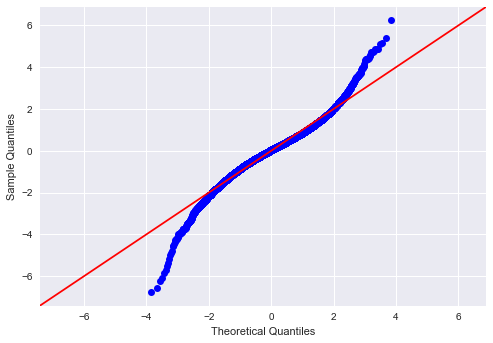

In [91]:
# check assumptions
df_10_residuals = res.resid
mod_res = sm.graphics.qqplot(df_10_residuals, dist=stats.norm, line='45', 
                             fit=True)

In [92]:
# can drop outliers based on z-scores. - do on whole data frame before split

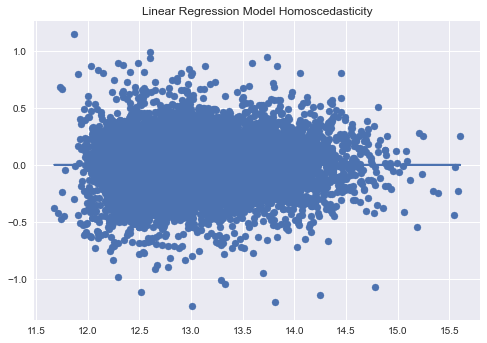

In [93]:
# check for homoscedasticity
plt.scatter(res.predict(X), res.resid)
plt.plot(res.predict(X), [0 for i in range(len(df_10_train_y))])

plt.title('Linear Regression Model Homoscedasticity');

### Model 11

#### Create model with price, zipcode, sqft_living, bedrooms, bathrooms, condition, waterfront, sqft_lot, and view

In [ ]:
# going to repeat model 11, but I will drop grade because grade produces too
# many overly high p-values

df_11 = df.copy()
df_11 = df_11[['price', 'zipcode', 'sqft_living', 'bedrooms', 'bathrooms',
               'condition', 'waterfront', 'sqft_lot', 'view']]

df_11

In [ ]:
np.log(df_11['price']).hist(bins=100)

In [ ]:
plt.boxplot(np.log(df_11['price']))

In [ ]:
np.log(df_11['sqft_living']).hist(bins=100)

In [ ]:
plt.boxplot(np.log(df_11['sqft_living']))

#### Remove outliers

In [ ]:
# remove the outlier of 33 bedrooms
df_11 = df_11[df_11['bedrooms'] < 32]

# fix problem of .5, .75 bathrooms and so on...
df_11['bathrm'] = df_11.bathrooms*4
df_11.bathrm = df_11.bathrm.astype('int32')
df_11 = df_11.drop('bathrooms', axis=1)
df_11

In [ ]:
df_11['bathrm'].hist(bins=29)

In [ ]:
df_11.bathrm.unique().size

In [ ]:
log_bath = np.log(df_11['bathrm'])
log_bath.hist()

Could potentially treat bathrooms as log-normal distribution. It looks slightly more normal transformed, but still does not look that normally distributed.

#### Log transform price, sqft_living, sqft_lot

In [ ]:
# log transform of applicable variables
log_t = ['price', 'sqft_living', 'sqft_lot']

for l in log_t:
    l_log = np.log(df_11[l])
    df_11 = df_11.drop([l], axis=1)
    df_11[l] = l_log
    
# dummies
to_dum = ['zipcode', 'condition', 'waterfront', 'view']

for d in to_dum:
    dummy = pd.get_dummies(df_11[d], prefix=d, drop_first=True)
    df_11 = df_11.drop([d], axis=1)
    df_11 = pd.concat([df_11, dummy], axis=1)
    
df_11.describe()

#### Model A

In [ ]:
#statsmodel
df_y = df_11[['price']]
df_x = df_11.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

#### Remove variables with p-value over 0.05

In [ ]:
# drop following zipcodes (too high p-value) and run model again:
# zipcode_98198, zipcode_98032, zipcode_98023, zipcode_98002
zips_drop = ['zipcode_98002', 'zipcode_98023', 'zipcode_98032']
for z in zips_drop:
       df_11 = df_11.drop([z], axis=1)
df_11.describe()

In [ ]:
# Check correlation matrix between the dep. variables in this df.
df_11.corr()

In [ ]:
abs(df_11.corr()) > .75

#### look at high correlating features in the dataframe (avoid multicol.)

In [ ]:
# adapting code from lab: https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution

df_mc = df_11.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_mc['pairs'] = list(zip(df_mc.level_0, df_mc.level_1))
df_mc.set_index(['pairs'], inplace = True)

df_mc.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_mc.columns = ['cc']

df_mc.drop_duplicates(inplace=True)

df_mc[(df_mc.cc>.75) & (df_mc.cc<1)]

* Condition 3 and condition 2 are highly correlated. 
* Bathroom and sqft_living are highly correlated.
I will drop condition_3 and bathrm from dataset

In [ ]:
df_11 = df_11.drop(['condition_3'], axis=1)
df_11 = df_11.drop(['bathrm'], axis=1)
df_11

#### Model B

In [ ]:
df_y = df_11[['price']]
df_x = df_11.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

#### Check assumptions

In [ ]:
# run checks on linear regression assumptions
# check assumptions
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

In [ ]:
# check for homoscedasticity
plt.scatter(res.predict(X), res.resid)
plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

plt.title('Linear Regression Model Homoscedasticity');

In [ ]:
# use Breusch-Pagan test to evaluate heteroscedasticity
from statsmodels.compat import lzip

names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(res.resid, res.model.exog)
lzip(names, test)

#### Check multicollinearity

In [ ]:
# deal with multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_x
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(list(df_x.columns), vif))

In [ ]:
# check another way... https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

#### Evaluate with MAE

In [ ]:
X = sm.add_constant(df_train_x)

# generate predictions
ypred = res.predict(X)

# calc MAE
mae = meanabs
mae = mae(df_train_y['price'], ypred)
mae

#### MAE doesn't mean much here because the prices were log-normalized...

In [ ]:
z = np.exp(df_train_y['price'])
z1 = np.exp(ypred)

mae = meanabs
mae = mae(z, z1)
mae

#### Remove sqft-lot (high multicollinearity) and model again

In [ ]:
df_11 = df_11.drop(['sqft_lot'], axis=1)
df_11

In [ ]:
df_y = df_11[['price']]
df_x = df_11.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

#### Check assumptions

In [ ]:
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

In [ ]:
# check for homoscedasticity
plt.scatter(res.predict(X), res.resid)
plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

plt.title('Linear Regression Model Homoscedasticity');

In [ ]:
X = df_x
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(list(df_x.columns), vif))

#### Remove bedroooms (multicollinearity too high) and model again

In [ ]:
df_11 = df_11.drop(['bedrooms'], axis=1)
df_11

In [ ]:
df_y = df_11[['price']]
df_x = df_11.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

* Note that p-value of condition 2 is over .05

#### Check assumptions

In [ ]:
# run checks on linear regression assumptions
# check assumptions
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

In [ ]:
# check for homoscedasticity
plt.scatter(res.predict(X), res.resid)
plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

plt.title('Linear Regression Model Homoscedasticity');

In [ ]:
# deal with multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_x
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(list(df_x.columns), vif))

* still too high multicollinearity value for sqft_living

#### try without log-normalize

In [ ]:
df_11 = df.copy()
df_11 = df_11[['price', 'zipcode', 'sqft_living', 'bedrooms', 'bathrooms',
               'condition', 'waterfront', 'sqft_lot', 'view']]

# remove the outlier of 33 bedrooms
df_11 = df_11[df_11['bedrooms'] < 32]

# fix problem of .5, .75 bathrooms and so on...
df_11['bathrm'] = df_11.bathrooms*4
df_11.bathrm = df_11.bathrm.astype('int32')
df_11 = df_11.drop('bathrooms', axis=1)

# dummies
to_dum = ['zipcode', 'condition', 'waterfront', 'view']

for d in to_dum:
    dummy = pd.get_dummies(df_11[d], prefix=d, drop_first=True)
    df_11 = df_11.drop([d], axis=1)
    df_11 = pd.concat([df_11, dummy], axis=1)
    
df_11.describe()

#### Model C (no log-normalization)

In [ ]:
#statsmodel
df_y = df_11[['price']]
df_x = df_11.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

#### Check assumptions

In [ ]:
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

In [ ]:
# check for homoscedasticity
plt.scatter(res.predict(X), res.resid)
plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

plt.title('Linear Regression Model Homoscedasticity');

In [ ]:
df_11.price.hist()

In [ ]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df_11.price.quantile(q=q)))

In [ ]:
orig_tot = len(df_11)
df_11c = df_11[df_11.price < 1970000.0] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df_11c))/orig_tot)


# Refit model with subset features
#statsmodel
df_y = df_11c[['price']]
df_x = df_11c.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

In [ ]:
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

In [ ]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df_11c.price.quantile(q=q)))

In [ ]:
orig_tot = len(df_11c)
df_11d = df_11c[df_11c.price < 1600000.0] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df_11d))/orig_tot)

# Refit model with subset features
#statsmodel
df_y = df_11d[['price']]
df_x = df_11d.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

In [ ]:
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

In [ ]:
# remove high p-vals and try model again.

# drop following zipcodes (too high p-value) and run model again:
# zipcode_98198, zipcode_98032, zipcode_98023, zipcode_98002
zips_drop = ['zipcode_98002', 'zipcode_98003', 'zipcode_98022', 'zipcode_98023',
            'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98042',
            'zipcode_98092', 'zipcode_98198']
for z in zips_drop:
       df_11d = df_11d.drop([z], axis=1)
df_11d.describe()

In [ ]:
df_y = df_11d[['price']]
df_x = df_11d.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

In [ ]:
# deal with multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_x
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(list(df_x.columns), vif))

In [ ]:
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

### Model 12 - learning from 11

#### Create model like df from model 11, but focus on preprocessing

In [ ]:
df_12 = df.copy()
df_12 = df_12[['price', 'zipcode', 'sqft_living', 'bedrooms', 'bathrooms',
               'condition', 'waterfront', 'sqft_lot', 'view']]

df_12

#### Preprocessing

In [ ]:
# remove the outlier of 33 bedrooms
df_12 = df_12[df_12['bedrooms'] < 32]

# fix problem of .5, .75 bathrooms and so on...
df_12['bathrm4'] = df_12.bathrooms*4
df_12.bathrm4 = df_12.bathrm4.astype('int32')
df_12 = df_12.drop('bathrooms', axis=1)
df_12

In [ ]:
# apply log transforms and dummy vars to appropriate variables
# log transform of applicable variables
log_t = ['price', 'sqft_living', 'sqft_lot']

for l in log_t:
    l_log = np.log(df_12[l])
    df_12 = df_12.drop([l], axis=1)
    df_12[l] = l_log
    
# dummies
to_dum = ['zipcode', 'condition', 'waterfront', 'view']

for d in to_dum:
    dummy = pd.get_dummies(df_12[d], prefix=d, drop_first=True)
    df_12 = df_12.drop([d], axis=1)
    df_12 = pd.concat([df_12, dummy], axis=1)
    
df_12.describe()

In [ ]:
# Drop price values based on Z-score
df_12['price'].hist(bins=20)

In [ ]:
high = df_12['price'].mean() + 3*df_12['price'].std()
low = df_12['price'].mean() - 3*df_12['price'].std()

df_12 = df_12[(df_12['price'] < high) & (df_12['price'] > low)]
df_12

In [ ]:
df_12.describe()

#### Model

In [ ]:
#statsmodel
df_y = df_12[['price']]
df_x = df_12.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

#### Check Assumptions

In [ ]:
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

In [ ]:
# check for homoscedasticity
plt.scatter(res.predict(X), res.resid)
plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

plt.title('Linear Regression Model Homoscedasticity');

In [ ]:
# Multicollinearity
X = df_x
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(list(df_x.columns), vif))

#### Process again - check for highly correlating vars.

In [ ]:
# Consider dropping sqft_living values based on Z-score
df_12['sqft_living'].hist(bins=20)

In [ ]:
high = df_12['sqft_living'].mean() + 3*df_12['sqft_living'].std()
low = df_12['sqft_living'].mean() - 3*df_12['sqft_living'].std()

df_12 = df_12[(df_12['sqft_living'] < high) & (df_12['sqft_living'] > low)]
df_12

In [ ]:
#statsmodel
df_y = df_12[['price']]
df_x = df_12.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

In [ ]:
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

In [ ]:
# check for homoscedasticity
plt.scatter(res.predict(X), res.resid)
plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

plt.title('Linear Regression Model Homoscedasticity');

In [ ]:
# Multicollinearity
X = df_x
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(list(df_x.columns), vif))

#### Check for high correlating features before modeling again

In [ ]:
# adapting code from lab: https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution

df_mc = df_12.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_mc['pairs'] = list(zip(df_mc.level_0, df_mc.level_1))
df_mc.set_index(['pairs'], inplace = True)

df_mc.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_mc.columns = ['cc']

df_mc.drop_duplicates(inplace=True)

df_mc[(df_mc.cc>.5) & (df_mc.cc<1)]

In [ ]:
# Process again - remove some of the highly correlating features.
df_12 = df_12.drop(['condition_3'], axis=1)
df_12 = df_12.drop(['bathrm4'], axis=1)

In [ ]:
df_12.sqft_lot.hist(bins=20)

In [ ]:
high = df_12['sqft_lot'].mean() + 3*df_12['sqft_lot'].std()
low = df_12['sqft_lot'].mean() - 3*df_12['sqft_lot'].std()

df_12 = df_12[(df_12['sqft_lot'] < high) & (df_12['sqft_lot'] > low)]
df_12

In [ ]:
#statsmodel
df_y = df_12[['price']]
df_x = df_12.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

#### Check Assumptions

In [ ]:
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

In [ ]:
# check for homoscedasticity
plt.scatter(res.predict(X), res.resid)
plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

plt.title('Linear Regression Model Homoscedasticity');

In [ ]:
# Multicollinearity
X = df_x
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(list(df_x.columns), vif))

#### Remove variables with too high of p-value

In [ ]:
to_drop = ['zipcode_98002', 'zipcode_98022', 'zipcode_98023',  'zipcode_98032']
for z in to_drop:
       df_12 = df_12.drop([z], axis=1)
df_12.describe()

In [ ]:
#statsmodel
df_y = df_12[['price']]
df_x = df_12.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

In [ ]:
X = df_x
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(list(df_x.columns), vif))

#### Try removing sqft_living

In [ ]:
df_12 = df_12.drop(['sqft_living'], axis=1)

#statsmodel
df_y = df_12[['price']]
df_x = df_12.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

In [ ]:
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

In [ ]:
# check for homoscedasticity
plt.scatter(res.predict(X), res.resid)
plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

plt.title('Linear Regression Model Homoscedasticity');

In [ ]:
X = df_x
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(list(df_x.columns), vif))

In [ ]:
# adapting code from lab: https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution

df_mc = df_12.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_mc['pairs'] = list(zip(df_mc.level_0, df_mc.level_1))
df_mc.set_index(['pairs'], inplace = True)

df_mc.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_mc.columns = ['cc']

df_mc.drop_duplicates(inplace=True)

df_mc[(df_mc.cc>.65) & (df_mc.cc<1)]

#### Remove sqft_lot and remodel (too high VIF value)

In [ ]:
df_12 = df_12.drop(['sqft_lot'], axis=1)

#statsmodel
df_y = df_12[['price']]
df_x = df_12.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

In [ ]:
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

In [ ]:
# check for homoscedasticity
plt.scatter(res.predict(X), res.resid)
plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

plt.title('Linear Regression Model Homoscedasticity');

In [ ]:
X = df_x
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(list(df_x.columns), vif))

* bedrooms has VIF over 5. 

#### Dropping variables with p-value over .05

In [ ]:
zips_drop = ['zipcode_98148', 'zipcode_98178', 'zipcode_98188', 'zipcode_98198']
for z in zips_drop:
       df_12 = df_12.drop([z], axis=1)
df_12.describe()

In [ ]:
#statsmodel
df_y = df_12[['price']]
df_x = df_12.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

In [ ]:
X = df_x
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(list(df_x.columns), vif))

#### Bedrooms has VIF value that is slightly too high. Dropping and remodeling.

In [ ]:
df_12 = df_12.drop(['bedrooms'], axis=1)

#statsmodel
df_y = df_12[['price']]
df_x = df_12.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

In [ ]:
df_residuals = res.resid
mod_res = sm.graphics.qqplot(df_residuals, dist=stats.norm, line='45', 
                             fit=True)

In [ ]:
# check for homoscedasticity
plt.scatter(res.predict(X), res.resid)
plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

plt.title('Linear Regression Model Homoscedasticity');

* Looks somewhat heteroscedastic..

In [ ]:
X = df_x
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(list(df_x.columns), vif))

In [ ]:
# generate predictions
X = sm.add_constant(df_train_x)
ypred = res.predict(X)

z = np.exp(df_train_y['price'])
z1 = np.exp(ypred)

mae = meanabs
mae = mae(z, z1)
mae

* MAE is high.
* Further modeling could focus on different set of variables or it could maximize on variables with the highest coefs in this model.

In [ ]:
coefs = abs(res.params).sort_values(ascending=True)
coefs

In [ ]:
# I want to drop lowest few zipcode coefs to see if that improves model at all.
zips_drop = ['zipcode_98003', 'zipcode_98168', 'zipcode_98030']
for z in zips_drop:
       df_12 = df_12.drop([z], axis=1)
df_12.describe()

#statsmodel
df_y = df_12[['price']]
df_x = df_12.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

In [ ]:
coefs = abs(res.params).sort_values(ascending=True)
coefs

In [ ]:
# dropping next three lowest zipcode vars with lowest coef values
# model again to seek improved r^2
zips_drop = ['zipcode_98055', 'zipcode_98146', 'zipcode_98042']
for z in zips_drop:
       df_12 = df_12.drop([z], axis=1)
df_12.describe()

#statsmodel
df_y = df_12[['price']]
df_x = df_12.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

In [ ]:
# so... r^2 didn't improve... going to try this strategy once more.
coefs = abs(res.params).sort_values(ascending=True)
coefs

In [ ]:
# dropping next three lowest zipcode vars with lowest coef values
# model again to seek improved r^2
zips_drop = ['zipcode_98031', 'zipcode_98092', 'zipcode_98106']
for z in zips_drop:
       df_12 = df_12.drop([z], axis=1)
df_12.describe()

#statsmodel
df_y = df_12[['price']]
df_x = df_12.drop(['price'], axis=1)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, random_state=42)

X = sm.add_constant(df_train_x)
    
# Fit the linear regression model
model = sm.OLS(df_train_y, X)
res = model.fit()
print(str(res.summary()))

In [ ]:
# r-squared went down again.
# checking assumptions to see results
# check for homoscedasticity
plt.scatter(res.predict(X), res.resid)
plt.plot(res.predict(X), [0 for i in range(len(df_train_y))])

plt.title('Linear Regression Model Homoscedasticity');

* removing more zipcodes (with low absolute coefficient value) results in more heteroscedasticity and lower r^2

### Model 13 - Focus on preprocessing based on z-score and try without zipcode.

## Interpretation of Model

### Finding 1: R-squared value

Model 3 has an r-squared value of about 78%, which means that is able to explain about 78% of the variance of the actual data points from the predicted values represented by the model.
Below is a visualization of the model versus the actual values. Keep in mind that the actual values were log-normalized, so the error represented by the difference between actual vs. predicted values is extrapolated to a much larger degree than, say, the first model's visual representation of error.

In [ ]:
# visualize the error in model 3
X = df2.drop(['price'], axis=1)
y = df2['price']
lin_model(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
y_hat = lr.predict(X_train)

plt.figure(figsize=(12, 8))

ax = sns.distplot(df2['price'], hist=False, color="b", 
                  label="Actual (Log) Prices")
sns.distplot(y_hat, hist=False, color="y", label="Predicted (Log) Values" ,
             ax=ax)


plt.title('Actual vs Predicted Values for Home Prices')
plt.xlabel('Log Price')
plt.ylabel('Density')

plt.legend()
plt.show()
plt.close()

As seen by this visualization and the r-squared value, the model is not perfect. However, it does at least offer a very good starting point for ruling out homes or further investigating homes to build or buy. It can also offer a way in which the stakeholder can understand whether a particular home may be under or overvalued.

### Finding 2: Most significant model coefficients

In [ ]:
# create df with coefficient names and values

# re-establish linear regression model to extract relevant info
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
lr.fit(X_train, y_train)

# define names and values of the coefficients
co_names = X_train.columns   # X_train columns - labels with log-transform
co_values = lr.coef_

# create df with these variables
df_coefs = pd.DataFrame(list(zip(co_names, co_values)), 
                        columns=['Coefficients', 'Values'])

# suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.7f' % x)

# change values in 'Values' to absolute - we care about the magnitude
df_coefs['Values'] = df_coefs['Values'].abs() 

df_coefs.sort_values(by='Values', ascending=False)     # highest values at top

The most significant coefficients are lat, waterfront, and sqft_above. 
Further investigation of why these coefficients are the most significant is offered below.

#####  Latitude

In [ ]:
# ceate QQ-plot of lat to investigate linearity
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.graphics.qqplot(df2['lat'], dist=stats.norm, line='45', fit=True)

Latitude is roughly linear and when plotted against price, it has a somewhat trimodal distribution with the first bell curve seeming about half the size as the other two (as seen in 4.1). 
Interpretation of lat characteristics:
* Rough linearity facilitates greater significance in linear regression.
* The trimodality of latitude versus price is insignificant, but latitude trends upward as price does (seen in 4.2), which facilitates greater significance in linear regression.

##### Waterfront

* Look at the values found in waterfront and their frequency.
* Look at scatterplot of waterfront vs. price.

In [ ]:
df['waterfront'].value_counts()

Most properties are not waterfront properties or they did not have an entry included. Only 146 homes are waterfront properties.

In [ ]:
plt.scatter(df['waterfront'], df['price'] / 100_000, alpha=0.2)

Observations:
* Almost all homes are concentrated in lower value ranges and do not have waterfronts.
* It seems that the model is deriving weight from the waterfront variable by ascribing significance in the frequency of homes with a waterfront. For instance it is safe to say that homes without a waterfront will have a low price (in general), and homes with a waterfront will typically trend higher in price.

##### sqft_above

The third highest linear relationship among the coefficients with price is sqft_above. This relationship is intuitive because one would expect that as the square footage of a home increases, then the price would increase proportionally. Additionally, sqft_above is log-normal and has a fairly linear relationship with price. This relationship will be shown again below.

In [ ]:
plt.scatter(df['sqft_above'], df['price'] / 100_000, alpha=0.1)